<a href="https://colab.research.google.com/github/Villains-Kuker/QM2/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Collection

In [1]:
!pip install uv && uv pip install sovai['full'] --system > output.log 2>&1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 37.2 MB/s eta 0:00:00


**Congressional Trading**

In [2]:
import sovai as sov

sov.token_auth(token="f88ece7f-f57c-48e7-9955-291a24de7c07")

In [3]:
df_congress = sov.data("congress").sort_values("transaction_date")

In [4]:
df_congress.tail()

representative bio_guide_id transaction_date transaction  \
ticker date                                                                  
CRWV   2025-12-17    Cleo Fields      F000110       2025-12-11        Sale   
GOOG   2025-12-17    Cleo Fields      F000110       2025-12-15    Purchase   
SOUN   2025-12-17    Cleo Fields      F000110       2025-12-15        Sale   
GOOGL  2025-12-17    Cleo Fields      F000110       2025-12-15    Purchase   
CBRL   2025-12-19      Tim Moore      M001236       2025-12-16    Purchase   

                             house   amount party last_modified TickerType  \
ticker date                                                                  
CRWV   2025-12-17  Representatives  15001.0     D    2025-12-18         ST   
GOOG   2025-12-17  Representatives   1001.0     D    2025-12-18         ST   
SOUN   2025-12-17  Representatives   1001.0     D    2025-12-18         ST   
GOOGL  2025-12-17  Representatives  15001.0     D    2025-12-18         ST   
CBRL   2025-12-19  Representatives  15001.0     R    2025-12-22         ST   

                  Description  ExcessReturn  PriceChange  SPYChange  \
ticker date                                                           
CRWV   2025-12-17        None       -20.699      -22.545     -1.846   
GOOG   2025-12-17        None        -1.170       -1.801     -0.631   
SOUN   2025-12-17        None         1.558        0.927     -0.631   
GOOGL  2025-12-17        None        -1.238       -1.869     -0.631   
CBRL   2025-12-19        None         0.349        0.885      0.537   

                   days_to_report  \
ticker date                         
CRWV   2025-12-17               6   
GOOG   2025-12-17               2   
SOUN   2025-12-17               2   
GOOGL  2025-12-17               2   
CBRL   2025-12-19               3   

                                                      bio_guide_url  
ticker date                                                          
CRWV   2025-12-17  https://bioguide.congress.gov/search/bio/F000110  
GOOG   2025-12-17  https://bioguide.congress.gov/search/bio/F000110  
SOUN   2025-12-17  https://bioguide.congress.gov/search/bio/F000110  
GOOGL  2025-12-17  https://bioguide.congress.gov/search/bio/F000110  
CBRL   2025-12-19  https://bioguide.congress.gov/search/bio/M001236

We define the event window as $$[-10, +10]\ trading\ days $$around the event date (April 2, 2025), corresponding to the period from March 19, 2025 to April 16, 2025.

In [5]:
df_congress_event_window = df_congress[(df_congress['transaction_date'] >= '2025-03-19') & (df_congress['transaction_date'] <= '2025-04-16')]
display(df_congress_event_window)

representative bio_guide_id transaction_date  \
ticker date                                                         
TBLL   2025-04-20      John Boozman      B001236       2025-03-19   
AMAT   2025-04-20      John Boozman      B001236       2025-03-19   
COF    2025-04-13  Markwayne Mullin      M001190       2025-03-19   
IVW    2025-04-20      John Boozman      B001236       2025-03-19   
DTE    2025-04-20      John Boozman      B001236       2025-03-19   
...                             ...          ...              ...   
ORCL   2025-05-14      John Boozman      B001236       2025-04-16   
LRCX   2025-05-14      John Boozman      B001236       2025-04-16   
MSFT   2025-05-14      John Boozman      B001236       2025-04-16   
UNH    2025-05-14      John Boozman      B001236       2025-04-16   
AMAT   2025-05-14      John Boozman      B001236       2025-04-16   

                      transaction   house   amount party last_modified  \
ticker date                                                              
TBLL   2025-04-20        Purchase  Senate   1001.0     R    2025-04-20   
AMAT   2025-04-20        Purchase  Senate   1001.0     R    2025-04-20   
COF    2025-04-13        Purchase  Senate  15001.0     R    2025-04-14   
IVW    2025-04-20  Sale (Partial)  Senate   1001.0     R    2025-04-20   
DTE    2025-04-20     Sale (Full)  Senate   1001.0     R    2025-04-20   
...                           ...     ...      ...   ...           ...   
ORCL   2025-05-14        Purchase  Senate   1001.0     R    2025-05-15   
LRCX   2025-05-14  Sale (Partial)  Senate   1001.0     R    2025-05-15   
MSFT   2025-05-14        Purchase  Senate   1001.0     R    2025-05-15   
UNH    2025-05-14        Purchase  Senate   1001.0     R    2025-05-15   
AMAT   2025-05-14  Sale (Partial)  Senate   1001.0     R    2025-05-15   

                  TickerType Description  ExcessReturn  PriceChange  \
ticker date                                                           
TBLL   2025-04-20      Stock        None       -20.197        0.047   
AMAT   2025-04-20      Stock        None        47.573       67.817   
COF    2025-04-13      Stock        None        17.571       37.816   
IVW    2025-04-20      Stock        None         8.859       29.103   
DTE    2025-04-20      Stock        None       -24.922       -4.678   
...                      ...         ...           ...          ...   
ORCL   2025-05-14      Stock        None        16.676       46.401   
LRCX   2025-05-14      Stock        None       116.698      146.423   
MSFT   2025-05-14      Stock        None        -0.953       28.772   
UNH    2025-05-14      Stock        None       -71.295      -41.570   
AMAT   2025-05-14      Stock        None        57.850       87.575   

                   SPYChange  days_to_report  \
ticker date                                    
TBLL   2025-04-20     20.244              32   
AMAT   2025-04-20     20.244              32   
COF    2025-04-13     20.244              25   
IVW    2025-04-20     20.244              32   
DTE    2025-04-20     20.244              32   
...                      ...             ...   
ORCL   2025-05-14     29.725              28   
LRCX   2025-05-14     29.725              28   
MSFT   2025-05-14     29.725              28   
UNH    2025-05-14     29.725              28   
AMAT   2025-05-14     29.725              28   

                                                      bio_guide_url  
ticker date                                                          
TBLL   2025-04-20  https://bioguide.congress.gov/search/bio/B001236  
AMAT   2025-04-20  https://bioguide.congress.gov/search/bio/B001236  
COF    2025-04-13  https://bioguide.congress.gov/search/bio/M001190  
IVW    2025-04-20  https://bioguide.congress.gov/search/bio/B001236  
DTE    2025-04-20  https://bioguide.congress.gov/search/bio/B001236  
...                                                             ...  
ORCL   2025-05-14  https://bioguide.congress.gov/se

**We use an estimation window** of$$ [−250,−30]\ trading\ days $$relative to the event date (April 2, 2025), corresponding approximately to the period from February 2024 to April 3, 2025. This long pre-event window is employed to estimate each stock's normal return-generating process and its relationship with the overall market.

In [6]:

df_congress_event_window.to_csv('congress_event_window.csv', index=True)
print('df_congress_event_window saved to congress_event_window.csv')


df_congress_event_window saved to congress_event_window.csv


In [7]:
unique_tickers = df_congress_event_window.index.get_level_values('ticker').unique().tolist()
print(unique_tickers)
print(len(unique_tickers))


['TBLL', 'AMAT', 'COF', 'IVW', 'DTE', 'BITB', 'NVDA', 'SMCI', 'CEG', 'META', 'HON', 'HWM', 'JPM', 'ARCC', 'ET', 'AVGO', 'LRCX', 'TMO', 'TXN', 'CSX', 'COLPAL', 'COP', 'ZTS', 'CVX', 'VLO', 'FTGC', 'ADBE', 'HYG', 'SHY', 'NKE', 'TGT', 'SBUX', 'AAPL', 'USIG', 'STZ', 'PYPL', 'MA', 'AMGN', 'GOOGL', 'BMY', 'DUK', 'MSFT', 'ADM', 'GS', 'BAC', 'LLY', 'GILD', 'ORCL', 'UNH']
49


### Match & Visualize

[**********************96%*********************  ]  47 of 49 completedERROR:yfinance:HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: COLPAL"}}}
[*********************100%***********************]  48 of 49 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COLPAL']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  48 of 49 completed

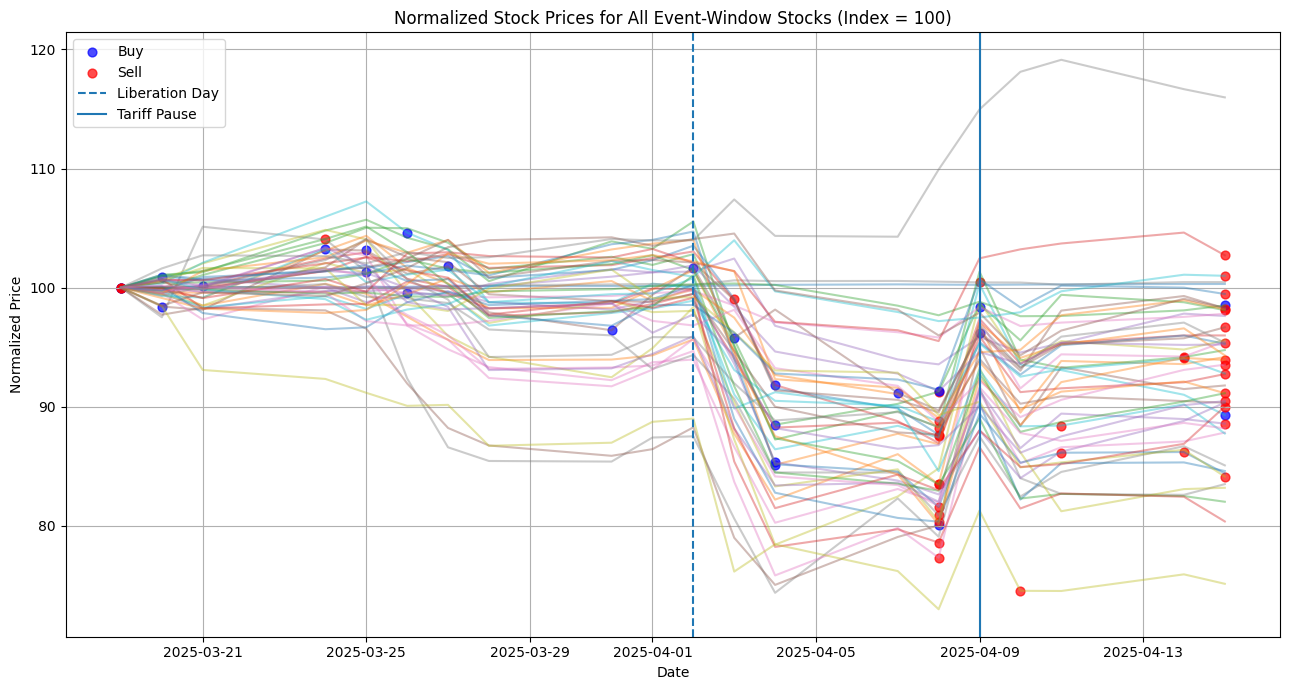

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

START_DATE = "2025-03-19"
END_DATE = "2025-04-16"


event_df = pd.read_csv("congress_event_window.csv")
event_df["transaction_date"] = pd.to_datetime(event_df["transaction_date"])

price_data = yf.download(unique_tickers, start=START_DATE, end=END_DATE)

if isinstance(price_data.columns, pd.MultiIndex):
    close_df = price_data['Close']
else:
    close_df = price_data[['Close']].rename(columns={'Close': unique_tickers[0]})

plt.figure(figsize=(13, 7))

for i, ticker in enumerate(unique_tickers):
    try:
        if ticker not in close_df.columns:
            print(f"Skipping {ticker}: no data")
            continue
        price_series = close_df[ticker].dropna()

        if len(price_series) < 5:
            continue

        norm_price = price_series / price_series.iloc[0] * 100
        plt.plot(
            norm_price.index,
            norm_price.values,
            alpha=0.4
        )

        trades = event_df[event_df["ticker"] == ticker]

        buys = trades[
            trades["transaction"].str.contains("Purchase", case=False, na=False)
        ]
        sells = trades[
            trades["transaction"].str.contains("Sale", case=False, na=False)
        ]

        buy_label = "Buy" if i == 0 else None
        sell_label = "Sell" if i == 0 else None

        buy_dates = [d for d in buys["transaction_date"] if d in price_series.index]
        sell_dates = [d for d in sells["transaction_date"] if d in price_series.index]

        plt.scatter(
            buy_dates,
            norm_price.reindex(buy_dates).values,
            alpha=0.7,
            color="blue",   # 🔵 Buy = blue
            marker="o",
            s=40,
            label=buy_label
        )

        plt.scatter(
            sell_dates,
            norm_price.reindex(sell_dates).values,
            alpha=0.7,
            color="red",    # 🔴 Sell = red
            marker="o",
            s=40,
            label=sell_label
        )

    except Exception as e:
        print(f"Skipping {ticker}: {e}")

# Event lines
plt.axvline(pd.to_datetime("2025-04-02"), linestyle="--", label="Liberation Day")
plt.axvline(pd.to_datetime("2025-04-09"), linestyle="-", label="Tariff Pause")

plt.title("Normalized Stock Prices for All Event-Window Stocks (Index = 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




*   We normalized the price to ensure comparability across stocks with different price levels and to highlight relative price movements around the event window.


*   In our analysis, some stocks may not have available historical price data from standard data sources within the event window. For instance, COLPAL only appears in a single transaction and does not have accessible daily prices on yFinance. Since the calculation of abnormal returns (AR), cumulative abnormal returns (CAR), and direction-adjusted CAR (ACAR) relies on complete price time series, it is impossible to compute these metrics for such stocks. This approach ensures the integrity and reliability of our results, as including incomplete data could introduce NaNs or lead to inaccurate calculations. Given that excluded stocks constitute a very small fraction of the overall sample, their removal is unlikely to affect the aggregate findings.






### Calculate Return

In [9]:
# Get S&P 500 Index

import yfinance as yf
START_DATE = "2025-03-19"
END_DATE = "2025-04-17"
sp500_df = yf.download("^GSPC", start=START_DATE, end=END_DATE)
sp500_df.sort_index(inplace=True)
sp500_df = sp500_df[['Close']]
sp500_df.rename(columns={'Close':'close'}, inplace=True)
sp500_df.index = sp500_df.index.date
display(sp500_df)


[*********************100%***********************]  1 of 1 completed


Price         close
Ticker        ^GSPC
2025-03-19 5675.290
2025-03-20 5662.890
2025-03-21 5667.560
2025-03-24 5767.570
2025-03-25 5776.650
2025-03-26 5712.200
2025-03-27 5693.310
2025-03-28 5580.940
2025-03-31 5611.850
2025-04-01 5633.070
2025-04-02 5670.970
2025-04-03 5396.520
2025-04-04 5074.080
2025-04-07 5062.250
2025-04-08 4982.770
2025-04-09 5456.900
2025-04-10 5268.050
2025-04-11 5363.360
2025-04-14 5405.970
2025-04-15 5396.630
2025-04-16 5275.700

In [10]:
sp500_df = sp500_df['close']
sp500_df['^GSPC']

2025-03-19   5675.290
2025-03-20   5662.890
2025-03-21   5667.560
2025-03-24   5767.570
2025-03-25   5776.650
2025-03-26   5712.200
2025-03-27   5693.310
2025-03-28   5580.940
2025-03-31   5611.850
2025-04-01   5633.070
2025-04-02   5670.970
2025-04-03   5396.520
2025-04-04   5074.080
2025-04-07   5062.250
2025-04-08   4982.770
2025-04-09   5456.900
2025-04-10   5268.050
2025-04-11   5363.360
2025-04-14   5405.970
2025-04-15   5396.630
2025-04-16   5275.700
Name: ^GSPC, dtype: float64

In [11]:
unique_tickers.pop(unique_tickers.index('COLPAL'))
print(unique_tickers)
print(len(unique_tickers))

['TBLL', 'AMAT', 'COF', 'IVW', 'DTE', 'BITB', 'NVDA', 'SMCI', 'CEG', 'META', 'HON', 'HWM', 'JPM', 'ARCC', 'ET', 'AVGO', 'LRCX', 'TMO', 'TXN', 'CSX', 'COP', 'ZTS', 'CVX', 'VLO', 'FTGC', 'ADBE', 'HYG', 'SHY', 'NKE', 'TGT', 'SBUX', 'AAPL', 'USIG', 'STZ', 'PYPL', 'MA', 'AMGN', 'GOOGL', 'BMY', 'DUK', 'MSFT', 'ADM', 'GS', 'BAC', 'LLY', 'GILD', 'ORCL', 'UNH']
48


In [12]:
import pandas as pd
import yfinance as yf

START_DATE = "2025-03-19"
END_DATE = "2025-04-16"

def compute_ar_car(stock_price_df, sp500_df):
    """
    Compute abnormal return (AR) and cumulative abnormal return (CAR)
    stock_price_df: DataFrame with 'Close' and datetime index
    sp500_df: DataFrame with 'Close' and datetime index
    """

    stock_ret = stock_price_df.pct_change().dropna()
    market_ret = sp500_df.pct_change().dropna()

    ar = stock_ret - market_ret
    car = ar.sum()

    return ar, car


sp500_data = sp500_df['^GSPC']

all_ar = {}
all_car = {}


for ticker in unique_tickers:
    try:
        stock_price_df = yf.download([ticker], start=START_DATE, end=END_DATE)['Close'][ticker]
        ar, car = compute_ar_car(stock_price_df, sp500_data)
        all_ar[ticker] = ar
        all_car[ticker] = car
        print(f"{ticker} computed successfully. AR length: {len(ar)}, CAR: {car:.4f}")
    except Exception as e:
        print(f"Skipping {ticker}: {e}")

car_df = pd.Series(all_car)
car_df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TBLL computed successfully. AR length: 20, CAR: 0.0446
AMAT computed successfully. AR length: 20, CAR: 0.0057
COF computed successfully. AR length: 20, CAR: 0.0119



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0120
DTE computed successfully. AR length: 20, CAR: 0.0206


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BITB computed successfully. AR length: 20, CAR: 0.0367
NVDA computed successfully. AR length: 20, CAR: 0.0229


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SMCI computed successfully. AR length: 20, CAR: -0.1010
CEG computed successfully. AR length: 20, CAR: 0.0279


[*********************100%***********************]  1 of 1 completed


META computed successfully. AR length: 20, CAR: -0.0506


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HON computed successfully. AR length: 20, CAR: 0.0027
HWM computed successfully. AR length: 20, CAR: 0.0005


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0335
ARCC computed successfully. AR length: 20, CAR: -0.0229
ET computed successfully. AR length: 20, CAR: -0.0491


[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: -0.0129


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.0559
TMO computed successfully. AR length: 20, CAR: -0.1094
TXN computed successfully. AR length: 20, CAR: -0.1163
CSX computed successfully. AR length: 20, CAR: -0.0270
COP computed successfully. AR length: 20, CAR: -0.1039


[*********************100%***********************]  1 of 1 completed


ZTS computed successfully. AR length: 20, CAR: -0.0455


[*********************100%***********************]  1 of 1 completed

CVX computed successfully. AR length: 20, CAR: -0.1452



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VLO computed successfully. AR length: 20, CAR: -0.1536
FTGC computed successfully. AR length: 20, CAR: -0.0047
ADBE computed successfully. AR length: 20, CAR: -0.0530


[*********************100%***********************]  1 of 1 completed

HYG computed successfully. AR length: 20, CAR: 0.0202


[*********************100%***********************]  1 of 1 completed



SHY computed successfully. AR length: 20, CAR: 0.0462


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.2185
TGT computed successfully. AR length: 20, CAR: -0.0723


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.1103
AAPL computed successfully. AR length: 20, CAR: 0.0018
USIG computed successfully. AR length: 20, CAR: 0.0269
STZ computed successfully. AR length: 20, CAR: 0.0730


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL computed successfully. AR length: 20, CAR: -0.0645
MA computed successfully. AR length: 20, CAR: 0.0157


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: -0.0209
GOOGL computed successfully. AR length: 20, CAR: 0.0040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BMY computed successfully. AR length: 20, CAR: -0.1259
DUK computed successfully. AR length: 20, CAR: 0.0539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: 0.0433
ADM computed successfully. AR length: 20, CAR: 0.0310
GS computed successfully. AR length: 20, CAR: -0.0334
BAC computed successfully. AR length: 20, CAR: -0.0493
LLY computed successfully. AR length: 20, CAR: -0.0517


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GILD computed successfully. AR length: 20, CAR: 0.0280
ORCL computed successfully. AR length: 20, CAR: -0.0698
UNH computed successfully. AR length: 20, CAR: 0.1942


TBLL     0.045
AMAT     0.006
COF      0.012
IVW      0.012
DTE      0.021
BITB     0.037
NVDA     0.023
SMCI    -0.101
CEG      0.028
META    -0.051
HON      0.003
HWM      0.000
JPM      0.033
ARCC    -0.023
ET      -0.049
AVGO    -0.013
LRCX    -0.056
TMO     -0.109
TXN     -0.116
CSX     -0.027
COP     -0.104
ZTS     -0.045
CVX     -0.145
VLO     -0.154
FTGC    -0.005
ADBE    -0.053
HYG      0.020
SHY      0.046
NKE     -0.218
TGT     -0.072
SBUX    -0.110
AAPL     0.002
USIG     0.027
STZ      0.073
PYPL    -0.064
MA       0.016
AMGN    -0.021
GOOGL    0.004
BMY     -0.126
DUK      0.054
MSFT     0.043
ADM      0.031
GS      -0.033
BAC     -0.049
LLY     -0.052
GILD     0.028
ORCL    -0.070
UNH      0.194
dtype: float64

**Histogram of Original CARs of each stock in the Event Window**

This figure plots the empirical distribution of cumulative abnormal returns (CARs) across all event-related stocks.

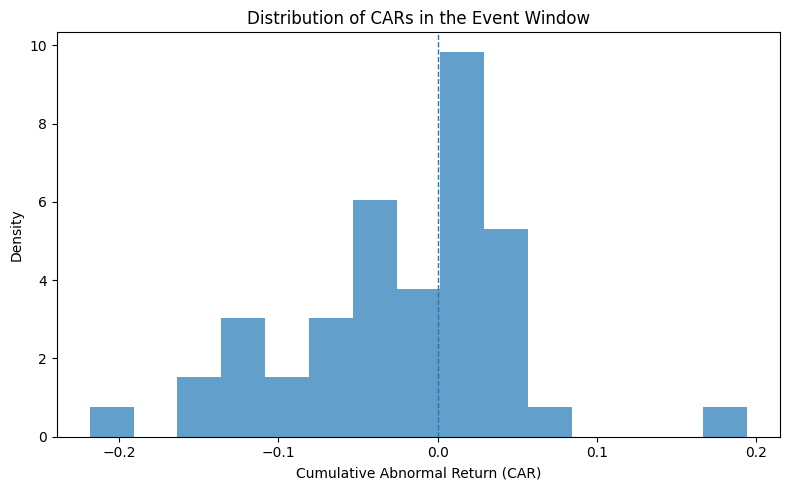

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

plt.hist(car_df, bins=15, density=True, alpha=0.7)
plt.axvline(0, linestyle='--', linewidth=1)

plt.title("Distribution of CARs in the Event Window")
plt.xlabel("Cumulative Abnormal Return (CAR)")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


**Boxplot of Original CARs**

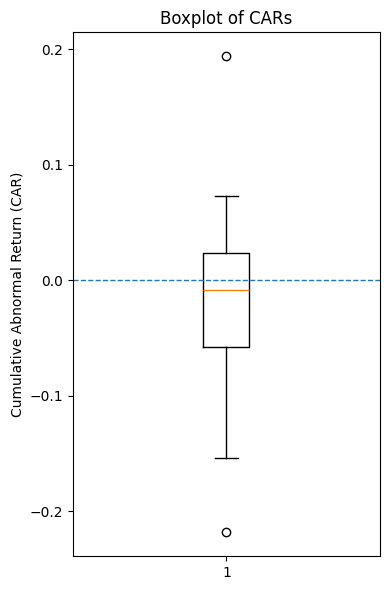

In [19]:
plt.figure(figsize=(4, 6))

plt.boxplot(car_df, vert=True)
plt.axhline(0, linestyle='--', linewidth=1)

plt.ylabel("Cumulative Abnormal Return (CAR)")
plt.title("Boxplot of CARs")

plt.tight_layout()
plt.show()


**Adjust the Direction of CARs Based on the Type of Transaction (Buy/Sell)**

In [13]:
import numpy as np

trades = event_df.copy()

# Keep only trades whose ticker exists in CAR results
trades = trades[trades["ticker"].isin(car_df.index)]

# Map trade direction to sign
trades["direction"] = np.where(
    trades["transaction"].str.contains("Purchase", case=False, na = False),
    1,
    np.where(
        trades["transaction"].str.contains("Sale", case=False, na = False),
        -1,
        np.nan
    )
)


trades = trades.dropna(subset=["direction"])

trades["CAR_stock"] = trades["ticker"].map(car_df)

trades["CAR_trade"] = trades["direction"] * trades["CAR_stock"]

ACAR = trades["CAR_trade"].mean()

print(f"ACAR (direction-adjusted): {ACAR:.6f}")
print(trades["CAR_trade"].describe())
print(trades.groupby("direction")["CAR_trade"].mean())
print(f"Number of trades used in ACAR: {len(trades)}")




ACAR (direction-adjusted): 0.026097
count   70.000
mean     0.026
std      0.061
min     -0.101
25%     -0.013
50%      0.027
75%      0.048
max      0.218
Name: CAR_trade, dtype: float64
direction
-1.000   0.034
1.000    0.015
Name: CAR_trade, dtype: float64
Number of trades used in ACAR: 70


**Histogram of Direction-adjusted CARs in the Event Window**

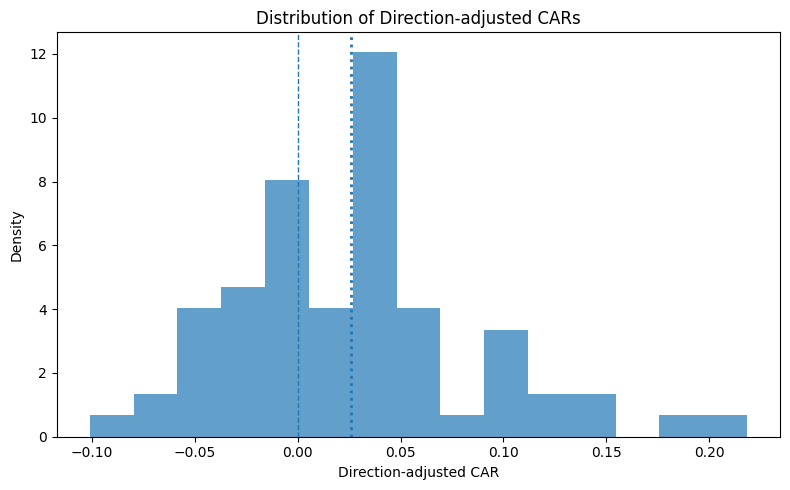

In [20]:
plt.figure(figsize=(8, 5))

plt.hist(trades["CAR_trade"], bins=15, density=True, alpha=0.7)
plt.axvline(0, linestyle="--", linewidth=1)
plt.axvline(ACAR, linestyle=":", linewidth=2)

plt.xlabel("Direction-adjusted CAR")
plt.ylabel("Density")
plt.title("Distribution of Direction-adjusted CARs")

plt.tight_layout()
plt.show()


**Boxplot of Direction-adjusted CARs**

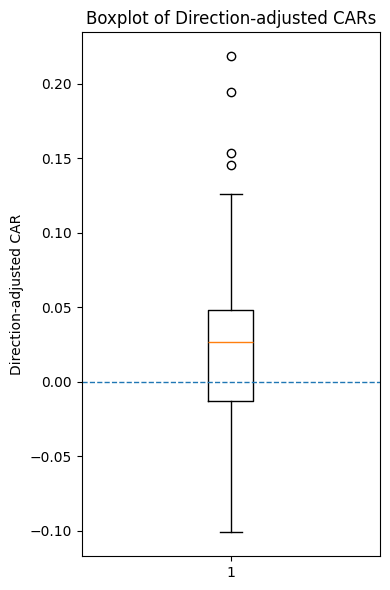

In [21]:
plt.figure(figsize=(4, 6))

plt.boxplot(trades["CAR_trade"], vert=True)
plt.axhline(0, linestyle="--", linewidth=1)

plt.ylabel("Direction-adjusted CAR")
plt.title("Boxplot of Direction-adjusted CARs")

plt.tight_layout()
plt.show()


Histogram of Different Type of Transaction in the Event Window

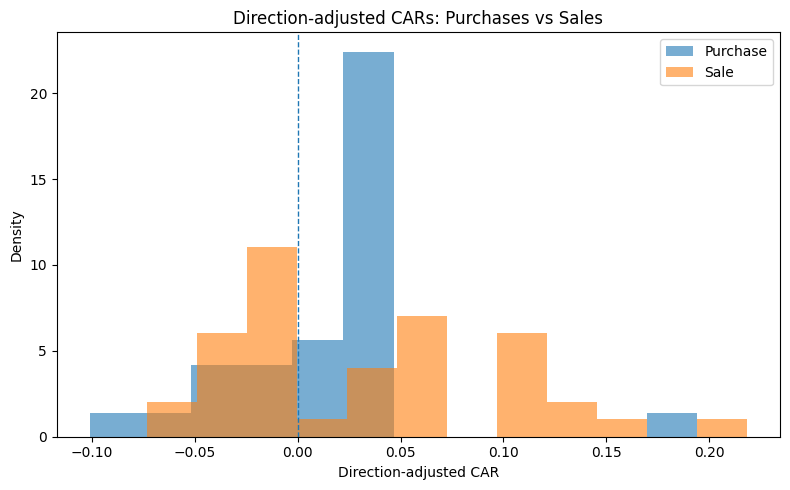

In [22]:
plt.figure(figsize=(8, 5))

plt.hist(
    trades.loc[trades["direction"] == 1, "CAR_trade"],
    bins=12,
    alpha=0.6,
    label="Purchase",
    density=True
)

plt.hist(
    trades.loc[trades["direction"] == -1, "CAR_trade"],
    bins=12,
    alpha=0.6,
    label="Sale",
    density=True
)

plt.axvline(0, linestyle="--", linewidth=1)

plt.xlabel("Direction-adjusted CAR")
plt.ylabel("Density")
plt.title("Direction-adjusted CARs: Purchases vs Sales")
plt.legend()

plt.tight_layout()
plt.show()




*   We find that direction-adjusted CARs are positive for both purchases and sales. Purchases are followed by positive abnormal returns (1.5%), while sales are followed by significantly negative abnormal returns, corresponding to a direction-adjusted CAR of 3.4%. This indicates that transactions are systematically aligned with subsequent abnormal price movements.
*   The direction-adjusted cumulative abnormal return (ACAR) across 70 trades is positive on average, with a mean of 2.6% and a median of 2.7%. This indicates that, on average, trades are correctly aligned with subsequent abnormal price movements during the event window. The distribution exhibits substantial dispersion (standard deviation of 6.1%), suggesting heterogeneous information content across trades, while the close alignment between the mean and median implies that the results are not driven by a small number of outliers.



### Statistical Testing

In [14]:
trading_calender = yf.download('^GSPC', period='24mo')
trading_calender_df = trading_calender['Close']
trading_calender_df

[*********************100%***********************]  1 of 1 completed


Ticker        ^GSPC
Date               
2024-01-02 4742.830
2024-01-03 4704.810
2024-01-04 4688.680
2024-01-05 4697.240
2024-01-08 4763.540
...             ...
2025-12-23 6909.790
2025-12-24 6932.050
2025-12-26 6929.940
2025-12-29 6905.740
2025-12-30 6896.240

[501 rows x 1 columns]

In [15]:
event_date = pd.Timestamp("2025-04-02")

trading_days = trading_calender_df.index.sort_values()

event_loc = trading_days.get_loc(event_date)

estimation_window = trading_days[event_loc - 250 : event_loc - 30]

estimation_window


DatetimeIndex(['2024-04-03', '2024-04-04', '2024-04-05', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
               '2024-04-15', '2024-04-16',
               ...
               '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07',
               '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13',
               '2025-02-14', '2025-02-18'],
              dtype='datetime64[ns]', name='Date', length=220, freq=None)

In [16]:
df_congress_est_window = df_congress[(df_congress['transaction_date'] >= '2024-04-03') & (df_congress['transaction_date'] <= '2025-02-18')]
display(df_congress_est_window)

representative bio_guide_id transaction_date  \
ticker date                                                         
IEX    2024-05-15  Tommy Tuberville      T000278       2024-04-03   
GILD   2024-05-15  Tommy Tuberville      T000278       2024-04-03   
LSCC   2024-05-15  Tommy Tuberville      T000278       2024-04-03   
ABBV   2024-05-15  Tommy Tuberville      T000278       2024-04-03   
MCHP   2024-05-15  Tommy Tuberville      T000278       2024-04-03   
...                             ...          ...              ...   
DIS    2025-03-06      John Boozman      B001236       2025-02-13   
DHR    2025-02-27  Markwayne Mullin      M001190       2025-02-13   
MSFT   2025-03-06      John Boozman      B001236       2025-02-14   
IVW    2025-03-06      John Boozman      B001236       2025-02-14   
YUM    2025-03-10    James E. Banks      B001299       2025-02-18   

                      transaction   house   amount party last_modified  \
ticker date                                                              
IEX    2024-05-15     Sale (Full)  Senate   1001.0     R    2024-05-15   
GILD   2024-05-15     Sale (Full)  Senate   1001.0     R    2024-05-15   
LSCC   2024-05-15     Sale (Full)  Senate   1001.0     R    2024-05-15   
ABBV   2024-05-15        Purchase  Senate   1001.0     R    2024-05-15   
MCHP   2024-05-15     Sale (Full)  Senate   1001.0     R    2024-05-15   
...                           ...     ...      ...   ...           ...   
DIS    2025-03-06     Sale (Full)  Senate   1001.0     R    2025-03-07   
DHR    2025-02-27     Sale (Full)  Senate  15001.0     R    2025-02-28   
MSFT   2025-03-06        Purchase  Senate   1001.0     R    2025-03-07   
IVW    2025-03-06  Sale (Partial)  Senate   1001.0     R    2025-03-07   
YUM    2025-03-10     Sale (Full)  Senate   1001.0     R    2025-03-10   

                         TickerType  \
ticker date                           
IEX    2024-05-15              None   
GILD   2024-05-15              None   
LSCC   2024-05-15              None   
ABBV   2024-05-15              None   
MCHP   2024-05-15              None   
...                             ...   
DIS    2025-03-06             Stock   
DHR    2025-02-27             Stock   
MSFT   2025-03-06             Stock   
IVW    2025-03-06             Stock   
YUM    2025-03-10  Other Securities   

                                                         Description  \
ticker date                                                            
IEX    2024-05-15                                               None   
GILD   2024-05-15                                               None   
LSCC   2024-05-15                                               None   
ABBV   2024-05-15                                               None   
MCHP   2024-05-15                                               None   
...                                                              ...   
DIS    2025-03-06                                               None   
DHR    2025-02-27                                               None   
MSFT   2025-03-06                                               None   
IVW    2025-03-06                                               None   
YUM    2025-03-10  Company: Yum                                  ...   

                   ExcessReturn  PriceChange  SPYChange  days_to_report  \
ticker date                                                               
IEX    2024-05-15           NaN          NaN        NaN              42   
GILD   2024-05-15           NaN          NaN        NaN              42   
LSCC   2024-05-15           NaN          NaN        NaN              42   
ABBV   2024-05-15           NaN          NaN        NaN              42   
MCHP   2024-05-15           NaN          NaN        NaN              42   
...                         ...          ...        ...             ...   
DIS    2025-03-06        -9.973        1.834     11.807              21   
DHR    2025-02-27        -0.638       11

In [31]:
df_congress_copy = df_congress[(df_congress['transaction_date'] >= '2024-04-03') & (df_congress['transaction_date'] <= '2025-04-16')]
df_congress_copy.to_csv('congress_copy.csv', index=True)

**Definition of Trding Intensity**

Let
*   𝑳 denote the length of the event window (in this study, 𝑳 = 21 trading days).
*   𝑻ₜ denote the number of transactions executed by the politician on trading day 𝒕.
For days with no transactions, we set 𝑻ₜ = 0.

We define the trading intensity over a rolling window ending on day
𝒕 as:
$$S_t = \sum_{i=t-L+1}^{t} T_i$$



**Event Window Statistic**

Let the event window end on trading day
𝒕0 .
The observed trading intensity during the event window is defined as:
$$S^{\text{event}} = \sum_{i=t_0-L+1}^{t_0} T_i$$

**Empirical Distribution from the Estimation Window**

Using the estimation window, which consists of approximately 250 trading days prior to the event window, we construct a series of rolling-window trading intensities:
$$\{ S_1, S_2, \dots, S_N \}$$

where the total number of rolling windows is given by:
$$N = 250 - L + 1$$

Each 𝑺ⱼ is computed using the same window length
𝐿, ensuring direct comparability with the event window statistic.

**Definition of the Empirical p-value**

We assess whether trading activity during the event window is unusually high by conducting a right-tailed empirical percentile test.
The p-value is defined as:
$$
p = \frac{1}{N} \sum_{j=1}^{N} \mathbb{I}\left(S_j \ge S^{\text{event}}\right)
$$

where 𝕀(⋅) is an indicator function that equals 1 if the condition holds and 0 otherwise.

Equivalently, the p-value can be written as:
$$p = \frac{\#\left(S_{\text{history}} \ge S_{\text{event}}\right)}{N}$$

This p-value represents the fraction of historical rolling windows whose trading intensity weakly exceeds that observed in the event window.

In [17]:
hist_daily_counts = (
    df_congress_est_window
    .groupby('transaction_date')
    .size()
    .reindex(estimation_window, fill_value=0)
)


hist_rolling_counts = (
    hist_daily_counts
    .rolling(window = 21)
    .sum()
    .dropna()
)
print(hist_rolling_counts)

event_total_trades = (
    df_congress_event_window
    .shape[0]
)


print(event_total_trades)
p_value = np.mean(hist_rolling_counts >= event_total_trades)
print(p_value)

Date
2024-05-01   212.000
2024-05-02   203.000
2024-05-03   224.000
2024-05-06   210.000
2024-05-07   221.000
               ...  
2025-02-11    55.000
2025-02-12    55.000
2025-02-13    67.000
2025-02-14    69.000
2025-02-18    67.000
Length: 200, dtype: float64
71
0.42


A p-value of 0.42 implies that the trading intensity observed during the event window is not unusually high relative to its own historical distribution. Specifically, 42% of rolling windows in the estimation period exhibit trading activity equal to or exceeding that observed prior to the event.

**Histogram of Rolling 21-day Trade Counts in Estimation Window**

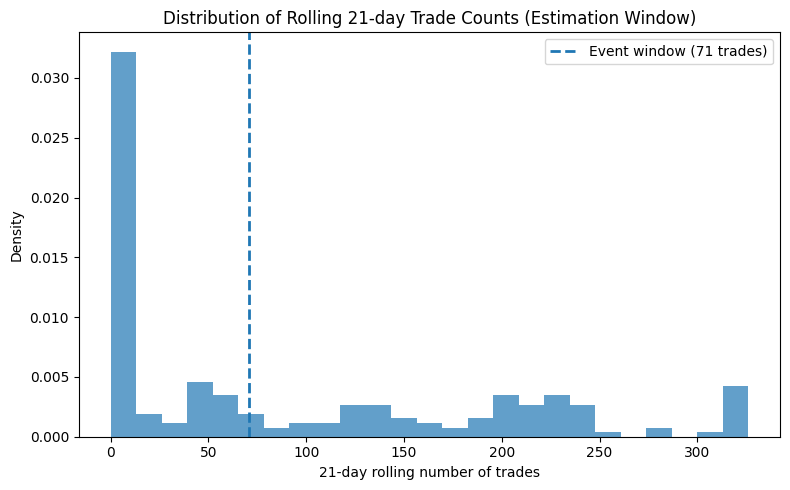

In [23]:
plt.figure(figsize=(8, 5))

plt.hist(
    hist_rolling_counts,
    bins=25,
    alpha=0.7,
    density=True
)

plt.axvline(
    event_total_trades,
    linestyle="--",
    linewidth=2,
    label=f"Event window ({event_total_trades} trades)"
)

plt.xlabel("21-day rolling number of trades")
plt.ylabel("Density")
plt.title("Distribution of Rolling 21-day Trade Counts (Estimation Window)")
plt.legend()

plt.tight_layout()
plt.show()


**Empirical Cumulative Distribution Function**

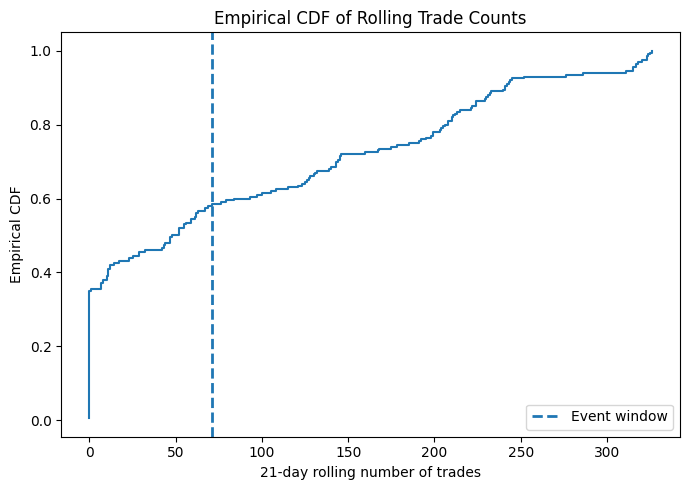

In [24]:
import numpy as np

sorted_counts = np.sort(hist_rolling_counts.values)
ecdf = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)

plt.figure(figsize=(7, 5))

plt.step(sorted_counts, ecdf, where="post")
plt.axvline(
    event_total_trades,
    linestyle="--",
    linewidth=2,
    label="Event window"
)

plt.xlabel("21-day rolling number of trades")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDF of Rolling Trade Counts")
plt.legend()

plt.tight_layout()
plt.show()


The empirical percentile of the event-window trading intensity is approximately 42%, indicating that similar or higher trading activity occurs frequently in the estimation window.

**Time-series plot**

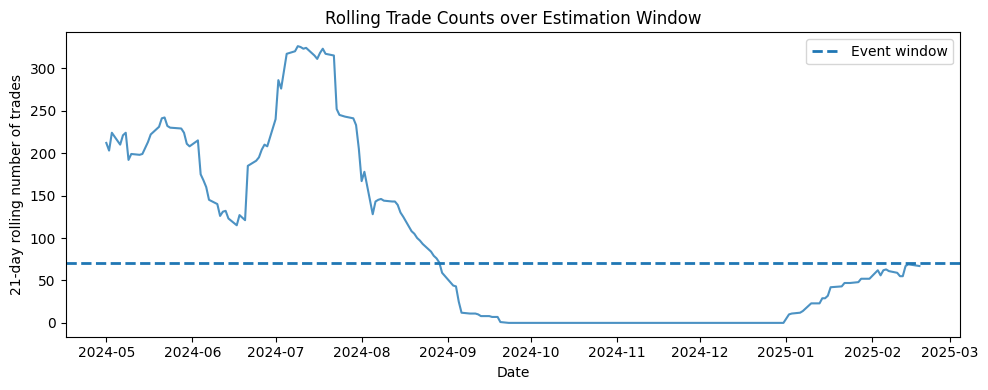

In [25]:
plt.figure(figsize=(10, 4))

plt.plot(
    hist_rolling_counts.index,
    hist_rolling_counts.values,
    alpha=0.8
)

plt.axhline(
    event_total_trades,
    linestyle="--",
    linewidth=2,
    label="Event window"
)

plt.xlabel("Date")
plt.ylabel("21-day rolling number of trades")
plt.title("Rolling Trade Counts over Estimation Window")
plt.legend()

plt.tight_layout()
plt.show()


The event-window trading intensity does not visually deviate from historical fluctuations in rolling trade counts.

# T-test

While the empirical percentile testing is descriptive and aim to characterize the abnormality of trading behavior, we now formally test whether the observed abnormal returns are statistically different from zero at the transaction level.

We treat transaction-level direction-adjusted CARs as approximately independent observations.
This assumption holds because the trades occur across different stocks, dates, and individuals during the event window.
Moreover, market-wide movements are removed through benchmark-adjusted returns, and trade direction is standardized via direction-adjusted CARs, further reducing cross-sectional dependence.

**Hypothesis**

Null hypothesis:
$$H_0: \mathbb{E}\left[ CAR^{trade} \right] = 0$$

Under the null hypothesis, trades made by congress members are not associated with abnormal returns during the event window. Any observed gains or losses are attributable to random market fluctuations.

Alternative hypothesis:
$$H_1: \mathbb{E}\left[ CAR^{trade} \right] \neq 0$$

Trades are associated with statistically significant abnormal returns, either positive or negative.

In [26]:
from scipy import stats

car_trade = trades["CAR_trade"]

t_stat, p_value = stats.ttest_1samp(car_trade, popmean=0)

print("One-sample T-test (H0: mean CAR_trade = 0)")
print(f"Sample size: {len(car_trade)}")
print(f"Mean CAR_trade: {car_trade.mean():.6f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value (two-sided): {p_value:.4f}")


One-sample T-test (H0: mean CAR_trade = 0)
Sample size: 70
Mean CAR_trade: 0.026097
T-statistic: 3.563
P-value (two-sided): 0.0007


In [27]:
mean = car_trade.mean()
std = car_trade.std(ddof=1)
n = len(car_trade)

ci_low, ci_high = stats.t.interval(
    confidence=0.95,
    df=n - 1,
    loc=mean,
    scale=std / np.sqrt(n)
)

print(f"95% CI for mean CAR_trade: [{ci_low:.4f}, {ci_high:.4f}]")


95% CI for mean CAR_trade: [0.0115, 0.0407]


This one-sample t-test is conducted on direction-adjusted cumulative abnormal returns to assess whether trades earn abnormal profits around the event. The mean CAR_trade is 2.61%, with a t-statistic of 3.56 and a two-sided p-value of 0.0007, allowing us to reject the null hypothesis that the mean CAR equals zero. The 95% confidence interval ranges from 1.15% to 4.07%, indicating that the abnormal returns are not only statistically significant but also economically meaningful.

In [30]:
t_critical_two = stats.t.ppf(q=1-0.05/2, df=69)
print(t_critical_two)

1.9949454151072374


At the 5% significance level, the critical value for a two-sided one-sample t-test with 69 degrees of freedom is ±1.995. Since the observed t-statistic (3.563) exceeds this threshold in absolute value, we reject the null hypothesis that the mean CAR is zero.

# Robustness Test

In [33]:
unique_robust_tickers = df_congress_est_window.index.get_level_values('ticker').unique().tolist()
print(unique_robust_tickers)
print(len(unique_robust_tickers))

['IEX', 'GILD', 'LSCC', 'ABBV', 'MCHP', 'EXR', 'BMY', 'FTNT', 'LLY', 'CCJ', 'ZTS', 'AVGO', 'TEL', 'MCK', 'NDAQ', 'FDX', 'QSR', 'REGN', 'PHM', 'KR', 'ROK', 'RTX', 'WU', 'UPS', 'MGA', 'DGX', 'CHGCY', 'PAYC', 'KEYS', 'PODD', 'BX', 'CAT', 'ERJ', 'SO', 'BRK.B', 'AMAT', 'SSD', 'NEE', 'V', 'NKE', 'LULU', 'FAST', 'DECK', 'MSI', 'NTES', 'ODFL', 'NFLX', 'PAC', 'SWKS', 'IART', 'CBSH', 'FNA', 'JKHY', 'SNPS', 'A', 'QLYS', 'BRO', 'CIVI', 'BRP', 'IR', 'AMP', 'SPGI', 'MSFT', 'NVS', 'UL', 'AAPL', 'DHR', 'GWW', 'PM', 'ASC', 'IBM', 'XOM', 'HSY', 'ITIP', 'ACN', 'HON', 'KMI', 'INTU', 'NS', 'MPC', 'VFC', 'ELV', 'BAC$I', 'NSRGY', 'NI', 'NVDA', 'MRK', 'EL', 'ADI', 'NOW', 'PG', 'DE', 'PEP', 'T', 'CVX', 'ET', 'CRM', 'PGR', 'DG', 'FMC', 'BKNG', 'CSX', 'EW', 'EFA', 'VLO', 'ENB', 'SCZ', 'USB', 'AMZN', 'META', 'UNH', 'CDNS', 'VZ', 'INTA', 'FOXF', 'ADC', 'DAVA', 'GS', 'OCFC', 'SHLS', 'BNTX', 'JMBS', 'CMBS', 'HTGC', 'ZTO', 'KMB', 'ILMN', 'FMAO', '91282CFK2', 'JPM', 'HXL', 'HD', 'QCOM', 'UBER', 'TSCO', 'TSLA', 'NGL', 

In [35]:
START_DATE = "2024-04-03"
END_DATE = "2025-02-18"

yf.download(unique_robust_tickers, start = START_DATE, end = END_DATE)

[*********************100%***********************]  484 of 484 completed
ERROR:yfinance:
32 Failed downloads:
ERROR:yfinance:['SQ', 'T$A', '4.WEEK, MATURE', 'EPOKY', 'FNA', 'SSBK', 'WBA', 'PARA', '91282CFK2', '3.MONTH, MATURE', 'EFC$D', 'AHL.C', 'PXD', 'BRKB', 'SWTX', 'IXNZF', 'MICRD', 'PPBI', 'FNFV.V', 'BAC$I', 'NS', 'GLAS FUNDS, LP', 'GOGL', 'DFS', '1.MONTH, MATURE', 'BRP', 'ITCI', 'BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['GLA', 'PYCR', 'ITIP', 'BRK']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-04-03 -> 2025-02-18)')


Price            Adj Close                                                 \
Ticker     1.MONTH, MATURE 3.MONTH, MATURE 4.WEEK, MATURE 91282CFK2 AHL.C   
Date                                                                        
2024-04-03             NaN             NaN            NaN       NaN   NaN   
2024-04-04             NaN             NaN            NaN       NaN   NaN   
2024-04-05             NaN             NaN            NaN       NaN   NaN   
2024-04-08             NaN             NaN            NaN       NaN   NaN   
2024-04-09             NaN             NaN            NaN       NaN   NaN   
...                    ...             ...            ...       ...   ...   
2025-02-10             NaN             NaN            NaN       NaN   NaN   
2025-02-11             NaN             NaN            NaN       NaN   NaN   
2025-02-12             NaN             NaN            NaN       NaN   NaN   
2025-02-13             NaN             NaN            NaN       NaN   NaN   
2025-02-14             NaN             NaN            NaN       NaN   NaN   

Price                                                               \
Ticker     BAC$I BRK BRK.B BRKB BRP DFS EFC$D EPOKY FNA FNFV.V GLA   
Date                                                                 
2024-04-03   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2024-04-04   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2024-04-05   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2024-04-08   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2024-04-09   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
...          ...  ..   ...  ...  ..  ..   ...   ...  ..    ...  ..   
2025-02-10   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2025-02-11   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2025-02-12   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2025-02-13   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   
2025-02-14   NaN NaN   NaN  NaN NaN NaN   NaN   NaN NaN    NaN NaN   

Price                                                                        \
Ticker     GLAS FUNDS, LP GOGL ITCI ITIP IXNZF MICRD  NS PARA PPBI PXD PYCR   
Date                                                                          
2024-04-03            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2024-04-04            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2024-04-05            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2024-04-08            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2024-04-09            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
...                   ...  ...  ...  ...   ...   ...  ..  ...  ...  ..  ...   
2025-02-10            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2025-02-11            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2025-02-12            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2025-02-13            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   
2025-02-14            NaN  NaN  NaN  NaN   NaN   NaN NaN  NaN  NaN NaN  NaN   

Price                                      Close                  \
Ticker      SQ SSBK SWTX T$A WBA 1.MONTH, MATURE 3.MONTH, MATURE   
Date                                                               
2024-04-03 NaN  NaN  NaN NaN NaN             NaN             NaN   
2024-04-04 NaN  NaN  NaN NaN NaN             NaN             NaN   
2024-04-05 NaN  NaN  NaN NaN NaN             NaN             NaN   
2024-04-08 NaN  NaN  NaN NaN NaN             NaN             NaN   
2024-04-09 NaN  NaN  NaN NaN NaN             NaN             NaN   
...         ..  ...  ...  ..  ..             ...             ...   
2025-02-10 NaN  NaN  NaN NaN NaN             NaN             NaN   
2025-02-11 NaN  NaN  NaN NaN NaN             NaN             NaN   
2025-02-12 NaN  NaN  NaN NaN NaN             NaN             NaN   
2025-02-13 NaN  N

In [36]:
b = ['SQ', 'T$A', '4.WEEK, MATURE', 'EPOKY', 'FNA', 'SSBK', 'WBA', 'PARA', '91282CFK2', '3.MONTH, MATURE', 'EFC$D', 'AHL.C', 'PXD', 'BRKB', 'SWTX', 'IXNZF', 'MICRD', 'PPBI', 'FNFV.V', 'BAC$I', 'NS', 'GLAS FUNDS, LP', 'GOGL', 'DFS', '1.MONTH, MATURE', 'BRP', 'ITCI', 'BRK.B']
c = [x for x in unique_robust_tickers if x not in b]
print(c)  # 输出: [1]


['IEX', 'GILD', 'LSCC', 'ABBV', 'MCHP', 'EXR', 'BMY', 'FTNT', 'LLY', 'CCJ', 'ZTS', 'AVGO', 'TEL', 'MCK', 'NDAQ', 'FDX', 'QSR', 'REGN', 'PHM', 'KR', 'ROK', 'RTX', 'WU', 'UPS', 'MGA', 'DGX', 'CHGCY', 'PAYC', 'KEYS', 'PODD', 'BX', 'CAT', 'ERJ', 'SO', 'AMAT', 'SSD', 'NEE', 'V', 'NKE', 'LULU', 'FAST', 'DECK', 'MSI', 'NTES', 'ODFL', 'NFLX', 'PAC', 'SWKS', 'IART', 'CBSH', 'JKHY', 'SNPS', 'A', 'QLYS', 'BRO', 'CIVI', 'IR', 'AMP', 'SPGI', 'MSFT', 'NVS', 'UL', 'AAPL', 'DHR', 'GWW', 'PM', 'ASC', 'IBM', 'XOM', 'HSY', 'ITIP', 'ACN', 'HON', 'KMI', 'INTU', 'MPC', 'VFC', 'ELV', 'NSRGY', 'NI', 'NVDA', 'MRK', 'EL', 'ADI', 'NOW', 'PG', 'DE', 'PEP', 'T', 'CVX', 'ET', 'CRM', 'PGR', 'DG', 'FMC', 'BKNG', 'CSX', 'EW', 'EFA', 'VLO', 'ENB', 'SCZ', 'USB', 'AMZN', 'META', 'UNH', 'CDNS', 'VZ', 'INTA', 'FOXF', 'ADC', 'DAVA', 'GS', 'OCFC', 'SHLS', 'BNTX', 'JMBS', 'CMBS', 'HTGC', 'ZTO', 'KMB', 'ILMN', 'FMAO', 'JPM', 'HXL', 'HD', 'QCOM', 'UBER', 'TSCO', 'TSLA', 'NGL', 'TEX', 'HLMN', 'CWEN', 'GOOG', 'CTSH', 'ADBE', 'VRT

In [38]:
d = ['GLA', 'PYCR', 'ITIP', 'BRK']
e = [x for x in c if x not in d]
print(e)
print(len(e))

['IEX', 'GILD', 'LSCC', 'ABBV', 'MCHP', 'EXR', 'BMY', 'FTNT', 'LLY', 'CCJ', 'ZTS', 'AVGO', 'TEL', 'MCK', 'NDAQ', 'FDX', 'QSR', 'REGN', 'PHM', 'KR', 'ROK', 'RTX', 'WU', 'UPS', 'MGA', 'DGX', 'CHGCY', 'PAYC', 'KEYS', 'PODD', 'BX', 'CAT', 'ERJ', 'SO', 'AMAT', 'SSD', 'NEE', 'V', 'NKE', 'LULU', 'FAST', 'DECK', 'MSI', 'NTES', 'ODFL', 'NFLX', 'PAC', 'SWKS', 'IART', 'CBSH', 'JKHY', 'SNPS', 'A', 'QLYS', 'BRO', 'CIVI', 'IR', 'AMP', 'SPGI', 'MSFT', 'NVS', 'UL', 'AAPL', 'DHR', 'GWW', 'PM', 'ASC', 'IBM', 'XOM', 'HSY', 'ACN', 'HON', 'KMI', 'INTU', 'MPC', 'VFC', 'ELV', 'NSRGY', 'NI', 'NVDA', 'MRK', 'EL', 'ADI', 'NOW', 'PG', 'DE', 'PEP', 'T', 'CVX', 'ET', 'CRM', 'PGR', 'DG', 'FMC', 'BKNG', 'CSX', 'EW', 'EFA', 'VLO', 'ENB', 'SCZ', 'USB', 'AMZN', 'META', 'UNH', 'CDNS', 'VZ', 'INTA', 'FOXF', 'ADC', 'DAVA', 'GS', 'OCFC', 'SHLS', 'BNTX', 'JMBS', 'CMBS', 'HTGC', 'ZTO', 'KMB', 'ILMN', 'FMAO', 'JPM', 'HXL', 'HD', 'QCOM', 'UBER', 'TSCO', 'TSLA', 'NGL', 'TEX', 'HLMN', 'CWEN', 'GOOG', 'CTSH', 'ADBE', 'VRT', 'CCL'

In [45]:
estimation_dates = df_congress_est_window["transaction_date"].unique()
print(estimation_window)

DatetimeIndex(['2024-04-03', '2024-04-04', '2024-04-05', '2024-04-08',
               '2024-04-09', '2024-04-10', '2024-04-11', '2024-04-12',
               '2024-04-15', '2024-04-16',
               ...
               '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07',
               '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13',
               '2025-02-14', '2025-02-18'],
              dtype='datetime64[ns]', name='Date', length=220, freq=None)


In [54]:
import numpy as np
import pandas as pd

def generate_fake_events(estimation_window_full, estimation_window_slice, n_fake=10, window_size=10, random_seed=None):
    """
    Generate fake event dates and their corresponding event windows.

    Parameters:
    -----------
    estimation_window_index : pd.DatetimeIndex
        Index of trading dates in the estimation window.
    n_fake : int
        Number of fake events to generate.
    window_size : int
        Number of trading days before and after the event to define event window.
    random_seed : int or None
        Seed for reproducibility.

    Returns:
    --------
    fake_events_df : pd.DataFrame
        Columns: 'fake_event_date', 'start_date', 'end_date'
    """
    if random_seed is not None:
        np.random.seed(random_seed)

    # Randomly choose n_fake trading days from the estimation window
    fake_event_dates = np.random.choice(estimation_window_slice, size=n_fake, replace=False)

    start_dates = []
    end_dates = []

    # Convert index to sorted list for position lookup
    trading_days = list(estimation_window_full)

    for d in fake_event_dates:
        pos = trading_days.index(d)
        start_pos = max(pos - window_size, 0)
        end_pos = min(pos + window_size, len(trading_days) - 1)
        start_dates.append(trading_days[start_pos])
        end_dates.append(trading_days[end_pos])

    fake_events_df = pd.DataFrame({
        'fake_event_date': fake_event_dates,
        'start_date': start_dates,
        'end_date': end_dates
    }).sort_values('fake_event_date').reset_index(drop=True)

    return fake_events_df


In [57]:
a = estimation_window[10:210]
a


DatetimeIndex(['2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30',
               ...
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
               '2025-01-31', '2025-02-03'],
              dtype='datetime64[ns]', name='Date', length=200, freq=None)

In [58]:
fake_df = generate_fake_events(estimation_window, a, 100, 10, 42)
fake_df

fake_event_date start_date   end_date
0       2024-04-19 2024-04-05 2024-05-03
1       2024-04-24 2024-04-10 2024-05-08
2       2024-04-25 2024-04-11 2024-05-09
3       2024-04-30 2024-04-16 2024-05-14
4       2024-05-02 2024-04-18 2024-05-16
..             ...        ...        ...
95      2025-01-21 2025-01-03 2025-02-04
96      2025-01-22 2025-01-06 2025-02-05
97      2025-01-27 2025-01-10 2025-02-10
98      2025-01-28 2025-01-13 2025-02-11
99      2025-01-30 2025-01-15 2025-02-13

[100 rows x 3 columns]

In [64]:
start_dates_str = fake_df['start_date'].dt.strftime('%Y-%m-%d').tolist()
end_dates_str = fake_df['end_date'].dt.strftime('%Y-%m-%d').tolist()

print(len(start_dates_str))
print(len(end_dates_str))


100
100


In [81]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime, timedelta

def get_congress_data(start_date, end_date):
  df_congress_fake = df_congress[(df_congress['transaction_date'] >= start_date) & (df_congress['transaction_date'] <= end_date)]
  return df_congress_fake

def get_fake_tickers(fake):
  '''
  fake:
  data type:pd.dataframe
  '''
  unique_fake = fake.index.get_level_values('ticker').unique().tolist()
  unique_fake_tickers = [x for x in unique_fake if x in e]
  return unique_fake_tickers

def get_sp500(start_date, end_date):
  START_DATE = start_date
  date_obj = datetime.strptime(end_date, "%Y-%m-%d")
  date_plus1 = date_obj + timedelta(days=1)
  date_plus1_str = date_plus1.strftime("%Y-%m-%d")
  END_DATE = date_plus1_str
  fake_sp500_df = yf.download("^GSPC", start=START_DATE, end=END_DATE)
  fake_sp500_df.sort_index(inplace=True)
  fake_sp500_df = fake_sp500_df[['Close']]
  fake_sp500_df.rename(columns={'Close':'close'}, inplace=True)
  fake_sp500_df.index = fake_sp500_df.index.date
  fake_sp500_df = fake_sp500_df['close']
  return fake_sp500_df

def get_car(unique_robust_tickers, sp500, start_date, end_date):

  sp500_data = sp500['^GSPC']

  all_ar = {}
  all_car = {}

  date_obj = datetime.strptime(end_date, "%Y-%m-%d")
  date_plus1 = date_obj + timedelta(days=1)
  date_plus1_str = date_plus1.strftime("%Y-%m-%d")

  for ticker in unique_robust_tickers:
      try:
          stock_price_df = yf.download([ticker], start=start_date, end=date_plus1_str)['Close'][ticker]
          ar, car = compute_ar_car(stock_price_df, sp500_data)
          all_ar[ticker] = ar
          all_car[ticker] = car
          print(f"{ticker} computed successfully. AR length: {len(ar)}, CAR: {car:.4f}")
      except Exception as e:
          print(f"Skipping {ticker}: {e}")

  car_df = pd.Series(all_car)
  return car_df

def compute_direction_adjusted_acar(event_df, car_df):

  trades = event_df.copy()
  trades = trades.reset_index()

  # Keep only trades whose ticker exists in CAR results
  trades = trades[trades["ticker"].isin(car_df.index)]

  # Map trade direction to sign
  trades["direction"] = np.where(
      trades["transaction"].str.contains("Purchase", case=False, na = False),
      1,
      np.where(
          trades["transaction"].str.contains("Sale", case=False, na = False),
          -1,
          np.nan
      )
  )


  trades = trades.dropna(subset=["direction"])

  trades["CAR_stock"] = trades["ticker"].map(car_df)

  trades["CAR_trade"] = trades["direction"] * trades["CAR_stock"]

  ACAR = trades["CAR_trade"].mean()

  t_stat, p_value = stats.ttest_1samp(trades["CAR_trade"], 0)

  return {
        "ACAR": ACAR,
        "t_stat": t_stat,
        "p_value": p_value,
        "N": len(trades)
    }



def fake_event_robustness_test(start_dates, end_dates):
    results = []
    for start, end in zip(start_dates, end_dates):
      fake_event_df = get_congress_data(start, end)
      print(fake_event_df.columns)
      fake_tickers = get_fake_tickers(fake_event_df)
      sp_500 = get_sp500(start, end)
      fake_car_df = get_car(fake_tickers, sp_500, start, end)
      fake_result = compute_direction_adjusted_acar(fake_event_df, fake_car_df)
      results.append(fake_result)

    df_results = pd.DataFrame(results)
    return df_results



# Please be cautious when trying to run the cell below as I wrote the code in a highly ineffective manner (I'm sorry it's just easier this way) and it would run about 15 mins to get the result so...

In [82]:
fake_results = fake_event_robustness_test(start_dates_str, end_dates_str)
fake_results

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed


LULU computed successfully. AR length: 20, CAR: 0.0116
TEL computed successfully. AR length: 20, CAR: -0.0025


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: -0.0905
DECK computed successfully. AR length: 20, CAR: -0.0236


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0203
NTES computed successfully. AR length: 20, CAR: 0.0827


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSCC computed successfully. AR length: 20, CAR: -0.0265
ODFL computed successfully. AR length: 20, CAR: -0.1670


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: -0.0717
PAC computed successfully. AR length: 20, CAR: 0.0912


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SWKS computed successfully. AR length: 20, CAR: -0.1003
IART computed successfully. AR length: 20, CAR: -0.1418


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CBSH computed successfully. AR length: 20, CAR: 0.0747
JKHY computed successfully. AR length: 20, CAR: -0.0199


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNPS computed successfully. AR length: 20, CAR: -0.0526
A computed successfully. AR length: 20, CAR: -0.0160
QLYS computed successfully. AR length: 20, CAR: 0.0191


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRO computed successfully. AR length: 20, CAR: -0.0032
GILD computed successfully. AR length: 20, CAR: -0.0563
CIVI computed successfully. AR length: 20, CAR: 0.0139


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IR computed successfully. AR length: 20, CAR: -0.0719
AMP computed successfully. AR length: 20, CAR: -0.0181


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPGI computed successfully. AR length: 20, CAR: 0.0001
MSFT computed successfully. AR length: 20, CAR: -0.0290


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVS computed successfully. AR length: 20, CAR: 0.0304
UL computed successfully. AR length: 20, CAR: 0.0897


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0965
DHR computed successfully. AR length: 20, CAR: 0.0341


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RTX computed successfully. AR length: 20, CAR: 0.0115
GWW computed successfully. AR length: 20, CAR: -0.0698


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PM computed successfully. AR length: 20, CAR: 0.1012
ASC computed successfully. AR length: 20, CAR: 0.0602


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: -0.1138
XOM computed successfully. AR length: 20, CAR: -0.0301


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.0368
ABBV computed successfully. AR length: 20, CAR: -0.0119
ACN computed successfully. AR length: 20, CAR: -0.0728


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: -0.0469
HON computed successfully. AR length: 20, CAR: 0.0080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KMI computed successfully. AR length: 20, CAR: 0.0372
INTU computed successfully. AR length: 20, CAR: 0.0074
MPC computed successfully. AR length: 20, CAR: -0.1620



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FTNT computed successfully. AR length: 20, CAR: -0.1644
VFC computed successfully. AR length: 20, CAR: -0.0649


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: 0.0531
NSRGY computed successfully. AR length: 20, CAR: 0.0307


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NKE computed successfully. AR length: 20, CAR: 0.0527
NI computed successfully. AR length: 20, CAR: 0.0729



[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0378
MRK computed successfully. AR length: 20, CAR: 0.0110


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EL computed successfully. AR length: 20, CAR: -0.0539
ADI computed successfully. AR length: 20, CAR: 0.0434
NOW computed successfully. AR length: 20, CAR: -0.0709


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: 0.0731
DE computed successfully. AR length: 20, CAR: -0.0126


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PEP computed successfully. AR length: 20, CAR: 0.0563
T computed successfully. AR length: 20, CAR: -0.0018



[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: -0.0257
CVX computed successfully. AR length: 20, CAR: 0.0068


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ET computed successfully. AR length: 20, CAR: 0.0184
CRM computed successfully. AR length: 20, CAR: -0.0803


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PGR computed successfully. AR length: 20, CAR: 0.0047
DG computed successfully. AR length: 20, CAR: -0.1291


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMC computed successfully. AR length: 20, CAR: 0.0742
BKNG computed successfully. AR length: 20, CAR: 0.0091


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSX computed successfully. AR length: 20, CAR: -0.0545
EW computed successfully. AR length: 20, CAR: -0.0683
EFA computed successfully. AR length: 20, CAR: 0.0141


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VLO computed successfully. AR length: 20, CAR: -0.1393
ENB computed successfully. AR length: 20, CAR: 0.0436



[*********************100%***********************]  1 of 1 completed


SCZ computed successfully. AR length: 20, CAR: 0.0142
USB computed successfully. AR length: 20, CAR: -0.0215


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0235
META computed successfully. AR length: 20, CAR: -0.1312


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: 0.0949
CDNS computed successfully. AR length: 20, CAR: -0.0730
VZ computed successfully. AR length: 20, CAR: -0.0474


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTA computed successfully. AR length: 20, CAR: -0.0057
FOXF computed successfully. AR length: 20, CAR: -0.0230
ADC computed successfully. AR length: 20, CAR: 0.0681


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAVA computed successfully. AR length: 20, CAR: -0.0787
GS computed successfully. AR length: 20, CAR: 0.0875


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OCFC computed successfully. AR length: 20, CAR: 0.0341
SHLS computed successfully. AR length: 20, CAR: -0.1196
BNTX computed successfully. AR length: 20, CAR: 0.0396


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JMBS computed successfully. AR length: 20, CAR: 0.0095
CMBS computed successfully. AR length: 20, CAR: 0.0046
HTGC computed successfully. AR length: 20, CAR: 0.0686


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ZTO computed successfully. AR length: 20, CAR: 0.0755
KMB computed successfully. AR length: 20, CAR: 0.0909
ILMN computed successfully. AR length: 20, CAR: -0.0604


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0478
JPM computed successfully. AR length: 20, CAR: -0.0187


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HXL computed successfully. AR length: 20, CAR: -0.0286
HD computed successfully. AR length: 20, CAR: -0.0273


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QCOM computed successfully. AR length: 20, CAR: 0.0675
UBER computed successfully. AR length: 20, CAR: -0.0909
TSCO computed successfully. AR length: 20, CAR: 0.0843


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.1345
NGL computed successfully. AR length: 20, CAR: 0.0182


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEX computed successfully. AR length: 20, CAR: -0.0926
HLMN computed successfully. AR length: 20, CAR: -0.0110


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CWEN computed successfully. AR length: 20, CAR: 0.0580
GOOG computed successfully. AR length: 20, CAR: 0.1140


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTSH computed successfully. AR length: 20, CAR: -0.0560
ADBE computed successfully. AR length: 20, CAR: 0.0179
VRT computed successfully. AR length: 20, CAR: 0.1141


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: -0.0280
MMM computed successfully. AR length: 20, CAR: 0.0810


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: 0.0411
WDAY computed successfully. AR length: 20, CAR: -0.0323
SHOP computed successfully. AR length: 20, CAR: 0.0079


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.0294
FICO computed successfully. AR length: 20, CAR: -0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL computed successfully. AR length: 20, CAR: 0.0250
OXY computed successfully. AR length: 20, CAR: -0.0573


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TCEHY computed successfully. AR length: 20, CAR: 0.1989
HUMA computed successfully. AR length: 20, CAR: 0.4117


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: 0.0080
SBLK computed successfully. AR length: 20, CAR: 0.0542


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFE computed successfully. AR length: 20, CAR: -0.0901
LOW computed successfully. AR length: 20, CAR: -0.0105


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MELI computed successfully. AR length: 20, CAR: 0.1032
DTM computed successfully. AR length: 20, CAR: 0.0178


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0402
CRWD computed successfully. AR length: 20, CAR: 0.0017
SSMXY computed successfully. AR length: 20, CAR: 0.0682


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.0886
CCI computed successfully. AR length: 20, CAR: -0.0179
NXPI computed successfully. AR length: 20, CAR: 0.0884


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0172
GGG computed successfully. AR length: 20, CAR: -0.0907


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INFY computed successfully. AR length: 20, CAR: -0.0358
VRTX computed successfully. AR length: 20, CAR: 0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0603
FDS computed successfully. AR length: 20, CAR: 0.0045


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.0058
ELS computed successfully. AR length: 20, CAR: 0.0231
SOLV computed successfully. AR length: 20, CAR: -0.0615


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCO computed successfully. AR length: 20, CAR: -0.0154
GLPI computed successfully. AR length: 20, CAR: -0.0275
MPWR computed successfully. AR length: 20, CAR: 0.1029


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DOW computed successfully. AR length: 20, CAR: -0.0306
WAT computed successfully. AR length: 20, CAR: -0.0260


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: 0.0150
ASML computed successfully. AR length: 20, CAR: -0.0592
KLAC computed successfully. AR length: 20, CAR: 0.0405


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UI computed successfully. AR length: 20, CAR: 0.0615
MA computed successfully. AR length: 20, CAR: -0.0567
TER computed successfully. AR length: 20, CAR: 0.1404


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: 0.0599
CPRT computed successfully. AR length: 20, CAR: -0.0089
VRSK computed successfully. AR length: 20, CAR: 0.0586


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: 0.1406
RELX computed successfully. AR length: 20, CAR: 0.0309


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RMD computed successfully. AR length: 20, CAR: 0.1729
PAYX computed successfully. AR length: 20, CAR: -0.0033
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: -0.0924
XOM computed successfully. AR length: 20, CAR: -0.0558


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.0359
ABBV computed successfully. AR length: 20, CAR: -0.0467
ACN computed successfully. AR length: 20, CAR: -0.0439


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0154
HON computed successfully. AR length: 20, CAR: 0.0070


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0402
INTU computed successfully. AR length: 20, CAR: 0.0024
MPC computed successfully. AR length: 20, CAR: -0.1545


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FTNT computed successfully. AR length: 20, CAR: -0.1324
VFC computed successfully. AR length: 20, CAR: -0.0685


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: 0.0443
NSRGY computed successfully. AR length: 20, CAR: 0.0374


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: 0.0460
NI computed successfully. AR length: 20, CAR: 0.0551


[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0474
RTX computed successfully. AR length: 20, CAR: 0.0196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: -0.0126
MRK computed successfully. AR length: 20, CAR: 0.0168


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0341
EL computed successfully. AR length: 20, CAR: -0.1033


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADI computed successfully. AR length: 20, CAR: 0.0399
DHR computed successfully. AR length: 20, CAR: 0.0119


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOW computed successfully. AR length: 20, CAR: -0.0662
PG computed successfully. AR length: 20, CAR: 0.0495


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DE computed successfully. AR length: 20, CAR: -0.0202
PEP computed successfully. AR length: 20, CAR: 0.0445


[*********************100%***********************]  1 of 1 completed


T computed successfully. AR length: 20, CAR: 0.0176


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: 0.0038
CVX computed successfully. AR length: 20, CAR: -0.0056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ET computed successfully. AR length: 20, CAR: 0.0246
CRM computed successfully. AR length: 20, CAR: -0.0735



[*********************100%***********************]  1 of 1 completed


PGR computed successfully. AR length: 20, CAR: 0.0418
DG computed successfully. AR length: 20, CAR: -0.1211


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMC computed successfully. AR length: 20, CAR: 0.0462
BKNG computed successfully. AR length: 20, CAR: 0.0164


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSX computed successfully. AR length: 20, CAR: -0.0389
EW computed successfully. AR length: 20, CAR: -0.0774


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: 0.0109
VLO computed successfully. AR length: 20, CAR: -0.1153


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ENB computed successfully. AR length: 20, CAR: 0.0708
SCZ computed successfully. AR length: 20, CAR: 0.0061


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


USB computed successfully. AR length: 20, CAR: -0.0123
AMZN computed successfully. AR length: 20, CAR: 0.0083
META computed successfully. AR length: 20, CAR: -0.0919


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: 0.1088
CDNS computed successfully. AR length: 20, CAR: -0.0787


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VZ computed successfully. AR length: 20, CAR: -0.0298
INTA computed successfully. AR length: 20, CAR: 0.1247
FOXF computed successfully. AR length: 20, CAR: 0.0638


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADC computed successfully. AR length: 20, CAR: 0.0311
DAVA computed successfully. AR length: 20, CAR: 0.0368


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.1052
OCFC computed successfully. AR length: 20, CAR: 0.0687


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHLS computed successfully. AR length: 20, CAR: -0.2838
BNTX computed successfully. AR length: 20, CAR: 0.0123


[*********************100%***********************]  1 of 1 completed


JMBS computed successfully. AR length: 20, CAR: 0.0029
CMBS computed successfully. AR length: 20, CAR: -0.0056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: 0.0668
ZTO computed successfully. AR length: 20, CAR: -0.0016
NTES computed successfully. AR length: 20, CAR: -0.0284


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMB computed successfully. AR length: 20, CAR: 0.0628
ILMN computed successfully. AR length: 20, CAR: -0.1699
FMAO computed successfully. AR length: 20, CAR: 0.0835


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0836
JPM computed successfully. AR length: 20, CAR: -0.0019


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HXL computed successfully. AR length: 20, CAR: 0.1523
HD computed successfully. AR length: 20, CAR: -0.0391


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QCOM computed successfully. AR length: 20, CAR: 0.0560
UBER computed successfully. AR length: 20, CAR: -0.1137


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: 0.0477
TSLA computed successfully. AR length: 20, CAR: 0.0366
NGL computed successfully. AR length: 20, CAR: -0.0240


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEX computed successfully. AR length: 20, CAR: -0.0845
HLMN computed successfully. AR length: 20, CAR: -0.0466
CWEN computed successfully. AR length: 20, CAR: 0.0671


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: 0.0829
CTSH computed successfully. AR length: 20, CAR: -0.0378
LSCC computed successfully. AR length: 20, CAR: -0.0789


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: -0.0026
VRT computed successfully. AR length: 20, CAR: 0.1503


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: -0.0471
MMM computed successfully. AR length: 20, CAR: 0.0353


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0175
SWKS computed successfully. AR length: 20, CAR: -0.0875
WDAY computed successfully. AR length: 20, CAR: -0.0712


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAC computed successfully. AR length: 20, CAR: 0.1220
SHOP computed successfully. AR length: 20, CAR: -0.1191


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.0228
FICO computed successfully. AR length: 20, CAR: 0.0576


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL computed successfully. AR length: 20, CAR: -0.0352
OXY computed successfully. AR length: 20, CAR: -0.0837


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TCEHY computed successfully. AR length: 20, CAR: 0.1621
HUMA computed successfully. AR length: 20, CAR: 0.4309


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: 0.0075
SBLK computed successfully. AR length: 20, CAR: 0.0851
NFE computed successfully. AR length: 20, CAR: -0.1062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LOW computed successfully. AR length: 20, CAR: -0.0223
MELI computed successfully. AR length: 20, CAR: 0.1509



[*********************100%***********************]  1 of 1 completed

DTM computed successfully. AR length: 20, CAR: 0.0043
PH computed successfully. AR length: 20, CAR: -0.0054



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.0029
SSMXY computed successfully. AR length: 20, CAR: 0.0677


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.1052
CCI computed successfully. AR length: 20, CAR: -0.0087
NXPI computed successfully. AR length: 20, CAR: 0.0757


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: 0.0045
GGG computed successfully. AR length: 20, CAR: -0.0985


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INFY computed successfully. AR length: 20, CAR: -0.0562
CBSH computed successfully. AR length: 20, CAR: 0.0779
VRTX computed successfully. AR length: 20, CAR: 0.0472


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SNPS computed successfully. AR length: 20, CAR: -0.0228
ITW computed successfully. AR length: 20, CAR: -0.0522



[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: 0.0077
NDSN computed successfully. AR length: 20, CAR: -0.0080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELS computed successfully. AR length: 20, CAR: 0.0075
SOLV computed successfully. AR length: 20, CAR: 0.0364
MCO computed successfully. AR length: 20, CAR: 0.0245


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


A computed successfully. AR length: 20, CAR: -0.0129
GLPI computed successfully. AR length: 20, CAR: 0.0118
MPWR computed successfully. AR length: 20, CAR: 0.0736


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRO computed successfully. AR length: 20, CAR: 0.0106
ODFL computed successfully. AR length: 20, CAR: -0.1618


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JKHY computed successfully. AR length: 20, CAR: -0.0342
DOW computed successfully. AR length: 20, CAR: -0.0088
WAT computed successfully. AR length: 20, CAR: -0.0419


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: 0.0234
ASML computed successfully. AR length: 20, CAR: -0.0633


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0436
UI computed successfully. AR length: 20, CAR: 0.0154


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: -0.0364
TER computed successfully. AR length: 20, CAR: 0.1271


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: 0.0692
TEL computed successfully. AR length: 20, CAR: -0.0054
LULU computed successfully. AR length: 20, CAR: -0.0171


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CPRT computed successfully. AR length: 20, CAR: -0.0204
DECK computed successfully. AR length: 20, CAR: 0.0498


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0293
VRSK computed successfully. AR length: 20, CAR: 0.0764
GRMN computed successfully. AR length: 20, CAR: 0.1549


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELX computed successfully. AR length: 20, CAR: 0.0411
QLYS computed successfully. AR length: 20, CAR: -0.0978
RMD computed successfully. AR length: 20, CAR: 0.1092


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0320
AON computed successfully. AR length: 20, CAR: -0.1075


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LOPE computed successfully. AR length: 20, CAR: 0.1025
AXTA computed successfully. AR length: 20, CAR: 0.1091



[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: 0.0984
UL computed successfully. AR length: 20, CAR: 0.0949


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALG computed successfully. AR length: 20, CAR: -0.1060
INTC computed successfully. AR length: 20, CAR: -0.2092


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOLD computed successfully. AR length: 20, CAR: -0.0371
ARKK computed successfully. AR length: 20, CAR: -0.0675


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FITB computed successfully. AR length: 20, CAR: 0.0975
CCJ computed successfully. AR length: 20, CAR: 0.0292


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.2525
WMS computed successfully. AR length: 20, CAR: 0.0143


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GILD computed successfully. AR length: 20, CAR: -0.0532
MCK computed successfully. AR length: 20, CAR: 0.0203


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: -0.0118
IWB computed successfully. AR length: 20, CAR: -0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0201
COKE computed successfully. AR length: 20, CAR: 0.1653


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0143
XBI computed successfully. AR length: 20, CAR: -0.0125
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EW computed successfully. AR length: 20, CAR: -0.0465
EFA computed successfully. AR length: 20, CAR: 0.0182


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VLO computed successfully. AR length: 20, CAR: -0.1092
ENB computed successfully. AR length: 20, CAR: 0.0764


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCZ computed successfully. AR length: 20, CAR: 0.0127
T computed successfully. AR length: 20, CAR: 0.0425


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


USB computed successfully. AR length: 20, CAR: -0.0110
AMZN computed successfully. AR length: 20, CAR: 0.0020
META computed successfully. AR length: 20, CAR: -0.0899


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: 0.1373
CDNS computed successfully. AR length: 20, CAR: -0.0849


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: 0.0195
VZ computed successfully. AR length: 20, CAR: -0.0107


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTA computed successfully. AR length: 20, CAR: 0.1463
FOXF computed successfully. AR length: 20, CAR: 0.1107
ADC computed successfully. AR length: 20, CAR: 0.0490


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAVA computed successfully. AR length: 20, CAR: 0.0082
GS computed successfully. AR length: 20, CAR: 0.1350


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OCFC computed successfully. AR length: 20, CAR: 0.0713
SHLS computed successfully. AR length: 20, CAR: -0.2170
BNTX computed successfully. AR length: 20, CAR: 0.0545


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JMBS computed successfully. AR length: 20, CAR: 0.0087
CMBS computed successfully. AR length: 20, CAR: 0.0006
HTGC computed successfully. AR length: 20, CAR: 0.0729


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ZTO computed successfully. AR length: 20, CAR: 0.0419
MSFT computed successfully. AR length: 20, CAR: -0.0384
NTES computed successfully. AR length: 20, CAR: 0.0168


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KMB computed successfully. AR length: 20, CAR: 0.0791
ILMN computed successfully. AR length: 20, CAR: -0.1574



[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: 0.0125
FMAO computed successfully. AR length: 20, CAR: 0.0990


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0527
JPM computed successfully. AR length: 20, CAR: 0.0101


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HXL computed successfully. AR length: 20, CAR: 0.1420
HD computed successfully. AR length: 20, CAR: -0.0022


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QCOM computed successfully. AR length: 20, CAR: 0.0333
UBER computed successfully. AR length: 20, CAR: -0.1129


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.0521
TSCO computed successfully. AR length: 20, CAR: 0.0738
TSLA computed successfully. AR length: 20, CAR: 0.0067


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0420
TEX computed successfully. AR length: 20, CAR: -0.0528
HLMN computed successfully. AR length: 20, CAR: -0.0452


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CWEN computed successfully. AR length: 20, CAR: 0.1204
GOOG computed successfully. AR length: 20, CAR: 0.0679
CTSH computed successfully. AR length: 20, CAR: -0.0576


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSCC computed successfully. AR length: 20, CAR: -0.0912
ADBE computed successfully. AR length: 20, CAR: -0.0054
VRT computed successfully. AR length: 20, CAR: 0.1368


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: -0.0279
MMM computed successfully. AR length: 20, CAR: 0.0419


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: 0.0108
SWKS computed successfully. AR length: 20, CAR: -0.1110
WDAY computed successfully. AR length: 20, CAR: -0.0895


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAC computed successfully. AR length: 20, CAR: 0.1502
SHOP computed successfully. AR length: 20, CAR: -0.1156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.0153
FICO computed successfully. AR length: 20, CAR: 0.0794


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0303
ET computed successfully. AR length: 20, CAR: 0.0320
PYPL computed successfully. AR length: 20, CAR: -0.0217


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OXY computed successfully. AR length: 20, CAR: -0.0772
TCEHY computed successfully. AR length: 20, CAR: 0.1804
HUMA computed successfully. AR length: 20, CAR: 0.4255


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: 0.0219
SBLK computed successfully. AR length: 20, CAR: 0.1057
NVDA computed successfully. AR length: 20, CAR: -0.0098


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFE computed successfully. AR length: 20, CAR: -0.0532
LOW computed successfully. AR length: 20, CAR: 0.0048


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MELI computed successfully. AR length: 20, CAR: 0.1208
DTM computed successfully. AR length: 20, CAR: 0.0296


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: 0.0096
PGR computed successfully. AR length: 20, CAR: 0.0530
CRWD computed successfully. AR length: 20, CAR: 0.0017


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SSMXY computed successfully. AR length: 20, CAR: 0.0496
CAH computed successfully. AR length: 20, CAR: -0.0824


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: 0.0264
NXPI computed successfully. AR length: 20, CAR: 0.0669
V computed successfully. AR length: 20, CAR: 0.0073


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GGG computed successfully. AR length: 20, CAR: -0.0887
INFY computed successfully. AR length: 20, CAR: -0.0575


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CBSH computed successfully. AR length: 20, CAR: 0.0954
VRTX computed successfully. AR length: 20, CAR: 0.0433
SNPS computed successfully. AR length: 20, CAR: -0.0228


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0342
FDS computed successfully. AR length: 20, CAR: 0.0182


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: 0.0302
ELS computed successfully. AR length: 20, CAR: 0.0213
SOLV computed successfully. AR length: 20, CAR: 0.0259


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCO computed successfully. AR length: 20, CAR: 0.0433
A computed successfully. AR length: 20, CAR: 0.0000
GLPI computed successfully. AR length: 20, CAR: 0.0203


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MPWR computed successfully. AR length: 20, CAR: 0.0417
BRO computed successfully. AR length: 20, CAR: 0.0338


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: -0.0224
ODFL computed successfully. AR length: 20, CAR: -0.1735


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JKHY computed successfully. AR length: 20, CAR: -0.0086
DOW computed successfully. AR length: 20, CAR: 0.0140
WAT computed successfully. AR length: 20, CAR: -0.0028


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: 0.0337
ASML computed successfully. AR length: 20, CAR: -0.0767


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0173
PG computed successfully. AR length: 20, CAR: 0.0666


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

UI computed successfully. AR length: 20, CAR: 0.0343
MA computed successfully. AR length: 20, CAR: -0.0306



[*********************100%***********************]  1 of 1 completed


TER computed successfully. AR length: 20, CAR: 0.1188
PFE computed successfully. AR length: 20, CAR: 0.0827


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: -0.0063
PEP computed successfully. AR length: 20, CAR: 0.0540


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LULU computed successfully. AR length: 20, CAR: 0.0074
CPRT computed successfully. AR length: 20, CAR: -0.0157
DECK computed successfully. AR length: 20, CAR: 0.0647


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0309
VRSK computed successfully. AR length: 20, CAR: 0.0918


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: 0.1526
RELX computed successfully. AR length: 20, CAR: 0.0460
QLYS computed successfully. AR length: 20, CAR: -0.0897


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RMD computed successfully. AR length: 20, CAR: 0.1523
PAYX computed successfully. AR length: 20, CAR: -0.0183


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: -0.0761
LOPE computed successfully. AR length: 20, CAR: 0.1211
AXTA computed successfully. AR length: 20, CAR: 0.1087


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: 0.1096
UL computed successfully. AR length: 20, CAR: 0.1130


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ALG computed successfully. AR length: 20, CAR: -0.1038
INTC computed successfully. AR length: 20, CAR: -0.2154



[*********************100%***********************]  1 of 1 completed


GOLD computed successfully. AR length: 20, CAR: 0.0297
ARKK computed successfully. AR length: 20, CAR: -0.0862


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FITB computed successfully. AR length: 20, CAR: 0.1022
CCJ computed successfully. AR length: 20, CAR: 0.0379


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.2307
WMS computed successfully. AR length: 20, CAR: 0.0403
GILD computed successfully. AR length: 20, CAR: -0.0639


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCK computed successfully. AR length: 20, CAR: 0.0563
YUM computed successfully. AR length: 20, CAR: -0.0050


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: 0.0007
CMCSA computed successfully. AR length: 20, CAR: -0.0414


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COKE computed successfully. AR length: 20, CAR: 0.1580
DEO computed successfully. AR length: 20, CAR: 0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XBI computed successfully. AR length: 20, CAR: -0.0264
SBUX computed successfully. AR length: 20, CAR: -0.1150
ATKR computed successfully. AR length: 20, CAR: -0.0745


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: 0.0165
TTE computed successfully. AR length: 20, CAR: 0.0079
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JMBS computed successfully. AR length: 20, CAR: -0.0148
CMBS computed successfully. AR length: 20, CAR: -0.0269
HTGC computed successfully. AR length: 20, CAR: 0.0575


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ZTO computed successfully. AR length: 20, CAR: 0.0746
MSFT computed successfully. AR length: 20, CAR: -0.0316


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTES computed successfully. AR length: 20, CAR: 0.0538
KMB computed successfully. AR length: 20, CAR: 0.0389
ILMN computed successfully. AR length: 20, CAR: -0.0515


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.0433
FMAO computed successfully. AR length: 20, CAR: 0.0917


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0671
JPM computed successfully. AR length: 20, CAR: 0.0710


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HXL computed successfully. AR length: 20, CAR: 0.1300
GS computed successfully. AR length: 20, CAR: 0.1074


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0206
QCOM computed successfully. AR length: 20, CAR: 0.0823


[*********************100%***********************]  1 of 1 completed


UBER computed successfully. AR length: 20, CAR: -0.1599
HSY computed successfully. AR length: 20, CAR: 0.0937


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: 0.0779
TSLA computed successfully. AR length: 20, CAR: 0.1080
NGL computed successfully. AR length: 20, CAR: -0.0697


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEX computed successfully. AR length: 20, CAR: -0.0130
HLMN computed successfully. AR length: 20, CAR: -0.0473
CWEN computed successfully. AR length: 20, CAR: 0.1981


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GOOG computed successfully. AR length: 20, CAR: 0.0651
CTSH computed successfully. AR length: 20, CAR: -0.0399



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSCC computed successfully. AR length: 20, CAR: -0.0735
ADBE computed successfully. AR length: 20, CAR: -0.0377
VRT computed successfully. AR length: 20, CAR: 0.1570


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: 0.0076
MMM computed successfully. AR length: 20, CAR: 0.0580


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: 0.0085
FCX computed successfully. AR length: 20, CAR: 0.0455


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SWKS computed successfully. AR length: 20, CAR: -0.0706
WDAY computed successfully. AR length: 20, CAR: -0.0800
PAC computed successfully. AR length: 20, CAR: 0.1404


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHOP computed successfully. AR length: 20, CAR: -0.1816
CLX computed successfully. AR length: 20, CAR: -0.0555


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FICO computed successfully. AR length: 20, CAR: 0.1289
XOM computed successfully. AR length: 20, CAR: -0.0379


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ET computed successfully. AR length: 20, CAR: 0.0320
PYPL computed successfully. AR length: 20, CAR: -0.0177
OXY computed successfully. AR length: 20, CAR: -0.0949


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TCEHY computed successfully. AR length: 20, CAR: 0.2633
HUMA computed successfully. AR length: 20, CAR: 0.7515


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: 0.0236
SBLK computed successfully. AR length: 20, CAR: 0.0658
NVDA computed successfully. AR length: 20, CAR: 0.0196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFE computed successfully. AR length: 20, CAR: 0.0106
LOW computed successfully. AR length: 20, CAR: -0.0190


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MELI computed successfully. AR length: 20, CAR: 0.1535
DTM computed successfully. AR length: 20, CAR: 0.0243


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0244
PGR computed successfully. AR length: 20, CAR: -0.0118
CRWD computed successfully. AR length: 20, CAR: 0.0629


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SSMXY computed successfully. AR length: 20, CAR: 0.0576
CAH computed successfully. AR length: 20, CAR: -0.1308



[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: 0.0358
NXPI computed successfully. AR length: 20, CAR: 0.1145


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0147
GGG computed successfully. AR length: 20, CAR: -0.1043


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CDNS computed successfully. AR length: 20, CAR: -0.0963
INFY computed successfully. AR length: 20, CAR: -0.0431


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CBSH computed successfully. AR length: 20, CAR: 0.0507
VRTX computed successfully. AR length: 20, CAR: 0.0464
SNPS computed successfully. AR length: 20, CAR: -0.0025


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0453
FDS computed successfully. AR length: 20, CAR: -0.0036


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.0025
ELS computed successfully. AR length: 20, CAR: -0.0176


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SOLV computed successfully. AR length: 20, CAR: 0.0152
MCO computed successfully. AR length: 20, CAR: 0.0438


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


A computed successfully. AR length: 20, CAR: 0.0649
GLPI computed successfully. AR length: 20, CAR: 0.0264


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MPWR computed successfully. AR length: 20, CAR: 0.0570
BRO computed successfully. AR length: 20, CAR: 0.0528


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: -0.0371
ODFL computed successfully. AR length: 20, CAR: -0.2181


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

JKHY computed successfully. AR length: 20, CAR: -0.0259
DOW computed successfully. AR length: 20, CAR: 0.0101
WAT computed successfully. AR length: 20, CAR: 0.1015



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0046
ASML computed successfully. AR length: 20, CAR: -0.0950


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0214
PG computed successfully. AR length: 20, CAR: 0.0294


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UI computed successfully. AR length: 20, CAR: 0.2184
MA computed successfully. AR length: 20, CAR: -0.0501
TER computed successfully. AR length: 20, CAR: 0.1619


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: 0.0798
TEL computed successfully. AR length: 20, CAR: 0.0069


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: 0.0344
LULU computed successfully. AR length: 20, CAR: 0.0020
CPRT computed successfully. AR length: 20, CAR: -0.0370


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DECK computed successfully. AR length: 20, CAR: 0.0471
MSI computed successfully. AR length: 20, CAR: 0.0237


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VRSK computed successfully. AR length: 20, CAR: 0.0706
GRMN computed successfully. AR length: 20, CAR: 0.1480


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELX computed successfully. AR length: 20, CAR: 0.0283
QLYS computed successfully. AR length: 20, CAR: -0.1250
RMD computed successfully. AR length: 20, CAR: 0.1378


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0081
AON computed successfully. AR length: 20, CAR: -0.0870


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOPE computed successfully. AR length: 20, CAR: 0.0645
AXTA computed successfully. AR length: 20, CAR: 0.1136
TXRH computed successfully. AR length: 20, CAR: 0.0708


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UL computed successfully. AR length: 20, CAR: 0.1145
ALG computed successfully. AR length: 20, CAR: -0.1051


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.1829
GOLD computed successfully. AR length: 20, CAR: 0.0347


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ARKK computed successfully. AR length: 20, CAR: -0.0012
FITB computed successfully. AR length: 20, CAR: 0.0850


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCJ computed successfully. AR length: 20, CAR: 0.0060
CLF computed successfully. AR length: 20, CAR: -0.1950


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMS computed successfully. AR length: 20, CAR: 0.0383
GILD computed successfully. AR length: 20, CAR: -0.0322


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T computed successfully. AR length: 20, CAR: 0.0349
MCK computed successfully. AR length: 20, CAR: 0.0056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: -0.0408
IWB computed successfully. AR length: 20, CAR: 0.0007


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0208
COKE computed successfully. AR length: 20, CAR: 0.1388


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DEO computed successfully. AR length: 20, CAR: 0.0171
XBI computed successfully. AR length: 20, CAR: 0.0223



[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.1449
ATKR computed successfully. AR length: 20, CAR: -0.1286


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EMR computed successfully. AR length: 20, CAR: -0.0111
TTE computed successfully. AR length: 20, CAR: -0.0069



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTA computed successfully. AR length: 20, CAR: 0.1445
RNMBY computed successfully. AR length: 20, CAR: -0.0501
KKR computed successfully. AR length: 20, CAR: 0.0292


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXAS computed successfully. AR length: 20, CAR: -0.1951
UBS computed successfully. AR length: 20, CAR: 0.0668


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFF computed successfully. AR length: 20, CAR: 0.1177
SRVR computed successfully. AR length: 20, CAR: 0.0228
MOO computed successfully. AR length: 20, CAR: 0.0160


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.0930
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
NTES computed successfully. AR length: 20, CAR: 0.0694


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KMB computed successfully. AR length: 20, CAR: 0.0155
ILMN computed successfully. AR length: 20, CAR: -0.0704
NKE computed successfully. AR length: 20, CAR: -0.0969



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0691
MSFT computed successfully. AR length: 20, CAR: -0.0117


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0762
JPM computed successfully. AR length: 20, CAR: 0.0557


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HXL computed successfully. AR length: 20, CAR: 0.1143
GS computed successfully. AR length: 20, CAR: 0.0873


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0254
QCOM computed successfully. AR length: 20, CAR: 0.1304
UBER computed successfully. AR length: 20, CAR: -0.1277


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.0711
TSCO computed successfully. AR length: 20, CAR: 0.0562
TSLA computed successfully. AR length: 20, CAR: 0.1213


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0539
TEX computed successfully. AR length: 20, CAR: -0.0424


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HLMN computed successfully. AR length: 20, CAR: -0.0356
CWEN computed successfully. AR length: 20, CAR: 0.1334
GOOG computed successfully. AR length: 20, CAR: 0.0584


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTSH computed successfully. AR length: 20, CAR: -0.0085
LSCC computed successfully. AR length: 20, CAR: -0.0029
ADBE computed successfully. AR length: 20, CAR: -0.0342


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VRT computed successfully. AR length: 20, CAR: 0.1454
CCL computed successfully. AR length: 20, CAR: -0.0040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.0830
CVX computed successfully. AR length: 20, CAR: -0.0228


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0141
SWKS computed successfully. AR length: 20, CAR: -0.0776
WDAY computed successfully. AR length: 20, CAR: -0.0508


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAC computed successfully. AR length: 20, CAR: 0.1691
SHOP computed successfully. AR length: 20, CAR: -0.2146


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.0896
FICO computed successfully. AR length: 20, CAR: 0.1401


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0524
ET computed successfully. AR length: 20, CAR: -0.0164


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL computed successfully. AR length: 20, CAR: -0.0217
OXY computed successfully. AR length: 20, CAR: -0.1040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TCEHY computed successfully. AR length: 20, CAR: 0.2341
HUMA computed successfully. AR length: 20, CAR: 0.5637


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: 0.0097
SBLK computed successfully. AR length: 20, CAR: 0.0437


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0661
NFE computed successfully. AR length: 20, CAR: -0.1263


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0353
MELI computed successfully. AR length: 20, CAR: 0.1882
DTM computed successfully. AR length: 20, CAR: 0.0029


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0488
PGR computed successfully. AR length: 20, CAR: -0.0675


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.0914
SSMXY computed successfully. AR length: 20, CAR: 0.0353


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.1243
CCI computed successfully. AR length: 20, CAR: 0.0429
NXPI computed successfully. AR length: 20, CAR: 0.1539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0229
GGG computed successfully. AR length: 20, CAR: -0.1075


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CDNS computed successfully. AR length: 20, CAR: -0.0434
INFY computed successfully. AR length: 20, CAR: -0.0119


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CBSH computed successfully. AR length: 20, CAR: 0.0026
VRTX computed successfully. AR length: 20, CAR: 0.0585
SNPS computed successfully. AR length: 20, CAR: 0.0377


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0518
FDS computed successfully. AR length: 20, CAR: -0.0178


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.0117
ELS computed successfully. AR length: 20, CAR: -0.0369


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SOLV computed successfully. AR length: 20, CAR: -0.0911
MCO computed successfully. AR length: 20, CAR: 0.0423


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


A computed successfully. AR length: 20, CAR: 0.0994
GLPI computed successfully. AR length: 20, CAR: 0.0208
MPWR computed successfully. AR length: 20, CAR: 0.1147


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRO computed successfully. AR length: 20, CAR: 0.0433
NFLX computed successfully. AR length: 20, CAR: -0.0486
ODFL computed successfully. AR length: 20, CAR: -0.1763


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JKHY computed successfully. AR length: 20, CAR: -0.0276
DOW computed successfully. AR length: 20, CAR: -0.0170
WAT computed successfully. AR length: 20, CAR: 0.1513


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0107
ASML computed successfully. AR length: 20, CAR: -0.0158


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.1030
PG computed successfully. AR length: 20, CAR: 0.0093


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UI computed successfully. AR length: 20, CAR: 0.2538
MA computed successfully. AR length: 20, CAR: -0.0463


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TER computed successfully. AR length: 20, CAR: 0.2244
PFE computed successfully. AR length: 20, CAR: 0.0928


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: 0.0180
PEP computed successfully. AR length: 20, CAR: 0.0066


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LULU computed successfully. AR length: 20, CAR: -0.0810
CPRT computed successfully. AR length: 20, CAR: -0.0293
DECK computed successfully. AR length: 20, CAR: 0.0342


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0228
VRSK computed successfully. AR length: 20, CAR: 0.0658
GRMN computed successfully. AR length: 20, CAR: 0.1412


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELX computed successfully. AR length: 20, CAR: 0.0164
QLYS computed successfully. AR length: 20, CAR: -0.1335
RMD computed successfully. AR length: 20, CAR: 0.1772


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: 0.0140
AON computed successfully. AR length: 20, CAR: -0.1056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOPE computed successfully. AR length: 20, CAR: 0.0479
AXTA computed successfully. AR length: 20, CAR: 0.0550
TXRH computed successfully. AR length: 20, CAR: 0.0620


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UL computed successfully. AR length: 20, CAR: 0.0978
ALG computed successfully. AR length: 20, CAR: -0.0987


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.1352
GOLD computed successfully. AR length: 20, CAR: -0.0349
ARKK computed successfully. AR length: 20, CAR: -0.0051


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FITB computed successfully. AR length: 20, CAR: 0.0671
CCJ computed successfully. AR length: 20, CAR: -0.0142


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.2100
WMS computed successfully. AR length: 20, CAR: 0.0416
GILD computed successfully. AR length: 20, CAR: -0.0294


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T computed successfully. AR length: 20, CAR: 0.0024
MCK computed successfully. AR length: 20, CAR: 0.0137


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: -0.0273
IWB computed successfully. AR length: 20, CAR: 0.0009


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0596
COKE computed successfully. AR length: 20, CAR: 0.1136


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0402
XBI computed successfully. AR length: 20, CAR: 0.0497


[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.1798
ATKR computed successfully. AR length: 20, CAR: -0.1527


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: -0.0179
TTE computed successfully. AR length: 20, CAR: -0.0364


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

INTA computed successfully. AR length: 20, CAR: 0.1223
RNMBY computed successfully. AR length: 20, CAR: -0.0098
KKR computed successfully. AR length: 20, CAR: 0.0607



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXAS computed successfully. AR length: 20, CAR: -0.2451
UBS computed successfully. AR length: 20, CAR: 0.0403


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFF computed successfully. AR length: 20, CAR: 0.1048
SRVR computed successfully. AR length: 20, CAR: 0.0250
MOO computed successfully. AR length: 20, CAR: -0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.1057
COST computed successfully. AR length: 20, CAR: 0.0556


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMC computed successfully. AR length: 20, CAR: -0.0196
RPD computed successfully. AR length: 20, CAR: -0.1583
CALF computed successfully. AR length: 20, CAR: -0.0249


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: 0.0118
SMDV computed successfully. AR length: 20, CAR: 0.0316


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: 0.0086
ARLP computed successfully. AR length: 20, CAR: 0.0532


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRF computed successfully. AR length: 20, CAR: -0.0032
FDRR computed successfully. AR length: 20, CAR: 0.0072


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIG computed successfully. AR length: 20, CAR: 0.0002
EFAD computed successfully. AR length: 20, CAR: -0.0045


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: 0.0071
COWZ computed successfully. AR length: 20, CAR: -0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICOW computed successfully. AR length: 20, CAR: -0.0029
PERI computed successfully. AR length: 20, CAR: 0.0149
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ILMN computed successfully. AR length: 20, CAR: -0.1163
NKE computed successfully. AR length: 20, CAR: -0.0898


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0240
MSFT computed successfully. AR length: 20, CAR: -0.0108


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0787
JPM computed successfully. AR length: 20, CAR: 0.0321


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HXL computed successfully. AR length: 20, CAR: 0.0928
GS computed successfully. AR length: 20, CAR: 0.0820


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0385
QCOM computed successfully. AR length: 20, CAR: 0.1472


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UBER computed successfully. AR length: 20, CAR: -0.1139
HSY computed successfully. AR length: 20, CAR: 0.0549


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: 0.0585
TSLA computed successfully. AR length: 20, CAR: 0.1456
NGL computed successfully. AR length: 20, CAR: -0.0726


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEX computed successfully. AR length: 20, CAR: -0.0466
HLMN computed successfully. AR length: 20, CAR: -0.0445


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CWEN computed successfully. AR length: 20, CAR: 0.0995
GOOG computed successfully. AR length: 20, CAR: 0.0701
CTSH computed successfully. AR length: 20, CAR: -0.0411


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSCC computed successfully. AR length: 20, CAR: 0.0382
ADBE computed successfully. AR length: 20, CAR: -0.0258
VRT computed successfully. AR length: 20, CAR: 0.2046


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: -0.0030


[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.0682
CVX computed successfully. AR length: 20, CAR: -0.0384


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: 0.0290
SWKS computed successfully. AR length: 20, CAR: -0.0771
WDAY computed successfully. AR length: 20, CAR: -0.0420


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAC computed successfully. AR length: 20, CAR: 0.1569
SHOP computed successfully. AR length: 20, CAR: -0.2144


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.1118
FICO computed successfully. AR length: 20, CAR: 0.1628


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0588
ET computed successfully. AR length: 20, CAR: -0.0336
PYPL computed successfully. AR length: 20, CAR: -0.0291


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OXY computed successfully. AR length: 20, CAR: -0.1141
TCEHY computed successfully. AR length: 20, CAR: 0.2201
HUMA computed successfully. AR length: 20, CAR: 0.5091


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KEY computed successfully. AR length: 20, CAR: -0.0131
SBLK computed successfully. AR length: 20, CAR: 0.0603
NVDA computed successfully. AR length: 20, CAR: 0.1363



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NFE computed successfully. AR length: 20, CAR: -0.1067
LOW computed successfully. AR length: 20, CAR: -0.0565



[*********************100%***********************]  1 of 1 completed


MELI computed successfully. AR length: 20, CAR: 0.1942
DTM computed successfully. AR length: 20, CAR: -0.0088


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0419
PGR computed successfully. AR length: 20, CAR: -0.0903


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.1407
SSMXY computed successfully. AR length: 20, CAR: 0.0973


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.1511
CCI computed successfully. AR length: 20, CAR: 0.0133
NXPI computed successfully. AR length: 20, CAR: 0.1563


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0260
GGG computed successfully. AR length: 20, CAR: -0.1254


[*********************100%***********************]  1 of 1 completed


CDNS computed successfully. AR length: 20, CAR: -0.0340
INFY computed successfully. AR length: 20, CAR: -0.0463


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CBSH computed successfully. AR length: 20, CAR: -0.0090
VRTX computed successfully. AR length: 20, CAR: 0.0569
SNPS computed successfully. AR length: 20, CAR: 0.0406


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0650
FDS computed successfully. AR length: 20, CAR: -0.0308


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.0194
ELS computed successfully. AR length: 20, CAR: -0.0341
SOLV computed successfully. AR length: 20, CAR: -0.0591


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCO computed successfully. AR length: 20, CAR: 0.0368
A computed successfully. AR length: 20, CAR: 0.0868
GLPI computed successfully. AR length: 20, CAR: 0.0081


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MPWR computed successfully. AR length: 20, CAR: 0.1538
BRO computed successfully. AR length: 20, CAR: 0.0254



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: 0.0498
ODFL computed successfully. AR length: 20, CAR: -0.2005
JKHY computed successfully. AR length: 20, CAR: -0.0449


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DOW computed successfully. AR length: 20, CAR: -0.0216
WAT computed successfully. AR length: 20, CAR: 0.1224
CTAS computed successfully. AR length: 20, CAR: -0.0178


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASML computed successfully. AR length: 20, CAR: 0.0134
KLAC computed successfully. AR length: 20, CAR: 0.1156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PG computed successfully. AR length: 20, CAR: -0.0073
UI computed successfully. AR length: 20, CAR: 0.2625



[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: -0.0547
TER computed successfully. AR length: 20, CAR: 0.2599


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: 0.0492
TEL computed successfully. AR length: 20, CAR: 0.0070


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: -0.0192
LULU computed successfully. AR length: 20, CAR: -0.1150
CPRT computed successfully. AR length: 20, CAR: -0.0347


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DECK computed successfully. AR length: 20, CAR: 0.0435
MSI computed successfully. AR length: 20, CAR: 0.0161


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VRSK computed successfully. AR length: 20, CAR: 0.0601
GRMN computed successfully. AR length: 20, CAR: 0.1455


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELX computed successfully. AR length: 20, CAR: 0.0186
QLYS computed successfully. AR length: 20, CAR: -0.1645
RMD computed successfully. AR length: 20, CAR: 0.1540


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PAYX computed successfully. AR length: 20, CAR: -0.0069
AON computed successfully. AR length: 20, CAR: -0.1189



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOPE computed successfully. AR length: 20, CAR: 0.0671
AXTA computed successfully. AR length: 20, CAR: 0.0825


[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: 0.0542
UL computed successfully. AR length: 20, CAR: 0.0906


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALG computed successfully. AR length: 20, CAR: -0.1054
INTC computed successfully. AR length: 20, CAR: -0.1274


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOLD computed successfully. AR length: 20, CAR: -0.0293
ARKK computed successfully. AR length: 20, CAR: 0.0171


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FITB computed successfully. AR length: 20, CAR: -0.0032
CCJ computed successfully. AR length: 20, CAR: 0.0419


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.2280
WMS computed successfully. AR length: 20, CAR: 0.0494


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GILD computed successfully. AR length: 20, CAR: -0.0505
T computed successfully. AR length: 20, CAR: -0.0128


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCK computed successfully. AR length: 20, CAR: 0.0079
YUM computed successfully. AR length: 20, CAR: -0.0418


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: 0.0010
CMCSA computed successfully. AR length: 20, CAR: -0.0877


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COKE computed successfully. AR length: 20, CAR: 0.0884
DEO computed successfully. AR length: 20, CAR: -0.0537


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XBI computed successfully. AR length: 20, CAR: 0.0323
SBUX computed successfully. AR length: 20, CAR: -0.1608


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATKR computed successfully. AR length: 20, CAR: -0.1777
EMR computed successfully. AR length: 20, CAR: -0.0206


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TTE computed successfully. AR length: 20, CAR: -0.0491
INTA computed successfully. AR length: 20, CAR: 0.1238
RNMBY computed successfully. AR length: 20, CAR: -0.0083



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KKR computed successfully. AR length: 20, CAR: 0.0633
EXAS computed successfully. AR length: 20, CAR: -0.2456
UBS computed successfully. AR length: 20, CAR: 0.0431


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFF computed successfully. AR length: 20, CAR: 0.1095
SRVR computed successfully. AR length: 20, CAR: 0.0065
MOO computed successfully. AR length: 20, CAR: -0.0266


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.0907
COST computed successfully. AR length: 20, CAR: 0.0516


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMC computed successfully. AR length: 20, CAR: -0.0289
RPD computed successfully. AR length: 20, CAR: -0.1976
CALF computed successfully. AR length: 20, CAR: -0.0529


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: -0.0159
SMDV computed successfully. AR length: 20, CAR: 0.0049


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: -0.0299
ARLP computed successfully. AR length: 20, CAR: 0.0449


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRF computed successfully. AR length: 20, CAR: -0.0154
FDRR computed successfully. AR length: 20, CAR: 0.0019
VIG computed successfully. AR length: 20, CAR: -0.0103


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFAD computed successfully. AR length: 20, CAR: -0.0152
VEA computed successfully. AR length: 20, CAR: 0.0000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COWZ computed successfully. AR length: 20, CAR: -0.0493
ICOW computed successfully. AR length: 20, CAR: -0.0142
PERI computed successfully. AR length: 20, CAR: 0.0299


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABNB computed successfully. AR length: 20, CAR: -0.1240
J computed successfully. AR length: 20, CAR: -0.1166


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: -0.2389
CLPBY computed successfully. AR length: 20, CAR: -0.0879
ACN computed successfully. AR length: 20, CAR: -0.1080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: -0.0883
AMZN computed successfully. AR length: 20, CAR: -0.0072
GOOGL computed successfully. AR length: 20, CAR: 0.0740
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HXL computed successfully. AR length: 20, CAR: 0.0790
GS computed successfully. AR length: 20, CAR: 0.0443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0515
QCOM computed successfully. AR length: 20, CAR: 0.1759
UBER computed successfully. AR length: 20, CAR: -0.0990


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: -0.0173
MSFT computed successfully. AR length: 20, CAR: 0.0090


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.0512
TSCO computed successfully. AR length: 20, CAR: 0.0476
TSLA computed successfully. AR length: 20, CAR: 0.0783


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.1041
TEX computed successfully. AR length: 20, CAR: -0.0214


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HLMN computed successfully. AR length: 20, CAR: -0.0789
CWEN computed successfully. AR length: 20, CAR: 0.1032
GOOG computed successfully. AR length: 20, CAR: 0.0602


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTSH computed successfully. AR length: 20, CAR: -0.0179
LSCC computed successfully. AR length: 20, CAR: 0.0315


[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: -0.0303
VRT computed successfully. AR length: 20, CAR: 0.1358


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: 0.0009
MMM computed successfully. AR length: 20, CAR: 0.0549


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: -0.0720
FCX computed successfully. AR length: 20, CAR: 0.0218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SWKS computed successfully. AR length: 20, CAR: -0.1026
WDAY computed successfully. AR length: 20, CAR: -0.0282



[*********************100%***********************]  1 of 1 completed


PAC computed successfully. AR length: 20, CAR: 0.0567
SHOP computed successfully. AR length: 20, CAR: -0.2283


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.1409
FICO computed successfully. AR length: 20, CAR: 0.0974


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XOM computed successfully. AR length: 20, CAR: -0.0834
ET computed successfully. AR length: 20, CAR: -0.0341



[*********************100%***********************]  1 of 1 completed


PYPL computed successfully. AR length: 20, CAR: -0.0846
OXY computed successfully. AR length: 20, CAR: -0.1163


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TCEHY computed successfully. AR length: 20, CAR: 0.0739
HUMA computed successfully. AR length: 20, CAR: 0.6816


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: -0.0373
SBLK computed successfully. AR length: 20, CAR: 0.0219
NVDA computed successfully. AR length: 20, CAR: 0.1364


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFE computed successfully. AR length: 20, CAR: -0.0808
LOW computed successfully. AR length: 20, CAR: -0.0853


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MELI computed successfully. AR length: 20, CAR: 0.1974
DTM computed successfully. AR length: 20, CAR: -0.0187


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0418
PGR computed successfully. AR length: 20, CAR: -0.0721


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.1070
SSMXY computed successfully. AR length: 20, CAR: 0.0250


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.1161
CCI computed successfully. AR length: 20, CAR: 0.0049
NXPI computed successfully. AR length: 20, CAR: 0.1275


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

V computed successfully. AR length: 20, CAR: -0.0414
GGG computed successfully. AR length: 20, CAR: -0.1164
CDNS computed successfully. AR length: 20, CAR: 0.0092



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

INFY computed successfully. AR length: 20, CAR: -0.0319
CBSH computed successfully. AR length: 20, CAR: -0.0437



[*********************100%***********************]  1 of 1 completed


VRTX computed successfully. AR length: 20, CAR: 0.0659
SNPS computed successfully. AR length: 20, CAR: 0.0394


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0574
FDS computed successfully. AR length: 20, CAR: 0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.1047
ELS computed successfully. AR length: 20, CAR: -0.0003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SOLV computed successfully. AR length: 20, CAR: -0.0682
MCO computed successfully. AR length: 20, CAR: 0.0425


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


A computed successfully. AR length: 20, CAR: 0.0621
GLPI computed successfully. AR length: 20, CAR: 0.0052


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MPWR computed successfully. AR length: 20, CAR: 0.1320
BRO computed successfully. AR length: 20, CAR: 0.0608


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: 0.0996
ODFL computed successfully. AR length: 20, CAR: -0.1641


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JKHY computed successfully. AR length: 20, CAR: -0.0186
DOW computed successfully. AR length: 20, CAR: -0.0340


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WAT computed successfully. AR length: 20, CAR: 0.0745
CTAS computed successfully. AR length: 20, CAR: 0.0120


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASML computed successfully. AR length: 20, CAR: -0.0072
KLAC computed successfully. AR length: 20, CAR: 0.1235


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0141
UI computed successfully. AR length: 20, CAR: 0.3012


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: -0.0583
TER computed successfully. AR length: 20, CAR: 0.3140


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: 0.0926
TEL computed successfully. AR length: 20, CAR: 0.0349


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: -0.0193
LULU computed successfully. AR length: 20, CAR: -0.2374
CPRT computed successfully. AR length: 20, CAR: -0.0627


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DECK computed successfully. AR length: 20, CAR: 0.0059


[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0290
VRSK computed successfully. AR length: 20, CAR: 0.0895


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: 0.0904
RELX computed successfully. AR length: 20, CAR: 0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QLYS computed successfully. AR length: 20, CAR: -0.2082
RMD computed successfully. AR length: 20, CAR: 0.1453


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0011
AON computed successfully. AR length: 20, CAR: -0.1212


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOPE computed successfully. AR length: 20, CAR: 0.0815
AXTA computed successfully. AR length: 20, CAR: 0.0849
TXRH computed successfully. AR length: 20, CAR: 0.0203


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UL computed successfully. AR length: 20, CAR: 0.0849
ALG computed successfully. AR length: 20, CAR: -0.0968


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

INTC computed successfully. AR length: 20, CAR: -0.1288
GOLD computed successfully. AR length: 20, CAR: -0.0037



[*********************100%***********************]  1 of 1 completed


ARKK computed successfully. AR length: 20, CAR: -0.0176
FITB computed successfully. AR length: 20, CAR: -0.0350


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCJ computed successfully. AR length: 20, CAR: 0.0312
CLF computed successfully. AR length: 20, CAR: -0.1075


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMS computed successfully. AR length: 20, CAR: 0.0562
GILD computed successfully. AR length: 20, CAR: -0.0338


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T computed successfully. AR length: 20, CAR: -0.0050
MCK computed successfully. AR length: 20, CAR: -0.0044


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: -0.0632
IWB computed successfully. AR length: 20, CAR: 0.0001


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0765
COKE computed successfully. AR length: 20, CAR: 0.1419


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0548
XBI computed successfully. AR length: 20, CAR: 0.0500


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.1167
ATKR computed successfully. AR length: 20, CAR: -0.1747


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: 0.0059
TTE computed successfully. AR length: 20, CAR: -0.0761
INTA computed successfully. AR length: 20, CAR: 0.1347


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RNMBY computed successfully. AR length: 20, CAR: -0.0232
KKR computed successfully. AR length: 20, CAR: 0.0496
EXAS computed successfully. AR length: 20, CAR: -0.2014


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UBS computed successfully. AR length: 20, CAR: 0.0783
IFF computed successfully. AR length: 20, CAR: 0.0777


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SRVR computed successfully. AR length: 20, CAR: -0.0132
MOO computed successfully. AR length: 20, CAR: -0.0151


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.0992
COST computed successfully. AR length: 20, CAR: 0.0593


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMC computed successfully. AR length: 20, CAR: 0.0026
RPD computed successfully. AR length: 20, CAR: -0.2202
CALF computed successfully. AR length: 20, CAR: -0.0566


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: -0.0238
SMDV computed successfully. AR length: 20, CAR: -0.0052


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: -0.0478
ARLP computed successfully. AR length: 20, CAR: 0.0761


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PRF computed successfully. AR length: 20, CAR: -0.0204
FDRR computed successfully. AR length: 20, CAR: -0.0014



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

VIG computed successfully. AR length: 20, CAR: -0.0091
EFAD computed successfully. AR length: 20, CAR: -0.0228



[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0085
COWZ computed successfully. AR length: 20, CAR: -0.0532


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICOW computed successfully. AR length: 20, CAR: -0.0192
PERI computed successfully. AR length: 20, CAR: -0.0684
ABNB computed successfully. AR length: 20, CAR: -0.1738


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


J computed successfully. AR length: 20, CAR: -0.0869
CVS computed successfully. AR length: 20, CAR: -0.1943


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLPBY computed successfully. AR length: 20, CAR: -0.0834
ACN computed successfully. AR length: 20, CAR: -0.0657


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: -0.1193
AMZN computed successfully. AR length: 20, CAR: -0.0071
GOOGL computed successfully. AR length: 20, CAR: 0.0637


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.0674
BKNG computed successfully. AR length: 20, CAR: 0.0400
FWONK computed successfully. AR length: 20, CAR: -0.0123


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HLN computed successfully. AR length: 20, CAR: -0.0272
AESI computed successfully. AR length: 20, CAR: 0.0236



[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0121
ALGN computed successfully. AR length: 20, CAR: -0.2238


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0270
SCHW computed successfully. AR length: 20, CAR: -0.0389


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HTGC computed successfully. AR length: 20, CAR: -0.0028



[*********************100%***********************]  1 of 1 completed


CAT computed successfully. AR length: 20, CAR: -0.0617
TXN computed successfully. AR length: 20, CAR: 0.1101


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0008
AAPL computed successfully. AR length: 20, CAR: 0.0802


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0485
TGT computed successfully. AR length: 20, CAR: -0.1770


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: 0.0615
FI computed successfully. AR length: 20, CAR: -0.0427


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0464
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.1059
TEX computed successfully. AR length: 20, CAR: -0.0279


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HLMN computed successfully. AR length: 20, CAR: -0.0944
CWEN computed successfully. AR length: 20, CAR: 0.0902


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: 0.0661
CTSH computed successfully. AR length: 20, CAR: -0.0122


[*********************100%***********************]  1 of 1 completed


LSCC computed successfully. AR length: 20, CAR: -0.0307
QCOM computed successfully. AR length: 20, CAR: 0.1749


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: -0.0211
VRT computed successfully. AR length: 20, CAR: 0.0814


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: -0.0632
MMM computed successfully. AR length: 20, CAR: 0.0517


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.0039
CVX computed successfully. AR length: 20, CAR: -0.0837


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0000
SWKS computed successfully. AR length: 20, CAR: -0.1417
WDAY computed successfully. AR length: 20, CAR: -0.0149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAC computed successfully. AR length: 20, CAR: 0.0368
SHOP computed successfully. AR length: 20, CAR: -0.2199


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.1567
FICO computed successfully. AR length: 20, CAR: 0.0899


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.1000
JPM computed successfully. AR length: 20, CAR: -0.0230


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ET computed successfully. AR length: 20, CAR: -0.0560
PYPL computed successfully. AR length: 20, CAR: -0.0802


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OXY computed successfully. AR length: 20, CAR: -0.1328
TCEHY computed successfully. AR length: 20, CAR: 0.0768
HUMA computed successfully. AR length: 20, CAR: 0.6172


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KEY computed successfully. AR length: 20, CAR: -0.0510
SBLK computed successfully. AR length: 20, CAR: 0.0263



[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.1953
NFE computed successfully. AR length: 20, CAR: -0.1089


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0976
MELI computed successfully. AR length: 20, CAR: 0.1878
DTM computed successfully. AR length: 20, CAR: -0.0266


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0803
PGR computed successfully. AR length: 20, CAR: -0.0746


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.0996
SSMXY computed successfully. AR length: 20, CAR: 0.0376


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.1188
CCI computed successfully. AR length: 20, CAR: 0.0085


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.0373
NXPI computed successfully. AR length: 20, CAR: 0.0954
V computed successfully. AR length: 20, CAR: -0.0440


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GGG computed successfully. AR length: 20, CAR: -0.0614
CDNS computed successfully. AR length: 20, CAR: 0.0204


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INFY computed successfully. AR length: 20, CAR: -0.0198
CBSH computed successfully. AR length: 20, CAR: -0.0505


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VRTX computed successfully. AR length: 20, CAR: 0.0836
SNPS computed successfully. AR length: 20, CAR: 0.0603
ITW computed successfully. AR length: 20, CAR: -0.0696


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: -0.0008
NDSN computed successfully. AR length: 20, CAR: -0.1219


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELS computed successfully. AR length: 20, CAR: -0.0162
SOLV computed successfully. AR length: 20, CAR: -0.0702
MCO computed successfully. AR length: 20, CAR: 0.0416


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


A computed successfully. AR length: 20, CAR: 0.0578
GLPI computed successfully. AR length: 20, CAR: -0.0171
MPWR computed successfully. AR length: 20, CAR: 0.0878


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRO computed successfully. AR length: 20, CAR: 0.0393
NFLX computed successfully. AR length: 20, CAR: 0.0775
ODFL computed successfully. AR length: 20, CAR: -0.1748


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JKHY computed successfully. AR length: 20, CAR: -0.0276
DOW computed successfully. AR length: 20, CAR: -0.0335
WAT computed successfully. AR length: 20, CAR: 0.0490


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: 0.0049
ASML computed successfully. AR length: 20, CAR: -0.0029
KLAC computed successfully. AR length: 20, CAR: 0.0928


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0248
UI computed successfully. AR length: 20, CAR: 0.2681


[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: -0.0662
TER computed successfully. AR length: 20, CAR: 0.2170


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: 0.1031
TEL computed successfully. AR length: 20, CAR: 0.0276


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: -0.0278
LULU computed successfully. AR length: 20, CAR: -0.2216
CPRT computed successfully. AR length: 20, CAR: -0.0732


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DECK computed successfully. AR length: 20, CAR: 0.0749
MSI computed successfully. AR length: 20, CAR: -0.0003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VRSK computed successfully. AR length: 20, CAR: 0.0726
GRMN computed successfully. AR length: 20, CAR: 0.0956


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELX computed successfully. AR length: 20, CAR: 0.0420
QLYS computed successfully. AR length: 20, CAR: -0.1851
RMD computed successfully. AR length: 20, CAR: 0.1195


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0042
AON computed successfully. AR length: 20, CAR: -0.1280


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOPE computed successfully. AR length: 20, CAR: 0.0661
AXTA computed successfully. AR length: 20, CAR: 0.0830
TXRH computed successfully. AR length: 20, CAR: 0.0174


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UL computed successfully. AR length: 20, CAR: 0.0313
ALG computed successfully. AR length: 20, CAR: -0.0871


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.1863
GOLD computed successfully. AR length: 20, CAR: -0.0309


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ARKK computed successfully. AR length: 20, CAR: -0.0389
FITB computed successfully. AR length: 20, CAR: -0.0416


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCJ computed successfully. AR length: 20, CAR: 0.0172
CLF computed successfully. AR length: 20, CAR: -0.1132


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UBER computed successfully. AR length: 20, CAR: -0.1242
WMS computed successfully. AR length: 20, CAR: 0.0406


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GILD computed successfully. AR length: 20, CAR: -0.0281
T computed successfully. AR length: 20, CAR: 0.0098


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCK computed successfully. AR length: 20, CAR: -0.0089
YUM computed successfully. AR length: 20, CAR: -0.0739


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0009
CMCSA computed successfully. AR length: 20, CAR: -0.0209


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COKE computed successfully. AR length: 20, CAR: 0.1337
DEO computed successfully. AR length: 20, CAR: -0.0526


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XBI computed successfully. AR length: 20, CAR: 0.0423
SBUX computed successfully. AR length: 20, CAR: -0.1335


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATKR computed successfully. AR length: 20, CAR: -0.1994
EMR computed successfully. AR length: 20, CAR: -0.0103


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TTE computed successfully. AR length: 20, CAR: -0.0868
INTA computed successfully. AR length: 20, CAR: 0.1166


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RNMBY computed successfully. AR length: 20, CAR: 0.0046
KKR computed successfully. AR length: 20, CAR: 0.0551


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXAS computed successfully. AR length: 20, CAR: -0.1172
UBS computed successfully. AR length: 20, CAR: 0.0810


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IFF computed successfully. AR length: 20, CAR: 0.0745
SRVR computed successfully. AR length: 20, CAR: -0.0175



[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: 0.0282
MOO computed successfully. AR length: 20, CAR: -0.0251


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.1066
COST computed successfully. AR length: 20, CAR: 0.0564


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMC computed successfully. AR length: 20, CAR: -0.0106
RPD computed successfully. AR length: 20, CAR: -0.2114
CALF computed successfully. AR length: 20, CAR: -0.0558


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: -0.0443
SMDV computed successfully. AR length: 20, CAR: -0.0136


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: -0.0800
ARLP computed successfully. AR length: 20, CAR: 0.0595


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRF computed successfully. AR length: 20, CAR: -0.0256
FDRR computed successfully. AR length: 20, CAR: 0.0003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIG computed successfully. AR length: 20, CAR: -0.0162
EFAD computed successfully. AR length: 20, CAR: -0.0203
VEA computed successfully. AR length: 20, CAR: -0.0069


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

COWZ computed successfully. AR length: 20, CAR: -0.0548
ICOW computed successfully. AR length: 20, CAR: -0.0187



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PERI computed successfully. AR length: 20, CAR: -0.0864
ABNB computed successfully. AR length: 20, CAR: -0.1838
J computed successfully. AR length: 20, CAR: -0.0787


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: -0.2161
CLPBY computed successfully. AR length: 20, CAR: -0.0385
ACN computed successfully. AR length: 20, CAR: -0.0522


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: -0.1003
AMZN computed successfully. AR length: 20, CAR: 0.0009
GOOGL computed successfully. AR length: 20, CAR: 0.0701


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.0515
BKNG computed successfully. AR length: 20, CAR: 0.0282
FWONK computed successfully. AR length: 20, CAR: -0.0161


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HLN computed successfully. AR length: 20, CAR: -0.0351
AESI computed successfully. AR length: 20, CAR: 0.0021



[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0341
ALGN computed successfully. AR length: 20, CAR: -0.2440


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0042
SCHW computed successfully. AR length: 20, CAR: -0.0710


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: -0.0129
CAT computed successfully. AR length: 20, CAR: -0.0034


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: 0.0845
KMI computed successfully. AR length: 20, CAR: -0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0568
AMD computed successfully. AR length: 20, CAR: 0.0073


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TGT computed successfully. AR length: 20, CAR: -0.1608
NTDOY computed successfully. AR length: 20, CAR: 0.0550


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FI computed successfully. AR length: 20, CAR: -0.0622
UMBF computed successfully. AR length: 20, CAR: -0.0567
META computed successfully. AR length: 20, CAR: 0.0128


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
CTSH computed successfully. AR length: 20, CAR: -0.0262



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSCC computed successfully. AR length: 20, CAR: -0.0180
QCOM computed successfully. AR length: 20, CAR: 0.2008


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: -0.0243
VRT computed successfully. AR length: 20, CAR: 0.0779


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: 0.0042
MMM computed successfully. AR length: 20, CAR: 0.0413


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.1220
CVX computed successfully. AR length: 20, CAR: -0.0705


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0068
SWKS computed successfully. AR length: 20, CAR: -0.1812
WDAY computed successfully. AR length: 20, CAR: -0.1659


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: 0.0227
PAC computed successfully. AR length: 20, CAR: -0.0495
SHOP computed successfully. AR length: 20, CAR: -0.2312


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLX computed successfully. AR length: 20, CAR: -0.1787
FICO computed successfully. AR length: 20, CAR: 0.1600


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0684
JPM computed successfully. AR length: 20, CAR: -0.0032


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ET computed successfully. AR length: 20, CAR: -0.0472
PYPL computed successfully. AR length: 20, CAR: -0.1091


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OXY computed successfully. AR length: 20, CAR: -0.1278
TCEHY computed successfully. AR length: 20, CAR: 0.0612
HUMA computed successfully. AR length: 20, CAR: 0.6144


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: -0.0573
SBLK computed successfully. AR length: 20, CAR: 0.0572


[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.2350
NFE computed successfully. AR length: 20, CAR: -0.1017


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.1054
MELI computed successfully. AR length: 20, CAR: 0.1404
DTM computed successfully. AR length: 20, CAR: 0.0140


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0834
PGR computed successfully. AR length: 20, CAR: -0.0424


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.0989
SSMXY computed successfully. AR length: 20, CAR: 0.0192


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.1174
CCI computed successfully. AR length: 20, CAR: -0.0105


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0022
NXPI computed successfully. AR length: 20, CAR: 0.0891
V computed successfully. AR length: 20, CAR: -0.0376


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GGG computed successfully. AR length: 20, CAR: -0.0664
CDNS computed successfully. AR length: 20, CAR: 0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INFY computed successfully. AR length: 20, CAR: -0.0160
CBSH computed successfully. AR length: 20, CAR: -0.0361


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VRTX computed successfully. AR length: 20, CAR: 0.0852
SNPS computed successfully. AR length: 20, CAR: 0.0416


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0846
FDS computed successfully. AR length: 20, CAR: -0.0261


[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.1448


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELS computed successfully. AR length: 20, CAR: -0.0264
SOLV computed successfully. AR length: 20, CAR: -0.1301


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCO computed successfully. AR length: 20, CAR: 0.0464
A computed successfully. AR length: 20, CAR: 0.0250


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GLPI computed successfully. AR length: 20, CAR: -0.0148
MPWR computed successfully. AR length: 20, CAR: 0.0823


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRO computed successfully. AR length: 20, CAR: 0.0373
NFLX computed successfully. AR length: 20, CAR: 0.1140


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ODFL computed successfully. AR length: 20, CAR: -0.0961
JKHY computed successfully. AR length: 20, CAR: -0.0538


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DOW computed successfully. AR length: 20, CAR: -0.0317
WAT computed successfully. AR length: 20, CAR: 0.0187
CTAS computed successfully. AR length: 20, CAR: -0.0271


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASML computed successfully. AR length: 20, CAR: 0.0537
KLAC computed successfully. AR length: 20, CAR: 0.0659


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0276
UI computed successfully. AR length: 20, CAR: 0.2596
MA computed successfully. AR length: 20, CAR: -0.0629


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TER computed successfully. AR length: 20, CAR: 0.1740
PFE computed successfully. AR length: 20, CAR: 0.0808


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: 0.0198
PEP computed successfully. AR length: 20, CAR: -0.0517


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LULU computed successfully. AR length: 20, CAR: -0.2412
CPRT computed successfully. AR length: 20, CAR: -0.0905
DECK computed successfully. AR length: 20, CAR: 0.2354


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0002
VRSK computed successfully. AR length: 20, CAR: 0.0815


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: 0.0848
RELX computed successfully. AR length: 20, CAR: 0.0271
QLYS computed successfully. AR length: 20, CAR: -0.1900


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RMD computed successfully. AR length: 20, CAR: -0.0799
PAYX computed successfully. AR length: 20, CAR: -0.0319


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: -0.0394
LOPE computed successfully. AR length: 20, CAR: 0.0569
AXTA computed successfully. AR length: 20, CAR: 0.0634


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: 0.0429
UL computed successfully. AR length: 20, CAR: 0.0217


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALG computed successfully. AR length: 20, CAR: -0.0775
INTC computed successfully. AR length: 20, CAR: -0.0395


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOLD computed successfully. AR length: 20, CAR: -0.0605
ARKK computed successfully. AR length: 20, CAR: -0.0576
NGL computed successfully. AR length: 20, CAR: -0.0924


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FITB computed successfully. AR length: 20, CAR: -0.0440
CCJ computed successfully. AR length: 20, CAR: 0.0647


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.0967
UBER computed successfully. AR length: 20, CAR: -0.0916
WMS computed successfully. AR length: 20, CAR: 0.0232


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GILD computed successfully. AR length: 20, CAR: -0.0661
T computed successfully. AR length: 20, CAR: -0.0219


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCK computed successfully. AR length: 20, CAR: -0.0113
YUM computed successfully. AR length: 20, CAR: -0.0827
IWB computed successfully. AR length: 20, CAR: -0.0021


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0441
COKE computed successfully. AR length: 20, CAR: 0.1509


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0741
XBI computed successfully. AR length: 20, CAR: 0.0066
SBUX computed successfully. AR length: 20, CAR: -0.1434


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATKR computed successfully. AR length: 20, CAR: -0.2169
EMR computed successfully. AR length: 20, CAR: -0.0094


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TTE computed successfully. AR length: 20, CAR: -0.0674
INTA computed successfully. AR length: 20, CAR: 0.1079
RNMBY computed successfully. AR length: 20, CAR: -0.0077


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KKR computed successfully. AR length: 20, CAR: 0.0712
EXAS computed successfully. AR length: 20, CAR: -0.2459



[*********************100%***********************]  1 of 1 completed


UBS computed successfully. AR length: 20, CAR: 0.1133
IFF computed successfully. AR length: 20, CAR: 0.0711


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SRVR computed successfully. AR length: 20, CAR: -0.0214
MSFT computed successfully. AR length: 20, CAR: 0.0339


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MOO computed successfully. AR length: 20, CAR: -0.0347
SLB computed successfully. AR length: 20, CAR: -0.0912


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

COST computed successfully. AR length: 20, CAR: 0.0774
MMC computed successfully. AR length: 20, CAR: -0.0090



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RPD computed successfully. AR length: 20, CAR: -0.2090
CALF computed successfully. AR length: 20, CAR: -0.0576



[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: -0.0291
SMDV computed successfully. AR length: 20, CAR: -0.0172


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: -0.1046
ARLP computed successfully. AR length: 20, CAR: 0.0714


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRF computed successfully. AR length: 20, CAR: -0.0253
FDRR computed successfully. AR length: 20, CAR: 0.0055


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIG computed successfully. AR length: 20, CAR: -0.0193
EFAD computed successfully. AR length: 20, CAR: -0.0237
VEA computed successfully. AR length: 20, CAR: -0.0054


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COWZ computed successfully. AR length: 20, CAR: -0.0565
ICOW computed successfully. AR length: 20, CAR: -0.0046
PERI computed successfully. AR length: 20, CAR: -0.0676


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABNB computed successfully. AR length: 20, CAR: -0.1311
J computed successfully. AR length: 20, CAR: -0.0911


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: -0.2482
CLPBY computed successfully. AR length: 20, CAR: -0.0444
ACN computed successfully. AR length: 20, CAR: -0.0541


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: -0.1042
AMZN computed successfully. AR length: 20, CAR: -0.0286
GOOGL computed successfully. AR length: 20, CAR: 0.0241


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.0825
BKNG computed successfully. AR length: 20, CAR: 0.0408
FWONK computed successfully. AR length: 20, CAR: -0.0007


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HLN computed successfully. AR length: 20, CAR: -0.0456
AESI computed successfully. AR length: 20, CAR: 0.0063


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0277
ALGN computed successfully. AR length: 20, CAR: -0.2140


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0147
SCHW computed successfully. AR length: 20, CAR: -0.0819


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HTGC computed successfully. AR length: 20, CAR: -0.0016



[*********************100%***********************]  1 of 1 completed


CAT computed successfully. AR length: 20, CAR: -0.0440
TXN computed successfully. AR length: 20, CAR: 0.0794


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: -0.0111
AAPL computed successfully. AR length: 20, CAR: 0.0582


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0405
TGT computed successfully. AR length: 20, CAR: -0.1318


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: 0.0197
FI computed successfully. AR length: 20, CAR: -0.0748


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: 0.0015
META computed successfully. AR length: 20, CAR: 0.0689


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0645
INSM computed successfully. AR length: 20, CAR: 1.0254
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0761
JPM computed successfully. AR length: 20, CAR: -0.0106


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ET computed successfully. AR length: 20, CAR: -0.0438
PYPL computed successfully. AR length: 20, CAR: -0.1494


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OXY computed successfully. AR length: 20, CAR: -0.1230
TCEHY computed successfully. AR length: 20, CAR: 0.0485


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: -0.0619
HUMA computed successfully. AR length: 20, CAR: 0.6770
KEY computed successfully. AR length: 20, CAR: -0.0684


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBLK computed successfully. AR length: 20, CAR: 0.0610
NVDA computed successfully. AR length: 20, CAR: 0.2502
NFE computed successfully. AR length: 20, CAR: -0.1145


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LOW computed successfully. AR length: 20, CAR: -0.1061
MELI computed successfully. AR length: 20, CAR: 0.1190



[*********************100%***********************]  1 of 1 completed


DTM computed successfully. AR length: 20, CAR: 0.0091
TSLA computed successfully. AR length: 20, CAR: -0.0780


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0809
PGR computed successfully. AR length: 20, CAR: -0.0683


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.1362
SSMXY computed successfully. AR length: 20, CAR: -0.0170


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.1124
CCI computed successfully. AR length: 20, CAR: -0.0010


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0386
NXPI computed successfully. AR length: 20, CAR: 0.0233


[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0419
GGG computed successfully. AR length: 20, CAR: -0.0642


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CDNS computed successfully. AR length: 20, CAR: 0.0128
INFY computed successfully. AR length: 20, CAR: -0.0258
GOOG computed successfully. AR length: 20, CAR: 0.0303


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CBSH computed successfully. AR length: 20, CAR: -0.0492
VRTX computed successfully. AR length: 20, CAR: 0.0725
SNPS computed successfully. AR length: 20, CAR: 0.0461


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0825
FDS computed successfully. AR length: 20, CAR: -0.0421


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.1521
ELS computed successfully. AR length: 20, CAR: -0.0278


[*********************100%***********************]  1 of 1 completed


SOLV computed successfully. AR length: 20, CAR: -0.1272
MCO computed successfully. AR length: 20, CAR: 0.0349


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


A computed successfully. AR length: 20, CAR: 0.0164
GLPI computed successfully. AR length: 20, CAR: -0.0245
MPWR computed successfully. AR length: 20, CAR: 0.0719


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRO computed successfully. AR length: 20, CAR: 0.0145
NFLX computed successfully. AR length: 20, CAR: 0.1301
ODFL computed successfully. AR length: 20, CAR: -0.1023


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JKHY computed successfully. AR length: 20, CAR: -0.0479
DOW computed successfully. AR length: 20, CAR: -0.0424
WAT computed successfully. AR length: 20, CAR: 0.0169


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0344
ASML computed successfully. AR length: 20, CAR: 0.0521


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0745
PG computed successfully. AR length: 20, CAR: -0.0544


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UI computed successfully. AR length: 20, CAR: 0.2424
MA computed successfully. AR length: 20, CAR: -0.0642


[*********************100%***********************]  1 of 1 completed


TER computed successfully. AR length: 20, CAR: 0.1592
PFE computed successfully. AR length: 20, CAR: 0.0563


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: 0.0048
PEP computed successfully. AR length: 20, CAR: -0.0716


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LULU computed successfully. AR length: 20, CAR: -0.2292
CPRT computed successfully. AR length: 20, CAR: -0.0849
DECK computed successfully. AR length: 20, CAR: 0.2306


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0086
VRSK computed successfully. AR length: 20, CAR: 0.0829
GRMN computed successfully. AR length: 20, CAR: 0.0768


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELX computed successfully. AR length: 20, CAR: 0.0210
QLYS computed successfully. AR length: 20, CAR: -0.1887
RMD computed successfully. AR length: 20, CAR: -0.0794


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0363
AON computed successfully. AR length: 20, CAR: -0.0660


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOPE computed successfully. AR length: 20, CAR: 0.0425
AXTA computed successfully. AR length: 20, CAR: 0.0402
TXRH computed successfully. AR length: 20, CAR: 0.0045


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UL computed successfully. AR length: 20, CAR: -0.0045
ALG computed successfully. AR length: 20, CAR: -0.0798


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.0494
GOLD computed successfully. AR length: 20, CAR: -0.0705
ARKK computed successfully. AR length: 20, CAR: -0.0414


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0801
LSCC computed successfully. AR length: 20, CAR: 0.0649


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FITB computed successfully. AR length: 20, CAR: -0.0492
CCJ computed successfully. AR length: 20, CAR: 0.1369


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.0509
UBER computed successfully. AR length: 20, CAR: -0.0610
WMS computed successfully. AR length: 20, CAR: 0.0467


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: -0.0127
GILD computed successfully. AR length: 20, CAR: -0.0701


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T computed successfully. AR length: 20, CAR: -0.0313
MCK computed successfully. AR length: 20, CAR: -0.0042


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SWKS computed successfully. AR length: 20, CAR: -0.1923
YUM computed successfully. AR length: 20, CAR: -0.0862


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0014
CMCSA computed successfully. AR length: 20, CAR: -0.0490


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COKE computed successfully. AR length: 20, CAR: 0.1485
DEO computed successfully. AR length: 20, CAR: -0.0940


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XBI computed successfully. AR length: 20, CAR: -0.0097
SBUX computed successfully. AR length: 20, CAR: -0.1613


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATKR computed successfully. AR length: 20, CAR: -0.1805
EMR computed successfully. AR length: 20, CAR: -0.0098


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TTE computed successfully. AR length: 20, CAR: -0.0643
INTA computed successfully. AR length: 20, CAR: 0.1389


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RNMBY computed successfully. AR length: 20, CAR: -0.0131
KKR computed successfully. AR length: 20, CAR: 0.0648


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXAS computed successfully. AR length: 20, CAR: -0.3107
UBS computed successfully. AR length: 20, CAR: 0.0873


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFF computed successfully. AR length: 20, CAR: 0.0712
SRVR computed successfully. AR length: 20, CAR: -0.0146


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: 0.0549
MOO computed successfully. AR length: 20, CAR: -0.0472


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: -0.0111
SLB computed successfully. AR length: 20, CAR: -0.0836


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0656
MMC computed successfully. AR length: 20, CAR: -0.0320


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RPD computed successfully. AR length: 20, CAR: -0.2031
CALF computed successfully. AR length: 20, CAR: -0.0514


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

OKE computed successfully. AR length: 20, CAR: -0.0381
SMDV computed successfully. AR length: 20, CAR: -0.0303



[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: -0.1190
ARLP computed successfully. AR length: 20, CAR: 0.0293


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRF computed successfully. AR length: 20, CAR: -0.0293
FDRR computed successfully. AR length: 20, CAR: 0.0042


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIG computed successfully. AR length: 20, CAR: -0.0254
EFAD computed successfully. AR length: 20, CAR: -0.0354
VEA computed successfully. AR length: 20, CAR: -0.0168


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COWZ computed successfully. AR length: 20, CAR: -0.0522
ICOW computed successfully. AR length: 20, CAR: -0.0155


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PERI computed successfully. AR length: 20, CAR: -0.0690
ABNB computed successfully. AR length: 20, CAR: -0.1195
J computed successfully. AR length: 20, CAR: -0.1082


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: -0.2596
CLPBY computed successfully. AR length: 20, CAR: -0.0442
ACN computed successfully. AR length: 20, CAR: -0.0683


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: -0.1202
AMZN computed successfully. AR length: 20, CAR: -0.0047
GOOGL computed successfully. AR length: 20, CAR: 0.0332


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.0690
BKNG computed successfully. AR length: 20, CAR: 0.0356


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FWONK computed successfully. AR length: 20, CAR: 0.0002
HLN computed successfully. AR length: 20, CAR: -0.0658
AESI computed successfully. AR length: 20, CAR: 0.0163


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0447
ALGN computed successfully. AR length: 20, CAR: -0.1527


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0139
SCHW computed successfully. AR length: 20, CAR: -0.0858


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: -0.0073
CAT computed successfully. AR length: 20, CAR: -0.0330


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: 0.0635
KMI computed successfully. AR length: 20, CAR: -0.0107


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0697
AMD computed successfully. AR length: 20, CAR: 0.0058


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TGT computed successfully. AR length: 20, CAR: -0.1191
NTDOY computed successfully. AR length: 20, CAR: 0.0259
FI computed successfully. AR length: 20, CAR: -0.0765


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0519
META computed successfully. AR length: 20, CAR: 0.0546


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0855
INSM computed successfully. AR length: 20, CAR: 1.1424


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

COR computed successfully. AR length: 20, CAR: -0.1286
AXP computed successfully. AR length: 20, CAR: -0.0362



[*********************100%***********************]  1 of 1 completed


BWIN computed successfully. AR length: 20, CAR: 0.2369
APD computed successfully. AR length: 20, CAR: 0.0527


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMSF computed successfully. AR length: 20, CAR: -0.0923
ULTA computed successfully. AR length: 20, CAR: -0.1117
VLTO computed successfully. AR length: 20, CAR: 0.0068


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
HUMA computed successfully. AR length: 20, CAR: 0.5549


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0291
NXPI computed successfully. AR length: 20, CAR: 0.0171


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0339
V computed successfully. AR length: 20, CAR: -0.0207


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GGG computed successfully. AR length: 20, CAR: -0.0650
CDNS computed successfully. AR length: 20, CAR: -0.0129


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INFY computed successfully. AR length: 20, CAR: -0.0142
GOOG computed successfully. AR length: 20, CAR: 0.0024


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CBSH computed successfully. AR length: 20, CAR: -0.0502
VRTX computed successfully. AR length: 20, CAR: 0.1311
SNPS computed successfully. AR length: 20, CAR: 0.0159


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0459
FDS computed successfully. AR length: 20, CAR: -0.1069


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NDSN computed successfully. AR length: 20, CAR: -0.1678
ELS computed successfully. AR length: 20, CAR: -0.0307
SOLV computed successfully. AR length: 20, CAR: -0.1511


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCO computed successfully. AR length: 20, CAR: 0.0271
A computed successfully. AR length: 20, CAR: -0.0829


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GLPI computed successfully. AR length: 20, CAR: 0.0120
MPWR computed successfully. AR length: 20, CAR: 0.0078


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BRO computed successfully. AR length: 20, CAR: 0.0338
NFLX computed successfully. AR length: 20, CAR: 0.0616
ODFL computed successfully. AR length: 20, CAR: -0.1164


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JKHY computed successfully. AR length: 20, CAR: -0.0310
DOW computed successfully. AR length: 20, CAR: -0.0335
WAT computed successfully. AR length: 20, CAR: -0.0609


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0265
ASML computed successfully. AR length: 20, CAR: 0.0411


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0542


[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0286
UI computed successfully. AR length: 20, CAR: 0.2613


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL computed successfully. AR length: 20, CAR: -0.0626
MA computed successfully. AR length: 20, CAR: -0.0306


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TER computed successfully. AR length: 20, CAR: 0.1323
PFE computed successfully. AR length: 20, CAR: 0.0400


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: 0.0236
PEP computed successfully. AR length: 20, CAR: -0.0573


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LULU computed successfully. AR length: 20, CAR: -0.1717
CPRT computed successfully. AR length: 20, CAR: -0.0763


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DECK computed successfully. AR length: 20, CAR: 0.2371
MSI computed successfully. AR length: 20, CAR: 0.0062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VRSK computed successfully. AR length: 20, CAR: 0.0379
GRMN computed successfully. AR length: 20, CAR: -0.0453


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RELX computed successfully. AR length: 20, CAR: 0.0112
QLYS computed successfully. AR length: 20, CAR: -0.2207


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RMD computed successfully. AR length: 20, CAR: -0.0711
PAYX computed successfully. AR length: 20, CAR: -0.0204


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: -0.0241
LOPE computed successfully. AR length: 20, CAR: 0.0257
SSMXY computed successfully. AR length: 20, CAR: -0.0502


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXTA computed successfully. AR length: 20, CAR: -0.0096
TXRH computed successfully. AR length: 20, CAR: 0.0063


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UL computed successfully. AR length: 20, CAR: 0.0372
ALG computed successfully. AR length: 20, CAR: -0.0660


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.0428
GOLD computed successfully. AR length: 20, CAR: -0.1232
ARKK computed successfully. AR length: 20, CAR: -0.0833


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NGL computed successfully. AR length: 20, CAR: -0.0469
LSCC computed successfully. AR length: 20, CAR: -0.1356
FITB computed successfully. AR length: 20, CAR: -0.0477



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCJ computed successfully. AR length: 20, CAR: 0.0880
CLF computed successfully. AR length: 20, CAR: -0.0539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UBER computed successfully. AR length: 20, CAR: -0.1075
CVX computed successfully. AR length: 20, CAR: -0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WMS computed successfully. AR length: 20, CAR: -0.0018
ADBE computed successfully. AR length: 20, CAR: -0.1291



[*********************100%***********************]  1 of 1 completed


GILD computed successfully. AR length: 20, CAR: -0.0496
T computed successfully. AR length: 20, CAR: 0.0379


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MCK computed successfully. AR length: 20, CAR: 0.0529
SWKS computed successfully. AR length: 20, CAR: -0.0336



[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: 0.0124
IWB computed successfully. AR length: 20, CAR: -0.0021


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0059
COKE computed successfully. AR length: 20, CAR: 0.1286


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0410
XBI computed successfully. AR length: 20, CAR: -0.0123


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.0964
KEY computed successfully. AR length: 20, CAR: -0.0687


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATKR computed successfully. AR length: 20, CAR: -0.2089
OXY computed successfully. AR length: 20, CAR: -0.0898


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: 0.0000
TTE computed successfully. AR length: 20, CAR: -0.0352
INTA computed successfully. AR length: 20, CAR: 0.0812


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: 0.0288
RNMBY computed successfully. AR length: 20, CAR: -0.0098
KKR computed successfully. AR length: 20, CAR: 0.0583


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXAS computed successfully. AR length: 20, CAR: -0.3407
UBS computed successfully. AR length: 20, CAR: 0.1283


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFF computed successfully. AR length: 20, CAR: 0.0770
SRVR computed successfully. AR length: 20, CAR: 0.0095


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0105
MOO computed successfully. AR length: 20, CAR: -0.0326


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: 0.0821
SLB computed successfully. AR length: 20, CAR: -0.1065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0628
MMC computed successfully. AR length: 20, CAR: 0.0063
RPD computed successfully. AR length: 20, CAR: -0.2494


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CALF computed successfully. AR length: 20, CAR: -0.0270
OKE computed successfully. AR length: 20, CAR: 0.0004


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SMDV computed successfully. AR length: 20, CAR: -0.0244
NWN computed successfully. AR length: 20, CAR: -0.0552


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ARLP computed successfully. AR length: 20, CAR: 0.0712
PRF computed successfully. AR length: 20, CAR: -0.0109


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDRR computed successfully. AR length: 20, CAR: 0.0164
VIG computed successfully. AR length: 20, CAR: -0.0119
EFAD computed successfully. AR length: 20, CAR: -0.0224


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0040
COWZ computed successfully. AR length: 20, CAR: -0.0172
ICOW computed successfully. AR length: 20, CAR: 0.0021


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PERI computed successfully. AR length: 20, CAR: -0.0621
ABNB computed successfully. AR length: 20, CAR: -0.1143
J computed successfully. AR length: 20, CAR: -0.0959


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: 0.0487
CLPBY computed successfully. AR length: 20, CAR: -0.0724
ACN computed successfully. AR length: 20, CAR: -0.1039


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AZO computed successfully. AR length: 20, CAR: -0.0915
LOW computed successfully. AR length: 20, CAR: -0.0971



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: -0.0726
GOOGL computed successfully. AR length: 20, CAR: 0.0057
MNST computed successfully. AR length: 20, CAR: -0.0874


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BKNG computed successfully. AR length: 20, CAR: 0.0222
FWONK computed successfully. AR length: 20, CAR: 0.0398
HLN computed successfully. AR length: 20, CAR: -0.0093


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AESI computed successfully. AR length: 20, CAR: 0.0303
ET computed successfully. AR length: 20, CAR: -0.0422


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0149
ALGN computed successfully. AR length: 20, CAR: -0.1498


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0382
SCHW computed successfully. AR length: 20, CAR: -0.0725


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: 0.0167
CAT computed successfully. AR length: 20, CAR: -0.0445


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.2395
TXN computed successfully. AR length: 20, CAR: 0.0583


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0196
AAPL computed successfully. AR length: 20, CAR: 0.0285


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0570
TGT computed successfully. AR length: 20, CAR: -0.0497


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: 0.0788
FI computed successfully. AR length: 20, CAR: -0.0344


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0420
META computed successfully. AR length: 20, CAR: 0.0267


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0113
INSM computed successfully. AR length: 20, CAR: 1.1702


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COR computed successfully. AR length: 20, CAR: 0.0021
AXP computed successfully. AR length: 20, CAR: -0.0030


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BWIN computed successfully. AR length: 20, CAR: 0.2191
APD computed successfully. AR length: 20, CAR: 0.0683


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMSF computed successfully. AR length: 20, CAR: -0.1085
ULTA computed successfully. AR length: 20, CAR: -0.0473


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VLTO computed successfully. AR length: 20, CAR: 0.0022
CRM computed successfully. AR length: 20, CAR: -0.1488


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: 0.0013
GIGB computed successfully. AR length: 20, CAR: -0.0201


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0136
LLY computed successfully. AR length: 20, CAR: 0.0971


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0229
CAH computed successfully. AR length: 20, CAR: -0.0225


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.0677
DG computed successfully. AR length: 20, CAR: -0.0041


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PH computed successfully. AR length: 20, CAR: -0.0688
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.0250
GOLD computed successfully. AR length: 20, CAR: -0.1431
ARKK computed successfully. AR length: 20, CAR: -0.0601


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0245
LSCC computed successfully. AR length: 20, CAR: -0.1306


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FITB computed successfully. AR length: 20, CAR: -0.0745
CCJ computed successfully. AR length: 20, CAR: 0.0217


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.1007
UBER computed successfully. AR length: 20, CAR: -0.0954


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: -0.0688
WMS computed successfully. AR length: 20, CAR: -0.0381


[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: -0.1055
GILD computed successfully. AR length: 20, CAR: -0.0546


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


T computed successfully. AR length: 20, CAR: 0.0387
MCK computed successfully. AR length: 20, CAR: 0.0307


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SWKS computed successfully. AR length: 20, CAR: -0.0260
YUM computed successfully. AR length: 20, CAR: 0.0077


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0026
CMCSA computed successfully. AR length: 20, CAR: -0.0136


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COKE computed successfully. AR length: 20, CAR: -0.0385
DEO computed successfully. AR length: 20, CAR: -0.0482


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XBI computed successfully. AR length: 20, CAR: 0.0106
SBUX computed successfully. AR length: 20, CAR: 0.0920


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KEY computed successfully. AR length: 20, CAR: -0.0889
ATKR computed successfully. AR length: 20, CAR: -0.0968
OXY computed successfully. AR length: 20, CAR: -0.1141


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: -0.0164
TTE computed successfully. AR length: 20, CAR: -0.0504
INTA computed successfully. AR length: 20, CAR: 0.0252


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: 0.0328
RNMBY computed successfully. AR length: 20, CAR: -0.0262


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KKR computed successfully. AR length: 20, CAR: 0.0120
EXAS computed successfully. AR length: 20, CAR: -0.3146
UBS computed successfully. AR length: 20, CAR: 0.0279


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SOLV computed successfully. AR length: 20, CAR: -0.1900
IFF computed successfully. AR length: 20, CAR: 0.0083


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SRVR computed successfully. AR length: 20, CAR: 0.0119
MSFT computed successfully. AR length: 20, CAR: 0.0063
MOO computed successfully. AR length: 20, CAR: -0.0579


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCL computed successfully. AR length: 20, CAR: 0.1609
SLB computed successfully. AR length: 20, CAR: -0.1323


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0477
MMC computed successfully. AR length: 20, CAR: -0.0097


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RPD computed successfully. AR length: 20, CAR: -0.2477
CALF computed successfully. AR length: 20, CAR: -0.0513


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: -0.0208
PG computed successfully. AR length: 20, CAR: -0.0296


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SMDV computed successfully. AR length: 20, CAR: -0.0414
NWN computed successfully. AR length: 20, CAR: -0.0686


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ARLP computed successfully. AR length: 20, CAR: 0.0066
PRF computed successfully. AR length: 20, CAR: -0.0201


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FDRR computed successfully. AR length: 20, CAR: 0.0126
VIG computed successfully. AR length: 20, CAR: -0.0164
EFAD computed successfully. AR length: 20, CAR: -0.0211



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0110
COWZ computed successfully. AR length: 20, CAR: -0.0335
ICOW computed successfully. AR length: 20, CAR: -0.0218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PERI computed successfully. AR length: 20, CAR: -0.0520
ABNB computed successfully. AR length: 20, CAR: -0.1199
J computed successfully. AR length: 20, CAR: -0.0520


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: 0.0580
CLPBY computed successfully. AR length: 20, CAR: -0.0301
ACN computed successfully. AR length: 20, CAR: -0.0957


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: -0.1048
LOW computed successfully. AR length: 20, CAR: -0.0833


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: -0.0716
GOOGL computed successfully. AR length: 20, CAR: -0.0070
MNST computed successfully. AR length: 20, CAR: -0.0810


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BKNG computed successfully. AR length: 20, CAR: 0.0305
CTAS computed successfully. AR length: 20, CAR: -0.0391


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FWONK computed successfully. AR length: 20, CAR: -0.0046
HLN computed successfully. AR length: 20, CAR: -0.0062
AESI computed successfully. AR length: 20, CAR: -0.0344


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ET computed successfully. AR length: 20, CAR: -0.0589
BX computed successfully. AR length: 20, CAR: -0.0253
ALGN computed successfully. AR length: 20, CAR: -0.1403


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0099
SCHW computed successfully. AR length: 20, CAR: -0.0397


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: -0.0048
CAT computed successfully. AR length: 20, CAR: -0.0762


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.2814
TXN computed successfully. AR length: 20, CAR: 0.0407


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0220
AAPL computed successfully. AR length: 20, CAR: 0.0416


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0465
TGT computed successfully. AR length: 20, CAR: -0.1038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: 0.1020
FI computed successfully. AR length: 20, CAR: -0.0559


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0466
META computed successfully. AR length: 20, CAR: 0.0260


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0342
INSM computed successfully. AR length: 20, CAR: 1.1814


[*********************100%***********************]  1 of 1 completed


COR computed successfully. AR length: 20, CAR: -0.0065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0486
AXP computed successfully. AR length: 20, CAR: -0.0308


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BWIN computed successfully. AR length: 20, CAR: 0.2000
APD computed successfully. AR length: 20, CAR: 0.0532


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMSF computed successfully. AR length: 20, CAR: -0.1220
ULTA computed successfully. AR length: 20, CAR: -0.0467


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: 0.0191
VLTO computed successfully. AR length: 20, CAR: 0.0051


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: -0.1637
EFA computed successfully. AR length: 20, CAR: -0.0040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GIGB computed successfully. AR length: 20, CAR: -0.0176
IVW computed successfully. AR length: 20, CAR: 0.0208


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0384
MDT computed successfully. AR length: 20, CAR: -0.0247


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.0481
URI computed successfully. AR length: 20, CAR: -0.0781
DG computed successfully. AR length: 20, CAR: -0.0605


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0769
MDY computed successfully. AR length: 20, CAR: -0.0392


[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0514


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHX']: Timeout('Failed to perform, curl: (28) Operation timed out after 10002 milliseconds with 0 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: 0.0000
JNJ computed successfully. AR length: 20, CAR: -0.0413


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GEM computed successfully. AR length: 20, CAR: -0.0315
NMVZX computed successfully. AR length: 20, CAR: -0.0432


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0018
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.0583
KEY computed successfully. AR length: 20, CAR: -0.0875


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATKR computed successfully. AR length: 20, CAR: -0.1496
INTC computed successfully. AR length: 20, CAR: -0.0006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OXY computed successfully. AR length: 20, CAR: -0.1011
EMR computed successfully. AR length: 20, CAR: -0.0873


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TTE computed successfully. AR length: 20, CAR: -0.0791
INTA computed successfully. AR length: 20, CAR: -0.0830
CCI computed successfully. AR length: 20, CAR: -0.0165


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLF computed successfully. AR length: 20, CAR: -0.1224
NGL computed successfully. AR length: 20, CAR: -0.0777


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RNMBY computed successfully. AR length: 20, CAR: -0.0274
ARKK computed successfully. AR length: 20, CAR: -0.0307
KKR computed successfully. AR length: 20, CAR: -0.0614


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GILD computed successfully. AR length: 20, CAR: -0.0219
EXAS computed successfully. AR length: 20, CAR: -0.2455
UBS computed successfully. AR length: 20, CAR: 0.0641


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SOLV computed successfully. AR length: 20, CAR: -0.1602
IFF computed successfully. AR length: 20, CAR: -0.0098


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SRVR computed successfully. AR length: 20, CAR: -0.0198
MSFT computed successfully. AR length: 20, CAR: 0.0051


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MOO computed successfully. AR length: 20, CAR: -0.0649
CCL computed successfully. AR length: 20, CAR: 0.1217


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.1014
COST computed successfully. AR length: 20, CAR: 0.0573


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMC computed successfully. AR length: 20, CAR: 0.0001
RPD computed successfully. AR length: 20, CAR: -0.0280


[*********************100%***********************]  1 of 1 completed


UBER computed successfully. AR length: 20, CAR: -0.0021
CALF computed successfully. AR length: 20, CAR: -0.0658


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: -0.0419
PG computed successfully. AR length: 20, CAR: -0.0187


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SMDV computed successfully. AR length: 20, CAR: -0.0682
NWN computed successfully. AR length: 20, CAR: -0.0832


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ARLP computed successfully. AR length: 20, CAR: 0.0616
PRF computed successfully. AR length: 20, CAR: -0.0274


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDRR computed successfully. AR length: 20, CAR: 0.0092
VIG computed successfully. AR length: 20, CAR: -0.0205


[*********************100%***********************]  1 of 1 completed


EFAD computed successfully. AR length: 20, CAR: -0.0254
VEA computed successfully. AR length: 20, CAR: -0.0208


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COWZ computed successfully. AR length: 20, CAR: -0.0458
ICOW computed successfully. AR length: 20, CAR: -0.0316
PERI computed successfully. AR length: 20, CAR: -0.0133


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABNB computed successfully. AR length: 20, CAR: -0.0268
J computed successfully. AR length: 20, CAR: -0.0273


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: 0.0830
CLPBY computed successfully. AR length: 20, CAR: -0.0327


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: -0.0853
AZO computed successfully. AR length: 20, CAR: -0.0884


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.1098
AMZN computed successfully. AR length: 20, CAR: -0.0524


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL computed successfully. AR length: 20, CAR: 0.0016
MNST computed successfully. AR length: 20, CAR: -0.0712
BKNG computed successfully. AR length: 20, CAR: -0.0134


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0431
FWONK computed successfully. AR length: 20, CAR: -0.0132
HLN computed successfully. AR length: 20, CAR: 0.0062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AESI computed successfully. AR length: 20, CAR: -0.0893
ET computed successfully. AR length: 20, CAR: -0.0522


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BX computed successfully. AR length: 20, CAR: -0.0657
ALGN computed successfully. AR length: 20, CAR: -0.1154



[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: -0.0192
SCHW computed successfully. AR length: 20, CAR: -0.0416


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: -0.0035
CAT computed successfully. AR length: 20, CAR: -0.0910


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.2951
TXN computed successfully. AR length: 20, CAR: 0.0302


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0071
AAPL computed successfully. AR length: 20, CAR: 0.0414


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0763
TGT computed successfully. AR length: 20, CAR: -0.1310


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: 0.0981
FI computed successfully. AR length: 20, CAR: -0.0460


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0317
META computed successfully. AR length: 20, CAR: 0.0129


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0005
INSM computed successfully. AR length: 20, CAR: 1.1592


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COR computed successfully. AR length: 20, CAR: 0.0253
XOM computed successfully. AR length: 20, CAR: -0.0650


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: -0.0520
BWIN computed successfully. AR length: 20, CAR: 0.1128


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.0856
AMSF computed successfully. AR length: 20, CAR: -0.1150


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ULTA computed successfully. AR length: 20, CAR: -0.0600
TEL computed successfully. AR length: 20, CAR: 0.0002


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VLTO computed successfully. AR length: 20, CAR: 0.0095
CRM computed successfully. AR length: 20, CAR: -0.1275


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0116
GIGB computed successfully. AR length: 20, CAR: -0.0191


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0244
LLY computed successfully. AR length: 20, CAR: 0.0747


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0074
CAH computed successfully. AR length: 20, CAR: -0.0195


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.0895
DG computed successfully. AR length: 20, CAR: -0.1203


[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.1059


[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: -0.0493


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0730
LHX computed successfully. AR length: 20, CAR: -0.0083


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0349
GEM computed successfully. AR length: 20, CAR: -0.0324


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: -0.0565
SPY computed successfully. AR length: 20, CAR: 0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBKR computed successfully. AR length: 20, CAR: 0.0159
BOOT computed successfully. AR length: 20, CAR: 0.1588


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: -0.1284
NVST computed successfully. AR length: 20, CAR: -0.0759


[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: 0.0130


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: -0.0490
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: -0.0214
CLF computed successfully. AR length: 20, CAR: -0.1253


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0628
RNMBY computed successfully. AR length: 20, CAR: -0.0316


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: 0.0119
ARKK computed successfully. AR length: 20, CAR: 0.0045


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KKR computed successfully. AR length: 20, CAR: 0.0389
GILD computed successfully. AR length: 20, CAR: -0.0357
EXAS computed successfully. AR length: 20, CAR: -0.2355


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UBS computed successfully. AR length: 20, CAR: 0.0266
SOLV computed successfully. AR length: 20, CAR: -0.1390


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFF computed successfully. AR length: 20, CAR: -0.0293
SRVR computed successfully. AR length: 20, CAR: -0.0135
MSFT computed successfully. AR length: 20, CAR: 0.0078


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MOO computed successfully. AR length: 20, CAR: -0.0681
CCL computed successfully. AR length: 20, CAR: 0.1195


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.0931
COST computed successfully. AR length: 20, CAR: 0.0492


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMC computed successfully. AR length: 20, CAR: -0.0061
RPD computed successfully. AR length: 20, CAR: -0.0263
UBER computed successfully. AR length: 20, CAR: 0.0006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CALF computed successfully. AR length: 20, CAR: -0.0589
OKE computed successfully. AR length: 20, CAR: -0.0259


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0227
SMDV computed successfully. AR length: 20, CAR: -0.0756


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: -0.0950
ARLP computed successfully. AR length: 20, CAR: 0.0868


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PRF computed successfully. AR length: 20, CAR: -0.0278
FDRR computed successfully. AR length: 20, CAR: 0.0036



[*********************100%***********************]  1 of 1 completed


VIG computed successfully. AR length: 20, CAR: -0.0228
EFAD computed successfully. AR length: 20, CAR: -0.0283


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0207
COWZ computed successfully. AR length: 20, CAR: -0.0418
ICOW computed successfully. AR length: 20, CAR: -0.0325


[*********************100%***********************]  1 of 1 completed


PERI computed successfully. AR length: 20, CAR: -0.2819


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABNB computed successfully. AR length: 20, CAR: -0.0132
J computed successfully. AR length: 20, CAR: -0.0174


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: 0.0553
CLPBY computed successfully. AR length: 20, CAR: -0.0361


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: -0.0783
AZO computed successfully. AR length: 20, CAR: -0.0938


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0995
AMZN computed successfully. AR length: 20, CAR: -0.0277
GOOGL computed successfully. AR length: 20, CAR: 0.0127


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.1089
BKNG computed successfully. AR length: 20, CAR: -0.0275


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0469
FWONK computed successfully. AR length: 20, CAR: 0.0064
HLN computed successfully. AR length: 20, CAR: -0.0088


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AESI computed successfully. AR length: 20, CAR: -0.0776
SBUX computed successfully. AR length: 20, CAR: 0.0538


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ET computed successfully. AR length: 20, CAR: -0.0407
BX computed successfully. AR length: 20, CAR: -0.0572
ALGN computed successfully. AR length: 20, CAR: -0.0847


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: -0.0055
SCHW computed successfully. AR length: 20, CAR: -0.0490


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: -0.0029
CAT computed successfully. AR length: 20, CAR: -0.0985


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.2888
TXN computed successfully. AR length: 20, CAR: 0.0303


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KMI computed successfully. AR length: 20, CAR: 0.0116
AAPL computed successfully. AR length: 20, CAR: 0.0282



[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0336
TGT computed successfully. AR length: 20, CAR: -0.1074


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: 0.0772
FI computed successfully. AR length: 20, CAR: -0.0561


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0457
META computed successfully. AR length: 20, CAR: 0.0299


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0050
INSM computed successfully. AR length: 20, CAR: 1.2275
COR computed successfully. AR length: 20, CAR: 0.0183


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0589
AXP computed successfully. AR length: 20, CAR: -0.0671


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BWIN computed successfully. AR length: 20, CAR: 0.1196
APD computed successfully. AR length: 20, CAR: 0.0949


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMSF computed successfully. AR length: 20, CAR: -0.1102
ULTA computed successfully. AR length: 20, CAR: -0.0736


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: 0.0020
VLTO computed successfully. AR length: 20, CAR: 0.0091
CRM computed successfully. AR length: 20, CAR: -0.1339


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0151
GIGB computed successfully. AR length: 20, CAR: -0.0193


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0272
LLY computed successfully. AR length: 20, CAR: 0.1064


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0204
CAH computed successfully. AR length: 20, CAR: -0.0321


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.1007
DG computed successfully. AR length: 20, CAR: -0.1133


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0885
MDY computed successfully. AR length: 20, CAR: -0.0469


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0912
LHX computed successfully. AR length: 20, CAR: -0.0119


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0359
GEM computed successfully. AR length: 20, CAR: -0.0312


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: -0.0598
SPY computed successfully. AR length: 20, CAR: 0.0020


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBKR computed successfully. AR length: 20, CAR: 0.0207
BOOT computed successfully. AR length: 20, CAR: 0.2024


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: -0.0049
NVST computed successfully. AR length: 20, CAR: -0.0429


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: 0.0326
MAR computed successfully. AR length: 20, CAR: -0.0550


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: -0.0065
EMR computed successfully. AR length: 20, CAR: -0.0809


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROK computed successfully. AR length: 20, CAR: -0.0941
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
SOLV computed successfully. AR length: 20, CAR: -0.1770


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UBS computed successfully. AR length: 20, CAR: 0.0007
IFF computed successfully. AR length: 20, CAR: -0.0302


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SRVR computed successfully. AR length: 20, CAR: -0.0295
MSFT computed successfully. AR length: 20, CAR: 0.0274


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MOO computed successfully. AR length: 20, CAR: -0.0847
CCL computed successfully. AR length: 20, CAR: 0.1196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SLB computed successfully. AR length: 20, CAR: -0.1082
COST computed successfully. AR length: 20, CAR: 0.0537


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMC computed successfully. AR length: 20, CAR: -0.0062
RPD computed successfully. AR length: 20, CAR: -0.0194
UBER computed successfully. AR length: 20, CAR: 0.0846


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CALF computed successfully. AR length: 20, CAR: -0.0690
OKE computed successfully. AR length: 20, CAR: -0.0504


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0358
SMDV computed successfully. AR length: 20, CAR: -0.0746


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NWN computed successfully. AR length: 20, CAR: -0.0937
ARLP computed successfully. AR length: 20, CAR: 0.0312
PRF computed successfully. AR length: 20, CAR: -0.0405


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDRR computed successfully. AR length: 20, CAR: -0.0005
VIG computed successfully. AR length: 20, CAR: -0.0284
EFAD computed successfully. AR length: 20, CAR: -0.0363


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0332
CCI computed successfully. AR length: 20, CAR: -0.0453
COWZ computed successfully. AR length: 20, CAR: -0.0521


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICOW computed successfully. AR length: 20, CAR: -0.0550
PERI computed successfully. AR length: 20, CAR: -0.3095
ABNB computed successfully. AR length: 20, CAR: -0.0142


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


J computed successfully. AR length: 20, CAR: -0.0155
CVS computed successfully. AR length: 20, CAR: 0.0406


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CLPBY computed successfully. AR length: 20, CAR: -0.0181
ACN computed successfully. AR length: 20, CAR: -0.1027
AZO computed successfully. AR length: 20, CAR: -0.0677


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0597
AMZN computed successfully. AR length: 20, CAR: -0.0330
GOOGL computed successfully. AR length: 20, CAR: 0.0119


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.1219
BKNG computed successfully. AR length: 20, CAR: -0.0025


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0253
FWONK computed successfully. AR length: 20, CAR: -0.0102


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HLN computed successfully. AR length: 20, CAR: -0.0323
AESI computed successfully. AR length: 20, CAR: -0.0973


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.0261
ET computed successfully. AR length: 20, CAR: -0.0570


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0485
ALGN computed successfully. AR length: 20, CAR: -0.0735


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: -0.0261
SCHW computed successfully. AR length: 20, CAR: -0.0762


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: -0.0040
CAT computed successfully. AR length: 20, CAR: -0.1173


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.2942
TXN computed successfully. AR length: 20, CAR: 0.0088


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KMI computed successfully. AR length: 20, CAR: -0.0082
AAPL computed successfully. AR length: 20, CAR: 0.0990
AMD computed successfully. AR length: 20, CAR: 0.0181



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TGT computed successfully. AR length: 20, CAR: -0.1068
NTDOY computed successfully. AR length: 20, CAR: -0.0190
FI computed successfully. AR length: 20, CAR: -0.0698


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0544
META computed successfully. AR length: 20, CAR: 0.0447


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0319
INSM computed successfully. AR length: 20, CAR: 1.2703
COR computed successfully. AR length: 20, CAR: 0.0046


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0903
AXP computed successfully. AR length: 20, CAR: -0.1070


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BWIN computed successfully. AR length: 20, CAR: 0.0921
APD computed successfully. AR length: 20, CAR: 0.0989


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMSF computed successfully. AR length: 20, CAR: -0.1233
ULTA computed successfully. AR length: 20, CAR: -0.0606


[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: -0.0187
VLTO computed successfully. AR length: 20, CAR: 0.0106


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: -0.1661
EFA computed successfully. AR length: 20, CAR: -0.0288


[*********************100%***********************]  1 of 1 completed


GIGB computed successfully. AR length: 20, CAR: -0.0185
IVW computed successfully. AR length: 20, CAR: 0.0385


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0722
LLY computed successfully. AR length: 20, CAR: 0.0972


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0555
CAH computed successfully. AR length: 20, CAR: -0.0159


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.1331
DG computed successfully. AR length: 20, CAR: -0.1375


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0608
MDY computed successfully. AR length: 20, CAR: -0.0530


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.1088
LHX computed successfully. AR length: 20, CAR: -0.0366


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0640
GEM computed successfully. AR length: 20, CAR: -0.0460


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: -0.0710
SPY computed successfully. AR length: 20, CAR: 0.0013


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBKR computed successfully. AR length: 20, CAR: -0.0301
BOOT computed successfully. AR length: 20, CAR: 0.1714


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: -0.0452
NVST computed successfully. AR length: 20, CAR: -0.0832


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.0185
MAR computed successfully. AR length: 20, CAR: -0.0261


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: -0.0225
EMR computed successfully. AR length: 20, CAR: -0.0792


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROK computed successfully. AR length: 20, CAR: -0.0637
IFNNY computed successfully. AR length: 20, CAR: -0.0034


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICLR computed successfully. AR length: 20, CAR: -0.0165
GBOOY computed successfully. AR length: 20, CAR: -0.3604


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0800
IWB computed successfully. AR length: 20, CAR: -0.0030


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PPG computed successfully. AR length: 20, CAR: -0.0690
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0492
MMC computed successfully. AR length: 20, CAR: -0.0076


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RPD computed successfully. AR length: 20, CAR: -0.0621
UBER computed successfully. AR length: 20, CAR: 0.0428
CALF computed successfully. AR length: 20, CAR: -0.0752


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKE computed successfully. AR length: 20, CAR: -0.0580
PG computed successfully. AR length: 20, CAR: -0.0235


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SMDV computed successfully. AR length: 20, CAR: -0.0773
NWN computed successfully. AR length: 20, CAR: -0.0933


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ARLP computed successfully. AR length: 20, CAR: 0.0211
PRF computed successfully. AR length: 20, CAR: -0.0405
FDRR computed successfully. AR length: 20, CAR: -0.0038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIG computed successfully. AR length: 20, CAR: -0.0254
EFAD computed successfully. AR length: 20, CAR: -0.0404


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0479
CCI computed successfully. AR length: 20, CAR: -0.0587
COWZ computed successfully. AR length: 20, CAR: -0.0528


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICOW computed successfully. AR length: 20, CAR: -0.0696
PERI computed successfully. AR length: 20, CAR: -0.3363


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: 0.0204
ABNB computed successfully. AR length: 20, CAR: -0.0203
J computed successfully. AR length: 20, CAR: -0.0095


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: 0.0626
CLPBY computed successfully. AR length: 20, CAR: -0.0342


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: -0.1104
AZO computed successfully. AR length: 20, CAR: -0.0629


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0615
AMZN computed successfully. AR length: 20, CAR: -0.0343
GOOGL computed successfully. AR length: 20, CAR: -0.0063


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.1292
BKNG computed successfully. AR length: 20, CAR: -0.0035


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0235
FWONK computed successfully. AR length: 20, CAR: -0.0003
HLN computed successfully. AR length: 20, CAR: -0.0145


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AESI computed successfully. AR length: 20, CAR: -0.1605
SBUX computed successfully. AR length: 20, CAR: 0.0454
ET computed successfully. AR length: 20, CAR: -0.0605



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0914
ALGN computed successfully. AR length: 20, CAR: -0.0528


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: -0.0210
SCHW computed successfully. AR length: 20, CAR: -0.0900


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: 0.0036
CAT computed successfully. AR length: 20, CAR: -0.1203


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.3029
TXN computed successfully. AR length: 20, CAR: -0.0184


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: -0.0116
AAPL computed successfully. AR length: 20, CAR: 0.1017


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: -0.0171
TGT computed successfully. AR length: 20, CAR: -0.1026


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: -0.0338
FI computed successfully. AR length: 20, CAR: -0.0674


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0791
META computed successfully. AR length: 20, CAR: 0.0242


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0409
INSM computed successfully. AR length: 20, CAR: 1.2998
COR computed successfully. AR length: 20, CAR: 0.0236


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0967
AXP computed successfully. AR length: 20, CAR: -0.1065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BWIN computed successfully. AR length: 20, CAR: 0.1096
APD computed successfully. AR length: 20, CAR: 0.1040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMSF computed successfully. AR length: 20, CAR: -0.1147
ULTA computed successfully. AR length: 20, CAR: -0.0395
TEL computed successfully. AR length: 20, CAR: -0.0249


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VLTO computed successfully. AR length: 20, CAR: -0.0014
CRM computed successfully. AR length: 20, CAR: -0.2242
EFA computed successfully. AR length: 20, CAR: -0.0443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GIGB computed successfully. AR length: 20, CAR: -0.0136
IVW computed successfully. AR length: 20, CAR: 0.0369
NGL computed successfully. AR length: 20, CAR: -0.1572


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0931
MDT computed successfully. AR length: 20, CAR: -0.0580


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: 0.0130
URI computed successfully. AR length: 20, CAR: -0.1452
DG computed successfully. AR length: 20, CAR: -0.1399


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0661
MDY computed successfully. AR length: 20, CAR: -0.0577


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.1072
LHX computed successfully. AR length: 20, CAR: -0.0305


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0629
GEM computed successfully. AR length: 20, CAR: -0.0450
NMVZX computed successfully. AR length: 20, CAR: -0.0663


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0003
IBKR computed successfully. AR length: 20, CAR: -0.0261


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BOOT computed successfully. AR length: 20, CAR: 0.1498
FMAO computed successfully. AR length: 20, CAR: -0.0320


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVST computed successfully. AR length: 20, CAR: -0.0763
NKE computed successfully. AR length: 20, CAR: 0.0082


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: -0.0008
IBM computed successfully. AR length: 20, CAR: -0.0178


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: -0.0736
ROK computed successfully. AR length: 20, CAR: -0.0760


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFNNY computed successfully. AR length: 20, CAR: -0.0393
ICLR computed successfully. AR length: 20, CAR: -0.0327


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GBOOY computed successfully. AR length: 20, CAR: -0.3835
CMCSA computed successfully. AR length: 20, CAR: -0.0659


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0056
PPG computed successfully. AR length: 20, CAR: -0.0618


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0172
RTX computed successfully. AR length: 20, CAR: -0.0200


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: -0.0768
WU computed successfully. AR length: 20, CAR: -0.0861
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRF computed successfully. AR length: 20, CAR: -0.0467
FDRR computed successfully. AR length: 20, CAR: -0.0014


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIG computed successfully. AR length: 20, CAR: -0.0294
EFAD computed successfully. AR length: 20, CAR: -0.0442


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0529
CCI computed successfully. AR length: 20, CAR: -0.0567


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COWZ computed successfully. AR length: 20, CAR: -0.0587
ICOW computed successfully. AR length: 20, CAR: -0.0747


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PERI computed successfully. AR length: 20, CAR: -0.3003
MSFT computed successfully. AR length: 20, CAR: 0.0259
ABNB computed successfully. AR length: 20, CAR: -0.0324


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


J computed successfully. AR length: 20, CAR: -0.0186
CVS computed successfully. AR length: 20, CAR: 0.0253


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CLPBY computed successfully. AR length: 20, CAR: -0.0353
ACN computed successfully. AR length: 20, CAR: -0.0948
AZO computed successfully. AR length: 20, CAR: -0.0467



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0625
AMZN computed successfully. AR length: 20, CAR: -0.0242
GOOGL computed successfully. AR length: 20, CAR: -0.0084


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.1423
BKNG computed successfully. AR length: 20, CAR: 0.0107


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CTAS computed successfully. AR length: 20, CAR: -0.0183
FWONK computed successfully. AR length: 20, CAR: -0.0119
HLN computed successfully. AR length: 20, CAR: -0.0220


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AESI computed successfully. AR length: 20, CAR: -0.1692
SBUX computed successfully. AR length: 20, CAR: 0.0344


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ET computed successfully. AR length: 20, CAR: -0.0676
BX computed successfully. AR length: 20, CAR: -0.0748



[*********************100%***********************]  1 of 1 completed


ALGN computed successfully. AR length: 20, CAR: -0.0867
SO computed successfully. AR length: 20, CAR: -0.0243


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHW computed successfully. AR length: 20, CAR: -0.0855
HTGC computed successfully. AR length: 20, CAR: 0.0015


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAT computed successfully. AR length: 20, CAR: -0.1111
NVDA computed successfully. AR length: 20, CAR: 0.3216


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0294
KMI computed successfully. AR length: 20, CAR: -0.0249


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0912
AMD computed successfully. AR length: 20, CAR: -0.0390


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TGT computed successfully. AR length: 20, CAR: -0.1485
NTDOY computed successfully. AR length: 20, CAR: -0.0443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FI computed successfully. AR length: 20, CAR: -0.0505


[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0725
META computed successfully. AR length: 20, CAR: 0.0409


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0322
INSM computed successfully. AR length: 20, CAR: 1.3284


[*********************100%***********************]  1 of 1 completed


COR computed successfully. AR length: 20, CAR: 0.0231


[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.1008


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: -0.0948
BWIN computed successfully. AR length: 20, CAR: 0.0037


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.0451
AMSF computed successfully. AR length: 20, CAR: -0.1085


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ULTA computed successfully. AR length: 20, CAR: -0.0494
TEL computed successfully. AR length: 20, CAR: -0.0455


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VLTO computed successfully. AR length: 20, CAR: -0.0011
CRM computed successfully. AR length: 20, CAR: -0.2033


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0517
GIGB computed successfully. AR length: 20, CAR: -0.0135


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0427
NGL computed successfully. AR length: 20, CAR: -0.1124


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.1061
MDT computed successfully. AR length: 20, CAR: -0.0782


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: -0.0091
URI computed successfully. AR length: 20, CAR: -0.1216


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DG computed successfully. AR length: 20, CAR: -0.1674
PH computed successfully. AR length: 20, CAR: -0.0913


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: -0.0629
WFC computed successfully. AR length: 20, CAR: -0.0861


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: -0.0401
JNJ computed successfully. AR length: 20, CAR: -0.0745


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GEM computed successfully. AR length: 20, CAR: -0.0464
NMVZX computed successfully. AR length: 20, CAR: -0.0807


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0012
IBKR computed successfully. AR length: 20, CAR: -0.0356


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BOOT computed successfully. AR length: 20, CAR: 0.1035
FMAO computed successfully. AR length: 20, CAR: -0.0601


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVST computed successfully. AR length: 20, CAR: -0.1013
NKE computed successfully. AR length: 20, CAR: -0.0029


[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: -0.0193


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: -0.0231
EMR computed successfully. AR length: 20, CAR: -0.0815


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROK computed successfully. AR length: 20, CAR: -0.0870
IFNNY computed successfully. AR length: 20, CAR: -0.0453


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICLR computed successfully. AR length: 20, CAR: -0.0302
GBOOY computed successfully. AR length: 20, CAR: -0.3512


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0744
IWB computed successfully. AR length: 20, CAR: -0.0043


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PPG computed successfully. AR length: 20, CAR: -0.0806
HD computed successfully. AR length: 20, CAR: -0.0048


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RTX computed successfully. AR length: 20, CAR: -0.0247
ADBE computed successfully. AR length: 20, CAR: 0.0717


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0952
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
MNST computed successfully. AR length: 20, CAR: -0.1325


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BKNG computed successfully. AR length: 20, CAR: 0.0229
CTAS computed successfully. AR length: 20, CAR: -0.0133


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FWONK computed successfully. AR length: 20, CAR: -0.0238
HLN computed successfully. AR length: 20, CAR: -0.0385
AESI computed successfully. AR length: 20, CAR: -0.2787


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.0033
ET computed successfully. AR length: 20, CAR: -0.0736


[*********************100%***********************]  1 of 1 completed


BX computed successfully. AR length: 20, CAR: -0.0520
ALGN computed successfully. AR length: 20, CAR: -0.1268


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: -0.0482
SCHW computed successfully. AR length: 20, CAR: -0.1071


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTGC computed successfully. AR length: 20, CAR: -0.0265
CAT computed successfully. AR length: 20, CAR: -0.1418


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.3369
TXN computed successfully. AR length: 20, CAR: -0.0471


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: -0.0376
AAPL computed successfully. AR length: 20, CAR: 0.0854


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: -0.1013
TGT computed successfully. AR length: 20, CAR: -0.1218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: -0.0005
FI computed successfully. AR length: 20, CAR: -0.0451


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0851
META computed successfully. AR length: 20, CAR: 0.0329


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0425
INSM computed successfully. AR length: 20, CAR: 1.3282
COR computed successfully. AR length: 20, CAR: 0.0388


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.1133
MSFT computed successfully. AR length: 20, CAR: 0.0161


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: -0.0871
BWIN computed successfully. AR length: 20, CAR: -0.0446
GOOGL computed successfully. AR length: 20, CAR: -0.0417


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.0000
AMSF computed successfully. AR length: 20, CAR: -0.0899
ULTA computed successfully. AR length: 20, CAR: -0.0422


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: -0.0317
VLTO computed successfully. AR length: 20, CAR: -0.0063
CRM computed successfully. AR length: 20, CAR: -0.2203


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0560
GIGB computed successfully. AR length: 20, CAR: -0.0205


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0399
NGL computed successfully. AR length: 20, CAR: -0.0844


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0971
MDT computed successfully. AR length: 20, CAR: -0.0891


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: 0.0238
URI computed successfully. AR length: 20, CAR: -0.1125


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DG computed successfully. AR length: 20, CAR: -0.1084
AMZN computed successfully. AR length: 20, CAR: -0.0365


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.1081
MDY computed successfully. AR length: 20, CAR: -0.0602


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0597
LHX computed successfully. AR length: 20, CAR: -0.0323


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0703
VEA computed successfully. AR length: 20, CAR: -0.0573


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GEM computed successfully. AR length: 20, CAR: -0.0412
NMVZX computed successfully. AR length: 20, CAR: -0.0787


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SPY computed successfully. AR length: 20, CAR: 0.0010
IBKR computed successfully. AR length: 20, CAR: -0.0773
BOOT computed successfully. AR length: 20, CAR: 0.1235



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: -0.0318
NVST computed successfully. AR length: 20, CAR: -0.1023


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: 0.0039
MAR computed successfully. AR length: 20, CAR: -0.0180


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IBM computed successfully. AR length: 20, CAR: -0.0289


EMR computed successfully. AR length: 20, CAR: -0.0766


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROK computed successfully. AR length: 20, CAR: -0.0724
IFNNY computed successfully. AR length: 20, CAR: -0.0816


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICLR computed successfully. AR length: 20, CAR: -0.0307
GBOOY computed successfully. AR length: 20, CAR: -0.2669


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0929
IWB computed successfully. AR length: 20, CAR: -0.0056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PPG computed successfully. AR length: 20, CAR: -0.0770
HD computed successfully. AR length: 20, CAR: 0.0215


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RTX computed successfully. AR length: 20, CAR: -0.0351
ADBE computed successfully. AR length: 20, CAR: 0.0541


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0679
NEE computed successfully. AR length: 20, CAR: -0.0976


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DASTY computed successfully. AR length: 20, CAR: -0.0929
ALGT computed successfully. AR length: 20, CAR: 0.0238


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

XP computed successfully. AR length: 20, CAR: -0.2310
FLYW computed successfully. AR length: 20, CAR: -0.1161



[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: -0.0768
DEO computed successfully. AR length: 20, CAR: -0.1145


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAVA computed successfully. AR length: 20, CAR: -0.1807
SONY computed successfully. AR length: 20, CAR: -0.0795


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: -0.1021
IART computed successfully. AR length: 20, CAR: 0.0430


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: -0.1708
VIAV computed successfully. AR length: 20, CAR: -0.0619


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: -0.1492
SGIOY computed successfully. AR length: 20, CAR: -0.1932


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.1679
SHLS computed successfully. AR length: 20, CAR: 0.0324


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: -0.1243
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TGT computed successfully. AR length: 20, CAR: -0.0066
NVDA computed successfully. AR length: 20, CAR: 0.2713



[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: -0.0314
FI computed successfully. AR length: 20, CAR: -0.0474


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UMBF computed successfully. AR length: 20, CAR: -0.0809
META computed successfully. AR length: 20, CAR: 0.0296


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BDX computed successfully. AR length: 20, CAR: -0.0077
INSM computed successfully. AR length: 20, CAR: 1.4241
COR computed successfully. AR length: 20, CAR: 0.0597


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0696
MSFT computed successfully. AR length: 20, CAR: 0.0155


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: -0.0695
BWIN computed successfully. AR length: 20, CAR: -0.0659


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0580
GOOGL computed successfully. AR length: 20, CAR: -0.0090


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.0033
AMSF computed successfully. AR length: 20, CAR: -0.0763
ULTA computed successfully. AR length: 20, CAR: -0.0136


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TEL computed successfully. AR length: 20, CAR: -0.0222
VLTO computed successfully. AR length: 20, CAR: -0.0473
CRM computed successfully. AR length: 20, CAR: -0.1485



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0475
GIGB computed successfully. AR length: 20, CAR: -0.0191


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0327
FWONK computed successfully. AR length: 20, CAR: -0.0216
NGL computed successfully. AR length: 20, CAR: -0.0922


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.1058
LLY computed successfully. AR length: 20, CAR: 0.0672


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0763
CAH computed successfully. AR length: 20, CAR: 0.0545


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.0884
DG computed successfully. AR length: 20, CAR: -0.1146
AMZN computed successfully. AR length: 20, CAR: 0.0037


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.1060
MDY computed successfully. AR length: 20, CAR: -0.0462


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0759
LHX computed successfully. AR length: 20, CAR: -0.0223


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0600
VEA computed successfully. AR length: 20, CAR: -0.0491


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GEM computed successfully. AR length: 20, CAR: -0.0390
NMVZX computed successfully. AR length: 20, CAR: -0.0664


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0013
IBKR computed successfully. AR length: 20, CAR: -0.0659


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BOOT computed successfully. AR length: 20, CAR: 0.1335
FMAO computed successfully. AR length: 20, CAR: -0.0197
NVST computed successfully. AR length: 20, CAR: -0.0940


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: 0.0250
MAR computed successfully. AR length: 20, CAR: 0.0053


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: -0.0359
EMR computed successfully. AR length: 20, CAR: -0.0839


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROK computed successfully. AR length: 20, CAR: -0.0738
IFNNY computed successfully. AR length: 20, CAR: -0.1338


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICLR computed successfully. AR length: 20, CAR: -0.0207
GBOOY computed successfully. AR length: 20, CAR: -0.1759


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0384
IWB computed successfully. AR length: 20, CAR: -0.0037


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PPG computed successfully. AR length: 20, CAR: -0.0743
HD computed successfully. AR length: 20, CAR: 0.0523


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RTX computed successfully. AR length: 20, CAR: -0.0355
ADBE computed successfully. AR length: 20, CAR: 0.0809



[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0563
NEE computed successfully. AR length: 20, CAR: -0.0662


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DASTY computed successfully. AR length: 20, CAR: -0.1788
ALGT computed successfully. AR length: 20, CAR: 0.0461
XP computed successfully. AR length: 20, CAR: -0.0455


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FLYW computed successfully. AR length: 20, CAR: -0.0889
ATRC computed successfully. AR length: 20, CAR: -0.0058
DEO computed successfully. AR length: 20, CAR: -0.0924


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAVA computed successfully. AR length: 20, CAR: -0.0452
AMD computed successfully. AR length: 20, CAR: -0.0497


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONY computed successfully. AR length: 20, CAR: -0.0362
DHI computed successfully. AR length: 20, CAR: -0.0421
IART computed successfully. AR length: 20, CAR: 0.0227


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: -0.1624
VIAV computed successfully. AR length: 20, CAR: -0.0488
ABEV computed successfully. AR length: 20, CAR: -0.1281


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: -0.1575
FCX computed successfully. AR length: 20, CAR: -0.0582


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.0373
SHLS computed successfully. AR length: 20, CAR: -0.1718


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: -0.1178
ISRG computed successfully. AR length: 20, CAR: 0.0476


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AGCO computed successfully. AR length: 20, CAR: -0.1000
LRLCY computed successfully. AR length: 20, CAR: -0.0663


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIQUY computed successfully. AR length: 20, CAR: -0.0435
NSRGY computed successfully. AR length: 20, CAR: -0.0178


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LIN computed successfully. AR length: 20, CAR: -0.0077
ITT computed successfully. AR length: 20, CAR: -0.0896


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0789
VZ computed successfully. AR length: 20, CAR: -0.0169


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSC computed successfully. AR length: 20, CAR: -0.0538
D computed successfully. AR length: 20, CAR: -0.0993


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TCEHY computed successfully. AR length: 20, CAR: -0.0281
ALC computed successfully. AR length: 20, CAR: -0.0466


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: -0.0356
MRK computed successfully. AR length: 20, CAR: -0.0254


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BHP computed successfully. AR length: 20, CAR: -0.0651
SYIEY computed successfully. AR length: 20, CAR: 0.0291


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DSGX computed successfully. AR length: 20, CAR: -0.0772
PAYX computed successfully. AR length: 20, CAR: -0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALFVY computed successfully. AR length: 20, CAR: -0.0624
FAST computed successfully. AR length: 20, CAR: -0.0478


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BLK computed successfully. AR length: 20, CAR: -0.0370
BBVA computed successfully. AR length: 20, CAR: -0.1322


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONVY computed successfully. AR length: 20, CAR: -0.0595
MFC computed successfully. AR length: 20, CAR: -0.0506
MELI computed successfully. AR length: 20, CAR: -0.1096


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTX computed successfully. AR length: 20, CAR: -0.0251
HDB computed successfully. AR length: 20, CAR: 0.1008
SPXC computed successfully. AR length: 20, CAR: -0.0160


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MTSI computed successfully. AR length: 20, CAR: 0.0174
SHEL computed successfully. AR length: 20, CAR: -0.0363
MTDR computed successfully. AR length: 20, CAR: -0.0846



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: 0.0080
SF computed successfully. AR length: 20, CAR: -0.0443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XNGSY computed successfully. AR length: 20, CAR: -0.1364
CHGCY computed successfully. AR length: 20, CAR: 0.0169


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHW computed successfully. AR length: 20, CAR: -0.0534
CSCO computed successfully. AR length: 20, CAR: -0.0314


[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: -0.0050
CINF computed successfully. AR length: 20, CAR: -0.0522


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.0880
HLN computed successfully. AR length: 20, CAR: -0.0205


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHP computed successfully. AR length: 20, CAR: -0.0726
RIO computed successfully. AR length: 20, CAR: -0.1125


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0053
HSHCY computed successfully. AR length: 20, CAR: -0.0743
SBGSY computed successfully. AR length: 20, CAR: -0.0479


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSM computed successfully. AR length: 20, CAR: 0.0874
HQY computed successfully. AR length: 20, CAR: 0.0252
SAP computed successfully. AR length: 20, CAR: -0.0240


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0634
FIS computed successfully. AR length: 20, CAR: -0.0398


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRIM computed successfully. AR length: 20, CAR: -0.0093
ALIZY computed successfully. AR length: 20, CAR: -0.0639


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: -0.0501
SKY computed successfully. AR length: 20, CAR: -0.0327


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IBN computed successfully. AR length: 20, CAR: 0.0127
ASAZY computed successfully. AR length: 20, CAR: -0.0634



[*********************100%***********************]  1 of 1 completed


ATLKY computed successfully. AR length: 20, CAR: -0.0346
PGR computed successfully. AR length: 20, CAR: -0.0143


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: -0.0427
APPF computed successfully. AR length: 20, CAR: -0.0510
CENTA computed successfully. AR length: 20, CAR: -0.1940


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAGIY computed successfully. AR length: 20, CAR: -0.1163
FMX computed successfully. AR length: 20, CAR: -0.1141
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


META computed successfully. AR length: 20, CAR: 0.0379
BDX computed successfully. AR length: 20, CAR: -0.0045


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INSM computed successfully. AR length: 20, CAR: 1.4495
COR computed successfully. AR length: 20, CAR: 0.0526


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0271
MSFT computed successfully. AR length: 20, CAR: 0.0147


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AXP computed successfully. AR length: 20, CAR: -0.0498
BWIN computed successfully. AR length: 20, CAR: 0.0026



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0779
NVDA computed successfully. AR length: 20, CAR: 0.1070
GOOGL computed successfully. AR length: 20, CAR: 0.0004


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: -0.0022
AMSF computed successfully. AR length: 20, CAR: -0.0618
ULTA computed successfully. AR length: 20, CAR: 0.0031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: -0.0257
VLTO computed successfully. AR length: 20, CAR: -0.0338
CRM computed successfully. AR length: 20, CAR: -0.1552


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0388
GIGB computed successfully. AR length: 20, CAR: -0.0194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0194
FWONK computed successfully. AR length: 20, CAR: -0.0145


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0848
MNST computed successfully. AR length: 20, CAR: -0.0933


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0631
MDT computed successfully. AR length: 20, CAR: -0.0369


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAH computed successfully. AR length: 20, CAR: 0.0556
URI computed successfully. AR length: 20, CAR: -0.0624


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DG computed successfully. AR length: 20, CAR: -0.0884
AMZN computed successfully. AR length: 20, CAR: -0.0079


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0624
MDY computed successfully. AR length: 20, CAR: -0.0323


[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0440


[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: -0.0169


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0371
VEA computed successfully. AR length: 20, CAR: -0.0391


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GEM computed successfully. AR length: 20, CAR: -0.0342
NMVZX computed successfully. AR length: 20, CAR: -0.0519


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SPY computed successfully. AR length: 20, CAR: 0.0010
IBKR computed successfully. AR length: 20, CAR: -0.0578



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BOOT computed successfully. AR length: 20, CAR: 0.1233
FMAO computed successfully. AR length: 20, CAR: 0.0087


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVST computed successfully. AR length: 20, CAR: -0.0905
NKE computed successfully. AR length: 20, CAR: 0.0324


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: 0.0245
IBM computed successfully. AR length: 20, CAR: -0.0080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: -0.0607
ROK computed successfully. AR length: 20, CAR: -0.0173


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFNNY computed successfully. AR length: 20, CAR: -0.1500
ICLR computed successfully. AR length: 20, CAR: -0.0407


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GBOOY computed successfully. AR length: 20, CAR: -0.1484
CMCSA computed successfully. AR length: 20, CAR: -0.0373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0022
PPG computed successfully. AR length: 20, CAR: -0.0547


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: 0.0454
RTX computed successfully. AR length: 20, CAR: -0.0659


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADBE computed successfully. AR length: 20, CAR: 0.0605
WU computed successfully. AR length: 20, CAR: -0.0449


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NEE computed successfully. AR length: 20, CAR: -0.0431
DASTY computed successfully. AR length: 20, CAR: -0.1586



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALGT computed successfully. AR length: 20, CAR: 0.0593
XP computed successfully. AR length: 20, CAR: -0.0600
FLYW computed successfully. AR length: 20, CAR: -0.1111


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: -0.0374
DEO computed successfully. AR length: 20, CAR: -0.0728
DAVA computed successfully. AR length: 20, CAR: -0.1122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: -0.0294
SONY computed successfully. AR length: 20, CAR: -0.0275


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: -0.0225
IART computed successfully. AR length: 20, CAR: 0.0153
GMAB computed successfully. AR length: 20, CAR: -0.1591


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIAV computed successfully. AR length: 20, CAR: -0.0618
ABEV computed successfully. AR length: 20, CAR: -0.1141


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: -0.1473
FCX computed successfully. AR length: 20, CAR: -0.0454


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.0140
SHLS computed successfully. AR length: 20, CAR: -0.1765


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: -0.1096
ISRG computed successfully. AR length: 20, CAR: 0.0414
AGCO computed successfully. AR length: 20, CAR: -0.0856


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRLCY computed successfully. AR length: 20, CAR: -0.0548
AIQUY computed successfully. AR length: 20, CAR: -0.1297


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSRGY computed successfully. AR length: 20, CAR: 0.0106
LIN computed successfully. AR length: 20, CAR: -0.0054


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: -0.0132
ITT computed successfully. AR length: 20, CAR: -0.0722


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0361
VZ computed successfully. AR length: 20, CAR: 0.0109


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSC computed successfully. AR length: 20, CAR: -0.0669
D computed successfully. AR length: 20, CAR: -0.0716


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TCEHY computed successfully. AR length: 20, CAR: -0.0185
ALC computed successfully. AR length: 20, CAR: -0.0310



[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: -0.0350
MRK computed successfully. AR length: 20, CAR: -0.0125


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BHP computed successfully. AR length: 20, CAR: -0.0678
SYIEY computed successfully. AR length: 20, CAR: 0.0435
DSGX computed successfully. AR length: 20, CAR: -0.0759


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0292
ALFVY computed successfully. AR length: 20, CAR: -0.0491


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: -0.0438
BLK computed successfully. AR length: 20, CAR: -0.0081


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BBVA computed successfully. AR length: 20, CAR: -0.0972
SONVY computed successfully. AR length: 20, CAR: -0.0755


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MFC computed successfully. AR length: 20, CAR: -0.0309
MELI computed successfully. AR length: 20, CAR: -0.1078


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTX computed successfully. AR length: 20, CAR: -0.0288
HDB computed successfully. AR length: 20, CAR: 0.0982


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPXC computed successfully. AR length: 20, CAR: -0.0089
MTSI computed successfully. AR length: 20, CAR: 0.0169


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHEL computed successfully. AR length: 20, CAR: -0.0177
MTDR computed successfully. AR length: 20, CAR: -0.0413
MEDP computed successfully. AR length: 20, CAR: 0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SF computed successfully. AR length: 20, CAR: -0.0233
XNGSY computed successfully. AR length: 20, CAR: -0.1089
CHGCY computed successfully. AR length: 20, CAR: 0.0720


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHW computed successfully. AR length: 20, CAR: -0.0026
CSCO computed successfully. AR length: 20, CAR: -0.0185
TXRH computed successfully. AR length: 20, CAR: -0.0017


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CINF computed successfully. AR length: 20, CAR: -0.0300
RHHBY computed successfully. AR length: 20, CAR: 0.0833



[*********************100%***********************]  1 of 1 completed


HLN computed successfully. AR length: 20, CAR: -0.0119
RHP computed successfully. AR length: 20, CAR: -0.0761


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RIO computed successfully. AR length: 20, CAR: -0.1049
LOW computed successfully. AR length: 20, CAR: 0.0166


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSHCY computed successfully. AR length: 20, CAR: -0.0580
SBGSY computed successfully. AR length: 20, CAR: -0.0570


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSM computed successfully. AR length: 20, CAR: 0.0417
HQY computed successfully. AR length: 20, CAR: 0.0051



[*********************100%***********************]  1 of 1 completed


SAP computed successfully. AR length: 20, CAR: -0.0467
TXN computed successfully. AR length: 20, CAR: -0.0501


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FIS computed successfully. AR length: 20, CAR: -0.0375
PRIM computed successfully. AR length: 20, CAR: -0.0535


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: -0.0521
CCI computed successfully. AR length: 20, CAR: -0.0327


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SKY computed successfully. AR length: 20, CAR: -0.0218
IBN computed successfully. AR length: 20, CAR: 0.0123


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASAZY computed successfully. AR length: 20, CAR: -0.0583
ATLKY computed successfully. AR length: 20, CAR: -0.0234


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PGR computed successfully. AR length: 20, CAR: 0.0039
CVX computed successfully. AR length: 20, CAR: -0.0171


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APPF computed successfully. AR length: 20, CAR: -0.0438
CENTA computed successfully. AR length: 20, CAR: -0.1907


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAGIY computed successfully. AR length: 20, CAR: -0.1130
FMX computed successfully. AR length: 20, CAR: -0.1049


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WMB computed successfully. AR length: 20, CAR: 0.0512
TSLA computed successfully. AR length: 20, CAR: 0.0202



[*********************100%***********************]  1 of 1 completed


LULU computed successfully. AR length: 20, CAR: 0.0102
AVGO computed successfully. AR length: 20, CAR: 0.1175


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASML computed successfully. AR length: 20, CAR: 0.0445
DALCX computed successfully. AR length: 20, CAR: -0.0249


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.0809
COST computed successfully. AR length: 20, CAR: 0.0300
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INSM computed successfully. AR length: 20, CAR: 0.3427
COR computed successfully. AR length: 20, CAR: 0.0621


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0341
MSFT computed successfully. AR length: 20, CAR: 0.0187


[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: -0.0591


[*********************100%***********************]  1 of 1 completed


BWIN computed successfully. AR length: 20, CAR: -0.0093


[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0875


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0832
GOOGL computed successfully. AR length: 20, CAR: 0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: -0.0334
AMSF computed successfully. AR length: 20, CAR: -0.0417
ULTA computed successfully. AR length: 20, CAR: -0.0131


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: -0.0483
VLTO computed successfully. AR length: 20, CAR: -0.0543
CRM computed successfully. AR length: 20, CAR: -0.1085


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0498
GIGB computed successfully. AR length: 20, CAR: -0.0189


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0228
FWONK computed successfully. AR length: 20, CAR: -0.0345
NGL computed successfully. AR length: 20, CAR: -0.1120


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.0533
LLY computed successfully. AR length: 20, CAR: 0.0781


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0551
CAH computed successfully. AR length: 20, CAR: 0.0342


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

URI computed successfully. AR length: 20, CAR: -0.0820
DG computed successfully. AR length: 20, CAR: -0.1216



[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0310
PH computed successfully. AR length: 20, CAR: -0.0757


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: -0.0457
WFC computed successfully. AR length: 20, CAR: -0.0730


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: -0.0051
JNJ computed successfully. AR length: 20, CAR: -0.0149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0509
GEM computed successfully. AR length: 20, CAR: -0.0384
NMVZX computed successfully. AR length: 20, CAR: -0.0512


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0006
IBKR computed successfully. AR length: 20, CAR: -0.0736
BOOT computed successfully. AR length: 20, CAR: 0.1023


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0074
NVST computed successfully. AR length: 20, CAR: -0.1153


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.0046
MAR computed successfully. AR length: 20, CAR: 0.0001


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: -0.0183
EMR computed successfully. AR length: 20, CAR: -0.0846


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROK computed successfully. AR length: 20, CAR: 0.0016
IFNNY computed successfully. AR length: 20, CAR: -0.1493
ICLR computed successfully. AR length: 20, CAR: -0.0545


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GBOOY computed successfully. AR length: 20, CAR: -0.1742
CMCSA computed successfully. AR length: 20, CAR: -0.0387


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0023
PPG computed successfully. AR length: 20, CAR: -0.0648


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HD computed successfully. AR length: 20, CAR: 0.0161



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RTX computed successfully. AR length: 20, CAR: -0.0721
ADBE computed successfully. AR length: 20, CAR: 0.0808



[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0653
NEE computed successfully. AR length: 20, CAR: -0.0770


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DASTY computed successfully. AR length: 20, CAR: -0.1319
ALGT computed successfully. AR length: 20, CAR: 0.0006
XP computed successfully. AR length: 20, CAR: -0.0788


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FLYW computed successfully. AR length: 20, CAR: -0.1583
ATRC computed successfully. AR length: 20, CAR: 0.0010


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0706
DAVA computed successfully. AR length: 20, CAR: -0.0440
AMD computed successfully. AR length: 20, CAR: -0.1131


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONY computed successfully. AR length: 20, CAR: 0.0071
DHI computed successfully. AR length: 20, CAR: -0.0470


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IART computed successfully. AR length: 20, CAR: -0.0382
GMAB computed successfully. AR length: 20, CAR: -0.1178
VIAV computed successfully. AR length: 20, CAR: -0.1264


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: -0.0906
SGIOY computed successfully. AR length: 20, CAR: -0.1650
FCX computed successfully. AR length: 20, CAR: -0.1090


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.0091
SHLS computed successfully. AR length: 20, CAR: -0.2512


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: -0.0853
ISRG computed successfully. AR length: 20, CAR: 0.0679


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AGCO computed successfully. AR length: 20, CAR: -0.0977
LRLCY computed successfully. AR length: 20, CAR: -0.0631


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIQUY computed successfully. AR length: 20, CAR: -0.1352
NSRGY computed successfully. AR length: 20, CAR: 0.0000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LIN computed successfully. AR length: 20, CAR: -0.0089
NTDOY computed successfully. AR length: 20, CAR: 0.0006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITT computed successfully. AR length: 20, CAR: -0.0726
UPS computed successfully. AR length: 20, CAR: -0.0258


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VZ computed successfully. AR length: 20, CAR: 0.0107
NSC computed successfully. AR length: 20, CAR: -0.0782


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D computed successfully. AR length: 20, CAR: -0.0895
TCEHY computed successfully. AR length: 20, CAR: -0.0282
ALC computed successfully. AR length: 20, CAR: -0.0148


[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: -0.0443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: 0.0168
BHP computed successfully. AR length: 20, CAR: -0.0693


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SYIEY computed successfully. AR length: 20, CAR: 0.0258
DSGX computed successfully. AR length: 20, CAR: -0.0675


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0536
ALFVY computed successfully. AR length: 20, CAR: -0.0577


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: -0.0515
BLK computed successfully. AR length: 20, CAR: -0.0040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BBVA computed successfully. AR length: 20, CAR: -0.1259
SONVY computed successfully. AR length: 20, CAR: -0.0526


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MFC computed successfully. AR length: 20, CAR: -0.0425
MELI computed successfully. AR length: 20, CAR: -0.0466


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTX computed successfully. AR length: 20, CAR: -0.0514
HDB computed successfully. AR length: 20, CAR: 0.0944


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPXC computed successfully. AR length: 20, CAR: -0.0320
MTSI computed successfully. AR length: 20, CAR: 0.0050


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHEL computed successfully. AR length: 20, CAR: -0.0432
MTDR computed successfully. AR length: 20, CAR: -0.0824


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: 0.0062
SF computed successfully. AR length: 20, CAR: -0.0239


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XNGSY computed successfully. AR length: 20, CAR: -0.1228
CHGCY computed successfully. AR length: 20, CAR: 0.1422


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHW computed successfully. AR length: 20, CAR: 0.0035
CSCO computed successfully. AR length: 20, CAR: -0.0187


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: -0.0274
CINF computed successfully. AR length: 20, CAR: -0.0310


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.0710
HLN computed successfully. AR length: 20, CAR: -0.0182


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHP computed successfully. AR length: 20, CAR: -0.1187
RIO computed successfully. AR length: 20, CAR: -0.0902


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0136
HSHCY computed successfully. AR length: 20, CAR: -0.0992
SBGSY computed successfully. AR length: 20, CAR: -0.0701


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSM computed successfully. AR length: 20, CAR: 0.0540
HQY computed successfully. AR length: 20, CAR: 0.0161
SAP computed successfully. AR length: 20, CAR: 0.0035


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0642
FIS computed successfully. AR length: 20, CAR: -0.0284


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRIM computed successfully. AR length: 20, CAR: -0.1012
ALIZY computed successfully. AR length: 20, CAR: -0.0730


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: -0.0330
SKY computed successfully. AR length: 20, CAR: -0.0748


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBN computed successfully. AR length: 20, CAR: 0.0515
ASAZY computed successfully. AR length: 20, CAR: -0.0814
ATLKY computed successfully. AR length: 20, CAR: -0.0388


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PGR computed successfully. AR length: 20, CAR: -0.0160
CVX computed successfully. AR length: 20, CAR: -0.0499



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

APPF computed successfully. AR length: 20, CAR: -0.0029
CENTA computed successfully. AR length: 20, CAR: -0.1984



[*********************100%***********************]  1 of 1 completed


AAGIY computed successfully. AR length: 20, CAR: -0.1456
FMX computed successfully. AR length: 20, CAR: -0.1245


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMB computed successfully. AR length: 20, CAR: 0.0199
TSLA computed successfully. AR length: 20, CAR: 0.0784
LULU computed successfully. AR length: 20, CAR: 0.0026


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: 0.1054
ASML computed successfully. AR length: 20, CAR: 0.0002


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DALCX computed successfully. AR length: 20, CAR: -0.0368
CRWD computed successfully. AR length: 20, CAR: 0.0761
COST computed successfully. AR length: 20, CAR: 0.0209


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

UNH computed successfully. AR length: 20, CAR: -0.0656
SCHP computed successfully. AR length: 20, CAR: -0.0175



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ABNB computed successfully. AR length: 20, CAR: -0.0108
JMBS computed successfully. AR length: 20, CAR: -0.0123



[*********************100%***********************]  1 of 1 completed


TLH computed successfully. AR length: 20, CAR: -0.0009
SHY computed successfully. AR length: 20, CAR: -0.0255


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0068
IEF computed successfully. AR length: 20, CAR: -0.0119
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EFA computed successfully. AR length: 20, CAR: -0.0531
GIGB computed successfully. AR length: 20, CAR: -0.0349
IVW computed successfully. AR length: 20, CAR: 0.0383


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0993
FWONK computed successfully. AR length: 20, CAR: -0.0865
NGL computed successfully. AR length: 20, CAR: -0.1400


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.0747
LLY computed successfully. AR length: 20, CAR: 0.0725


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0805
CAH computed successfully. AR length: 20, CAR: -0.0458


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: -0.0619
URI computed successfully. AR length: 20, CAR: -0.0764


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: -0.1027
DG computed successfully. AR length: 20, CAR: -0.0816
AMZN computed successfully. AR length: 20, CAR: 0.0769


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0932
MDY computed successfully. AR length: 20, CAR: -0.0633


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0237
LHX computed successfully. AR length: 20, CAR: -0.0441


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0381
VEA computed successfully. AR length: 20, CAR: -0.0523
GEM computed successfully. AR length: 20, CAR: -0.0111


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: -0.0717
SPY computed successfully. AR length: 20, CAR: -0.0000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBKR computed successfully. AR length: 20, CAR: -0.0272
BOOT computed successfully. AR length: 20, CAR: 0.0576
FMAO computed successfully. AR length: 20, CAR: -0.0068


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVST computed successfully. AR length: 20, CAR: -0.2164
NKE computed successfully. AR length: 20, CAR: -0.2214


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: -0.0005
IBM computed successfully. AR length: 20, CAR: 0.0121


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: -0.0720
XOM computed successfully. AR length: 20, CAR: -0.0553


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROK computed successfully. AR length: 20, CAR: -0.0037
IFNNY computed successfully. AR length: 20, CAR: -0.1135


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ICLR computed successfully. AR length: 20, CAR: -0.0613
GBOOY computed successfully. AR length: 20, CAR: -0.1241


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0877
CMCSA computed successfully. AR length: 20, CAR: -0.0831


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0026
PPG computed successfully. AR length: 20, CAR: -0.0940


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0309
MSFT computed successfully. AR length: 20, CAR: 0.0596


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RTX computed successfully. AR length: 20, CAR: -0.1157
ADBE computed successfully. AR length: 20, CAR: 0.2050


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0680
NEE computed successfully. AR length: 20, CAR: -0.1615


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DASTY computed successfully. AR length: 20, CAR: -0.1219
ALGT computed successfully. AR length: 20, CAR: -0.1040



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XP computed successfully. AR length: 20, CAR: -0.1537
FLYW computed successfully. AR length: 20, CAR: -0.1235
ATRC computed successfully. AR length: 20, CAR: -0.0213


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.1063
DAVA computed successfully. AR length: 20, CAR: 0.0500
AMD computed successfully. AR length: 20, CAR: -0.0892


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONY computed successfully. AR length: 20, CAR: 0.0004
DHI computed successfully. AR length: 20, CAR: -0.1099
IART computed successfully. AR length: 20, CAR: -0.0981


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: -0.1617
VIAV computed successfully. AR length: 20, CAR: -0.1085


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: -0.1198
SGIOY computed successfully. AR length: 20, CAR: -0.1872


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.1184
SBUX computed successfully. AR length: 20, CAR: -0.0748
SHLS computed successfully. AR length: 20, CAR: -0.2736


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: -0.0717
ISRG computed successfully. AR length: 20, CAR: 0.0461
AGCO computed successfully. AR length: 20, CAR: -0.1509


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRLCY computed successfully. AR length: 20, CAR: -0.1412
INSM computed successfully. AR length: 20, CAR: 0.1549
AIQUY computed successfully. AR length: 20, CAR: -0.1552


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSRGY computed successfully. AR length: 20, CAR: -0.0823
LIN computed successfully. AR length: 20, CAR: -0.0484


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: -0.0415
ITT computed successfully. AR length: 20, CAR: -0.0849


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0568
VZ computed successfully. AR length: 20, CAR: -0.0218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSC computed successfully. AR length: 20, CAR: -0.0846
D computed successfully. AR length: 20, CAR: -0.1518


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TCEHY computed successfully. AR length: 20, CAR: -0.0154
ALC computed successfully. AR length: 20, CAR: -0.0480



[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: -0.0456
MRK computed successfully. AR length: 20, CAR: -0.0098


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BHP computed successfully. AR length: 20, CAR: -0.0664
SYIEY computed successfully. AR length: 20, CAR: -0.0032
DSGX computed successfully. AR length: 20, CAR: 0.0124


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0609
ALFVY computed successfully. AR length: 20, CAR: -0.0783


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: -0.0961
BLK computed successfully. AR length: 20, CAR: -0.0164


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BBVA computed successfully. AR length: 20, CAR: -0.1053
SONVY computed successfully. AR length: 20, CAR: -0.0458



[*********************100%***********************]  1 of 1 completed


MFC computed successfully. AR length: 20, CAR: -0.0223
MELI computed successfully. AR length: 20, CAR: -0.1109


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTX computed successfully. AR length: 20, CAR: -0.0948
HDB computed successfully. AR length: 20, CAR: 0.0735


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPXC computed successfully. AR length: 20, CAR: -0.0343
MTSI computed successfully. AR length: 20, CAR: 0.0526


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHEL computed successfully. AR length: 20, CAR: -0.0345
MTDR computed successfully. AR length: 20, CAR: -0.0929
MEDP computed successfully. AR length: 20, CAR: 0.0191


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SF computed successfully. AR length: 20, CAR: 0.0061
XNGSY computed successfully. AR length: 20, CAR: -0.1123


[*********************100%***********************]  1 of 1 completed


CHGCY computed successfully. AR length: 20, CAR: 0.1006
SCHW computed successfully. AR length: 20, CAR: -0.0341


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: -0.0142
TXRH computed successfully. AR length: 20, CAR: -0.0454


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CINF computed successfully. AR length: 20, CAR: -0.0153
RHHBY computed successfully. AR length: 20, CAR: 0.0431


[*********************100%***********************]  1 of 1 completed


HLN computed successfully. AR length: 20, CAR: -0.0501
RHP computed successfully. AR length: 20, CAR: -0.0914


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RIO computed successfully. AR length: 20, CAR: -0.0901
LOW computed successfully. AR length: 20, CAR: -0.0696



[*********************100%***********************]  1 of 1 completed


HSHCY computed successfully. AR length: 20, CAR: -0.1201
SBGSY computed successfully. AR length: 20, CAR: -0.0630


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSM computed successfully. AR length: 20, CAR: 0.1042
HQY computed successfully. AR length: 20, CAR: 0.0251
SAP computed successfully. AR length: 20, CAR: 0.0552



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0383
FIS computed successfully. AR length: 20, CAR: -0.0529
PRIM computed successfully. AR length: 20, CAR: -0.1720


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: -0.0685
CCI computed successfully. AR length: 20, CAR: -0.0856


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SKY computed successfully. AR length: 20, CAR: -0.0894
IBN computed successfully. AR length: 20, CAR: 0.0456


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASAZY computed successfully. AR length: 20, CAR: -0.0712
ATLKY computed successfully. AR length: 20, CAR: -0.0557


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PGR computed successfully. AR length: 20, CAR: -0.0437
CVX computed successfully. AR length: 20, CAR: -0.0718


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APPF computed successfully. AR length: 20, CAR: 0.0292
CENTA computed successfully. AR length: 20, CAR: -0.1469
AAGIY computed successfully. AR length: 20, CAR: -0.1735


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMX computed successfully. AR length: 20, CAR: -0.0861
WMB computed successfully. AR length: 20, CAR: -0.0034


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.1342
LULU computed successfully. AR length: 20, CAR: -0.0654


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: 0.1917
ASML computed successfully. AR length: 20, CAR: 0.0436


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DALCX computed successfully. AR length: 20, CAR: -0.0622
CRWD computed successfully. AR length: 20, CAR: 0.1977


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0070
TEL computed successfully. AR length: 20, CAR: -0.0442


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: -0.0317
SCHP computed successfully. AR length: 20, CAR: -0.0330


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABNB computed successfully. AR length: 20, CAR: 0.0095
JMBS computed successfully. AR length: 20, CAR: -0.0320


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: 0.0553
TLH computed successfully. AR length: 20, CAR: -0.0365


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHY computed successfully. AR length: 20, CAR: -0.0324
KLAC computed successfully. AR length: 20, CAR: 0.0539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IEF computed successfully. AR length: 20, CAR: -0.0321
CVS computed successfully. AR length: 20, CAR: -0.0596


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GS computed successfully. AR length: 20, CAR: -0.0196
AEIS computed successfully. AR length: 20, CAR: -0.0493
STRL computed successfully. AR length: 20, CAR: -0.0987



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAL computed successfully. AR length: 20, CAR: -0.1184
SPG computed successfully. AR length: 20, CAR: -0.0541


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: -0.0382
DE computed successfully. AR length: 20, CAR: -0.0686


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DVN computed successfully. AR length: 20, CAR: -0.0549
TT computed successfully. AR length: 20, CAR: -0.0506


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: -0.0218
MDLZ computed successfully. AR length: 20, CAR: -0.0785


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: -0.0232
MA computed successfully. AR length: 20, CAR: -0.0578


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TD computed successfully. AR length: 20, CAR: -0.0612
APH computed successfully. AR length: 20, CAR: -0.0135


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSCO computed successfully. AR length: 20, CAR: -0.0957
GOOG computed successfully. AR length: 20, CAR: 0.0242



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: -0.0182
REGN computed successfully. AR length: 20, CAR: 0.0393
V computed successfully. AR length: 20, CAR: -0.0703


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PNC computed successfully. AR length: 20, CAR: -0.0436
HUBS computed successfully. AR length: 20, CAR: -0.0634
META computed successfully. AR length: 20, CAR: 0.0443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WEC computed successfully. AR length: 20, CAR: -0.0782
INTU computed successfully. AR length: 20, CAR: 0.0866


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: -0.0123
BBY computed successfully. AR length: 20, CAR: -0.0536


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: -0.0405
MCK computed successfully. AR length: 20, CAR: -0.0062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNA computed successfully. AR length: 20, CAR: -0.0959
NFLX computed successfully. AR length: 20, CAR: 0.0134
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FWONK computed successfully. AR length: 20, CAR: -0.0822
NVDA computed successfully. AR length: 20, CAR: 0.0321
NGL computed successfully. AR length: 20, CAR: -0.1860


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MNST computed successfully. AR length: 20, CAR: -0.0904
LLY computed successfully. AR length: 20, CAR: 0.0457


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0915
CAH computed successfully. AR length: 20, CAR: -0.0658


[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: -0.0447


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.0260
APD computed successfully. AR length: 20, CAR: -0.1088


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DG computed successfully. AR length: 20, CAR: -0.1146
AMZN computed successfully. AR length: 20, CAR: 0.0752


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0456
MDY computed successfully. AR length: 20, CAR: -0.0560


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WFC computed successfully. AR length: 20, CAR: -0.0128
EFA computed successfully. AR length: 20, CAR: -0.0586


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: -0.0499
JNJ computed successfully. AR length: 20, CAR: -0.0533


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: -0.0577
GEM computed successfully. AR length: 20, CAR: -0.0247
NMVZX computed successfully. AR length: 20, CAR: -0.0696


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0008
IBKR computed successfully. AR length: 20, CAR: -0.0317
BOOT computed successfully. AR length: 20, CAR: 0.0268


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0236
NVST computed successfully. AR length: 20, CAR: -0.1782


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.2338
MAR computed successfully. AR length: 20, CAR: 0.0084


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: 0.0290
EMR computed successfully. AR length: 20, CAR: -0.0378


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0432
ROK computed successfully. AR length: 20, CAR: -0.0128


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFNNY computed successfully. AR length: 20, CAR: -0.1229
ICLR computed successfully. AR length: 20, CAR: -0.0566


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GBOOY computed successfully. AR length: 20, CAR: 0.0316
AAPL computed successfully. AR length: 20, CAR: 0.0896


[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: -0.0772


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0016
PPG computed successfully. AR length: 20, CAR: -0.0937


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0191
MSFT computed successfully. AR length: 20, CAR: 0.0640


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RTX computed successfully. AR length: 20, CAR: -0.1081
ADBE computed successfully. AR length: 20, CAR: 0.2266


[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0663
NEE computed successfully. AR length: 20, CAR: -0.1358


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DASTY computed successfully. AR length: 20, CAR: -0.1140
ALGT computed successfully. AR length: 20, CAR: -0.0970


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XP computed successfully. AR length: 20, CAR: -0.1760
FLYW computed successfully. AR length: 20, CAR: -0.1065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: -0.0259
DEO computed successfully. AR length: 20, CAR: -0.1138


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAVA computed successfully. AR length: 20, CAR: 0.1064
AMD computed successfully. AR length: 20, CAR: -0.0323


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONY computed successfully. AR length: 20, CAR: -0.0042
DHI computed successfully. AR length: 20, CAR: -0.1223


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IART computed successfully. AR length: 20, CAR: -0.1266
GMAB computed successfully. AR length: 20, CAR: -0.1871


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIAV computed successfully. AR length: 20, CAR: -0.1242
ABEV computed successfully. AR length: 20, CAR: -0.1015


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: -0.1936
FCX computed successfully. AR length: 20, CAR: -0.1042


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: -0.1070
SHLS computed successfully. AR length: 20, CAR: -0.2065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: -0.0682
ISRG computed successfully. AR length: 20, CAR: 0.0425


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AGCO computed successfully. AR length: 20, CAR: -0.1327
LRLCY computed successfully. AR length: 20, CAR: -0.1533


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INSM computed successfully. AR length: 20, CAR: 0.1060
AIQUY computed successfully. AR length: 20, CAR: -0.1657


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSRGY computed successfully. AR length: 20, CAR: -0.0895
LIN computed successfully. AR length: 20, CAR: -0.0481


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: -0.0346
ITT computed successfully. AR length: 20, CAR: -0.0590


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0658
VZ computed successfully. AR length: 20, CAR: -0.0380


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSC computed successfully. AR length: 20, CAR: -0.0782
D computed successfully. AR length: 20, CAR: -0.1412


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TCEHY computed successfully. AR length: 20, CAR: -0.0439
ALC computed successfully. AR length: 20, CAR: -0.0506
DBSDY computed successfully. AR length: 20, CAR: -0.0102



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0392
BHP computed successfully. AR length: 20, CAR: -0.0682


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SYIEY computed successfully. AR length: 20, CAR: 0.0007
DSGX computed successfully. AR length: 20, CAR: 0.0506


[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0541
ALFVY computed successfully. AR length: 20, CAR: -0.0819


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: -0.0651
BLK computed successfully. AR length: 20, CAR: -0.0196


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BBVA computed successfully. AR length: 20, CAR: -0.0914
SONVY computed successfully. AR length: 20, CAR: -0.0425


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MFC computed successfully. AR length: 20, CAR: -0.0194
MELI computed successfully. AR length: 20, CAR: -0.0979


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTX computed successfully. AR length: 20, CAR: -0.0796
HDB computed successfully. AR length: 20, CAR: 0.0555


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPXC computed successfully. AR length: 20, CAR: -0.0000
MTSI computed successfully. AR length: 20, CAR: 0.0524


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHEL computed successfully. AR length: 20, CAR: -0.0102
MTDR computed successfully. AR length: 20, CAR: -0.0270
MEDP computed successfully. AR length: 20, CAR: -0.0008


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SF computed successfully. AR length: 20, CAR: 0.0128
XNGSY computed successfully. AR length: 20, CAR: -0.1450
CHGCY computed successfully. AR length: 20, CAR: 0.1237


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHW computed successfully. AR length: 20, CAR: -0.0168
CSCO computed successfully. AR length: 20, CAR: -0.0276


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: -0.0479
CINF computed successfully. AR length: 20, CAR: -0.0127


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.0217
HLN computed successfully. AR length: 20, CAR: -0.0575


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHP computed successfully. AR length: 20, CAR: -0.1065
RIO computed successfully. AR length: 20, CAR: -0.0915


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0534
HSHCY computed successfully. AR length: 20, CAR: -0.1590
SBGSY computed successfully. AR length: 20, CAR: -0.0583


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSM computed successfully. AR length: 20, CAR: 0.0928
HQY computed successfully. AR length: 20, CAR: 0.0158


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SAP computed successfully. AR length: 20, CAR: 0.0360
TXN computed successfully. AR length: 20, CAR: -0.0171


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FIS computed successfully. AR length: 20, CAR: -0.0472
PRIM computed successfully. AR length: 20, CAR: -0.1651


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: -0.0995
CCI computed successfully. AR length: 20, CAR: -0.1038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SKY computed successfully. AR length: 20, CAR: -0.0880
IBN computed successfully. AR length: 20, CAR: -0.0230


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASAZY computed successfully. AR length: 20, CAR: -0.0875
ATLKY computed successfully. AR length: 20, CAR: -0.0733


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PGR computed successfully. AR length: 20, CAR: -0.0324
CVX computed successfully. AR length: 20, CAR: -0.0455


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APPF computed successfully. AR length: 20, CAR: 0.0439
CENTA computed successfully. AR length: 20, CAR: -0.1412
AAGIY computed successfully. AR length: 20, CAR: -0.1652


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMX computed successfully. AR length: 20, CAR: -0.0225
WMB computed successfully. AR length: 20, CAR: 0.0022


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.2412
LULU computed successfully. AR length: 20, CAR: -0.0556


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: 0.2018
ASML computed successfully. AR length: 20, CAR: 0.0471


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DALCX computed successfully. AR length: 20, CAR: -0.0549
CRWD computed successfully. AR length: 20, CAR: 0.1904
COST computed successfully. AR length: 20, CAR: 0.0113


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: -0.0355
UNH computed successfully. AR length: 20, CAR: -0.0337


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SCHP computed successfully. AR length: 20, CAR: -0.0400
ABNB computed successfully. AR length: 20, CAR: 0.0131
JMBS computed successfully. AR length: 20, CAR: -0.0416



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: 0.0408
TLH computed successfully. AR length: 20, CAR: -0.0471


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHY computed successfully. AR length: 20, CAR: -0.0377
KLAC computed successfully. AR length: 20, CAR: 0.0696


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IEF computed successfully. AR length: 20, CAR: -0.0399
CVS computed successfully. AR length: 20, CAR: -0.0857


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0171
AEIS computed successfully. AR length: 20, CAR: -0.0539
STRL computed successfully. AR length: 20, CAR: -0.0754


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAL computed successfully. AR length: 20, CAR: -0.1235
SPG computed successfully. AR length: 20, CAR: -0.0525


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: -0.0458
DE computed successfully. AR length: 20, CAR: -0.0450


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DVN computed successfully. AR length: 20, CAR: -0.0184
TT computed successfully. AR length: 20, CAR: -0.0266


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: -0.0064
MDLZ computed successfully. AR length: 20, CAR: -0.0543


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: -0.0303
MA computed successfully. AR length: 20, CAR: -0.0381


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TD computed successfully. AR length: 20, CAR: -0.0420
APH computed successfully. AR length: 20, CAR: -0.0135


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: -0.0450
GOOG computed successfully. AR length: 20, CAR: 0.0280


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: 0.0117
REGN computed successfully. AR length: 20, CAR: 0.0130


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0488
PNC computed successfully. AR length: 20, CAR: -0.0162


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HUBS computed successfully. AR length: 20, CAR: -0.0599
META computed successfully. AR length: 20, CAR: 0.0260


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WEC computed successfully. AR length: 20, CAR: -0.0807
INTU computed successfully. AR length: 20, CAR: 0.1059
AZO computed successfully. AR length: 20, CAR: -0.0052


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BBY computed successfully. AR length: 20, CAR: -0.0851
ELV computed successfully. AR length: 20, CAR: -0.0508


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCK computed successfully. AR length: 20, CAR: -0.0212
SNA computed successfully. AR length: 20, CAR: -0.0857


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: 0.0294
GOOGL computed successfully. AR length: 20, CAR: 0.0278


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: -0.0471
CME computed successfully. AR length: 20, CAR: -0.0590


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TJX computed successfully. AR length: 20, CAR: 0.0026
SAIC computed successfully. AR length: 20, CAR: -0.0611


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: -0.0074
ODFL computed successfully. AR length: 20, CAR: 0.0344
ACN computed successfully. AR length: 20, CAR: 0.0372


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: -0.0300
EXPD computed successfully. AR length: 20, CAR: -0.0403


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSCI computed successfully. AR length: 20, CAR: -0.0391
CB computed successfully. AR length: 20, CAR: -0.0800


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SYY computed successfully. AR length: 20, CAR: -0.0765
CAT computed successfully. AR length: 20, CAR: -0.0523


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CNC computed successfully. AR length: 20, CAR: -0.1124
HIG computed successfully. AR length: 20, CAR: -0.0566


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PKG computed successfully. AR length: 20, CAR: -0.0637
WM computed successfully. AR length: 20, CAR: 0.0021


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0459
LDOS computed successfully. AR length: 20, CAR: -0.0365


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: 0.1017
QCOM computed successfully. AR length: 20, CAR: -0.0644


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: 0.0087
ABBV computed successfully. AR length: 20, CAR: -0.0050


[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: -0.0376
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBKR computed successfully. AR length: 20, CAR: -0.0320
BOOT computed successfully. AR length: 20, CAR: -0.0312


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0216
NVST computed successfully. AR length: 20, CAR: -0.1531


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.2858
MAR computed successfully. AR length: 20, CAR: -0.0064


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBM computed successfully. AR length: 20, CAR: 0.0151
EMR computed successfully. AR length: 20, CAR: -0.0019


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0551
ROK computed successfully. AR length: 20, CAR: -0.0002


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IFNNY computed successfully. AR length: 20, CAR: -0.0705
ICLR computed successfully. AR length: 20, CAR: -0.0433


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PH computed successfully. AR length: 20, CAR: -0.0509
GBOOY computed successfully. AR length: 20, CAR: 0.0090


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.1228
CMCSA computed successfully. AR length: 20, CAR: -0.0764


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0018
PPG computed successfully. AR length: 20, CAR: -0.0675


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0131
MSFT computed successfully. AR length: 20, CAR: 0.0543


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RTX computed successfully. AR length: 20, CAR: -0.1171
ADBE computed successfully. AR length: 20, CAR: 0.1988


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0717
JNJ computed successfully. AR length: 20, CAR: -0.0465


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: -0.0980
DASTY computed successfully. AR length: 20, CAR: -0.1077


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALGT computed successfully. AR length: 20, CAR: -0.1854
XP computed successfully. AR length: 20, CAR: -0.1515
FLYW computed successfully. AR length: 20, CAR: -0.0982


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: -0.0520
DEO computed successfully. AR length: 20, CAR: -0.1188


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAVA computed successfully. AR length: 20, CAR: 0.0623
AMD computed successfully. AR length: 20, CAR: 0.0346


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONY computed successfully. AR length: 20, CAR: -0.0461
DHI computed successfully. AR length: 20, CAR: -0.0917


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IART computed successfully. AR length: 20, CAR: -0.1186
MDT computed successfully. AR length: 20, CAR: -0.0996


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: -0.1526
VIAV computed successfully. AR length: 20, CAR: -0.0780


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: -0.1226
SGIOY computed successfully. AR length: 20, CAR: -0.1526


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0392
SBUX computed successfully. AR length: 20, CAR: -0.1278


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHLS computed successfully. AR length: 20, CAR: -0.1720
NOC computed successfully. AR length: 20, CAR: -0.0729


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: 0.0222
AGCO computed successfully. AR length: 20, CAR: -0.1296


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.0263
LRLCY computed successfully. AR length: 20, CAR: -0.1595


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INSM computed successfully. AR length: 20, CAR: 0.1765
AIQUY computed successfully. AR length: 20, CAR: -0.1649


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSRGY computed successfully. AR length: 20, CAR: -0.1062
LIN computed successfully. AR length: 20, CAR: -0.0355


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NTDOY computed successfully. AR length: 20, CAR: -0.0711
ITT computed successfully. AR length: 20, CAR: -0.0501


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0537
VZ computed successfully. AR length: 20, CAR: -0.0346


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSC computed successfully. AR length: 20, CAR: -0.0867
D computed successfully. AR length: 20, CAR: -0.0971


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TCEHY computed successfully. AR length: 20, CAR: -0.0523
ALC computed successfully. AR length: 20, CAR: -0.0667


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: 0.0026
MRK computed successfully. AR length: 20, CAR: -0.0691


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BHP computed successfully. AR length: 20, CAR: -0.0615
SYIEY computed successfully. AR length: 20, CAR: -0.0091


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DSGX computed successfully. AR length: 20, CAR: 0.0335
PAYX computed successfully. AR length: 20, CAR: -0.0852


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALFVY computed successfully. AR length: 20, CAR: -0.0935
FAST computed successfully. AR length: 20, CAR: -0.0579


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BLK computed successfully. AR length: 20, CAR: -0.0183
BBVA computed successfully. AR length: 20, CAR: -0.0679


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONVY computed successfully. AR length: 20, CAR: -0.0898
MFC computed successfully. AR length: 20, CAR: 0.0038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MELI computed successfully. AR length: 20, CAR: 0.0005
MTX computed successfully. AR length: 20, CAR: -0.0838


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HDB computed successfully. AR length: 20, CAR: 0.0111
SPXC computed successfully. AR length: 20, CAR: 0.0326



[*********************100%***********************]  1 of 1 completed


MTSI computed successfully. AR length: 20, CAR: 0.1001
SHEL computed successfully. AR length: 20, CAR: -0.0051


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTDR computed successfully. AR length: 20, CAR: -0.0265
MEDP computed successfully. AR length: 20, CAR: -0.0315


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SF computed successfully. AR length: 20, CAR: -0.0008
XNGSY computed successfully. AR length: 20, CAR: -0.1646



[*********************100%***********************]  1 of 1 completed


CHGCY computed successfully. AR length: 20, CAR: 0.1905
SCHW computed successfully. AR length: 20, CAR: -0.0536


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: -0.0350
TXRH computed successfully. AR length: 20, CAR: -0.0271


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CINF computed successfully. AR length: 20, CAR: -0.0170
RHHBY computed successfully. AR length: 20, CAR: -0.0274


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HLN computed successfully. AR length: 20, CAR: -0.0499
RHP computed successfully. AR length: 20, CAR: -0.0709


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RIO computed successfully. AR length: 20, CAR: -0.0692
LOW computed successfully. AR length: 20, CAR: -0.0437


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSHCY computed successfully. AR length: 20, CAR: -0.2442
SBGSY computed successfully. AR length: 20, CAR: -0.0412


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSM computed successfully. AR length: 20, CAR: 0.1083
HQY computed successfully. AR length: 20, CAR: -0.0628
SAP computed successfully. AR length: 20, CAR: 0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0132
FIS computed successfully. AR length: 20, CAR: -0.0549


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: -0.0873
PRIM computed successfully. AR length: 20, CAR: -0.1148


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: -0.0504
CCI computed successfully. AR length: 20, CAR: -0.0739


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SKY computed successfully. AR length: 20, CAR: -0.0400
IBN computed successfully. AR length: 20, CAR: 0.0572
ASAZY computed successfully. AR length: 20, CAR: -0.0806


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATLKY computed successfully. AR length: 20, CAR: -0.0891
PGR computed successfully. AR length: 20, CAR: -0.0551


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: -0.0497
APPF computed successfully. AR length: 20, CAR: 0.0480


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CENTA computed successfully. AR length: 20, CAR: -0.1601
AAGIY computed successfully. AR length: 20, CAR: -0.2000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMX computed successfully. AR length: 20, CAR: -0.0643
WMB computed successfully. AR length: 20, CAR: -0.0057


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.3252
LULU computed successfully. AR length: 20, CAR: -0.1328
AVGO computed successfully. AR length: 20, CAR: 0.1965


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASML computed successfully. AR length: 20, CAR: -0.0141
DALCX computed successfully. AR length: 20, CAR: -0.0514


[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: 0.1019
COST computed successfully. AR length: 20, CAR: 0.0049


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: -0.0623
TEL computed successfully. AR length: 20, CAR: -0.0306


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: -0.0591
NVDA computed successfully. AR length: 20, CAR: 0.0269


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHP computed successfully. AR length: 20, CAR: -0.0351
ABNB computed successfully. AR length: 20, CAR: -0.0059
JMBS computed successfully. AR length: 20, CAR: -0.0335


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: 0.0214
TLH computed successfully. AR length: 20, CAR: -0.0414


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHY computed successfully. AR length: 20, CAR: -0.0350
KLAC computed successfully. AR length: 20, CAR: 0.0698


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IEF computed successfully. AR length: 20, CAR: -0.0345
CVS computed successfully. AR length: 20, CAR: -0.1071


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0241
AEIS computed successfully. AR length: 20, CAR: -0.0269
STRL computed successfully. AR length: 20, CAR: -0.0598


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAL computed successfully. AR length: 20, CAR: -0.1223
SPG computed successfully. AR length: 20, CAR: -0.0713


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: -0.0549
DE computed successfully. AR length: 20, CAR: -0.0795


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DVN computed successfully. AR length: 20, CAR: -0.0362
TT computed successfully. AR length: 20, CAR: 0.0109


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0076
MDLZ computed successfully. AR length: 20, CAR: -0.0630


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: -0.0509
MA computed successfully. AR length: 20, CAR: -0.0452


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TD computed successfully. AR length: 20, CAR: -0.0470
APH computed successfully. AR length: 20, CAR: 0.0009


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: -0.0708
GOOG computed successfully. AR length: 20, CAR: 0.0280


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: -0.0202
REGN computed successfully. AR length: 20, CAR: 0.0108


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.2217
V computed successfully. AR length: 20, CAR: -0.0784


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PNC computed successfully. AR length: 20, CAR: -0.0147
HUBS computed successfully. AR length: 20, CAR: -0.0573


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


META computed successfully. AR length: 20, CAR: 0.0334
WEC computed successfully. AR length: 20, CAR: -0.0688


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTU computed successfully. AR length: 20, CAR: 0.1033
AZO computed successfully. AR length: 20, CAR: -0.0124


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0527
BBY computed successfully. AR length: 20, CAR: -0.0571


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: -0.0637
MCK computed successfully. AR length: 20, CAR: -0.0340


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNA computed successfully. AR length: 20, CAR: -0.0760
NFLX computed successfully. AR length: 20, CAR: 0.0167
GOOGL computed successfully. AR length: 20, CAR: 0.0296


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: -0.0496
CME computed successfully. AR length: 20, CAR: -0.0670


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TJX computed successfully. AR length: 20, CAR: 0.0081
SAIC computed successfully. AR length: 20, CAR: -0.0597


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: -0.0022
ODFL computed successfully. AR length: 20, CAR: 0.0245


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: -0.0106
AMGN computed successfully. AR length: 20, CAR: -0.0206


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXPD computed successfully. AR length: 20, CAR: -0.0844
MSCI computed successfully. AR length: 20, CAR: -0.0411


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: -0.0776
SYY computed successfully. AR length: 20, CAR: -0.0736


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAT computed successfully. AR length: 20, CAR: -0.0374
CNC computed successfully. AR length: 20, CAR: -0.1012


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HIG computed successfully. AR length: 20, CAR: -0.0455
PKG computed successfully. AR length: 20, CAR: -0.0517


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WM computed successfully. AR length: 20, CAR: 0.0032
PG computed successfully. AR length: 20, CAR: -0.0515


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LDOS computed successfully. AR length: 20, CAR: -0.0282
LRCX computed successfully. AR length: 20, CAR: 0.1004


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QCOM computed successfully. AR length: 20, CAR: -0.0424
AON computed successfully. AR length: 20, CAR: 0.0031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABBV computed successfully. AR length: 20, CAR: -0.0512
ABT computed successfully. AR length: 20, CAR: -0.0597


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CPNG computed successfully. AR length: 20, CAR: -0.0587
ACI computed successfully. AR length: 20, CAR: -0.0735


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: -0.0899
IVV computed successfully. AR length: 20, CAR: 0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: -0.0507
ORCL computed successfully. AR length: 20, CAR: 0.1298


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COP computed successfully. AR length: 20, CAR: -0.0388
AMZN computed successfully. AR length: 20, CAR: 0.0365
ZTS computed successfully. AR length: 20, CAR: -0.0461


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VOYA computed successfully. AR length: 20, CAR: -0.1091
ALL computed successfully. AR length: 20, CAR: -0.0614


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: 0.0032
SHW computed successfully. AR length: 20, CAR: -0.0513


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATO computed successfully. AR length: 20, CAR: -0.0519
ROP computed successfully. AR length: 20, CAR: -0.0269


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASC computed successfully. AR length: 20, CAR: -0.1327
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: -0.0140
IBM computed successfully. AR length: 20, CAR: -0.0041


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EMR computed successfully. AR length: 20, CAR: -0.0262
XOM computed successfully. AR length: 20, CAR: -0.0573


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ROK computed successfully. AR length: 20, CAR: -0.0192
IFNNY computed successfully. AR length: 20, CAR: -0.1155



[*********************100%***********************]  1 of 1 completed


ICLR computed successfully. AR length: 20, CAR: -0.0270
PH computed successfully. AR length: 20, CAR: -0.0547


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.3044
GBOOY computed successfully. AR length: 20, CAR: 0.1065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.1123
CMCSA computed successfully. AR length: 20, CAR: -0.0706


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IWB computed successfully. AR length: 20, CAR: -0.0019
PPG computed successfully. AR length: 20, CAR: -0.0662


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: -0.0100
MSFT computed successfully. AR length: 20, CAR: 0.0396


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RTX computed successfully. AR length: 20, CAR: -0.1082
ADBE computed successfully. AR length: 20, CAR: 0.1647



[*********************100%***********************]  1 of 1 completed


WU computed successfully. AR length: 20, CAR: -0.0647
JNJ computed successfully. AR length: 20, CAR: -0.0421


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: -0.0826
DASTY computed successfully. AR length: 20, CAR: -0.1383


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALGT computed successfully. AR length: 20, CAR: -0.1816
XP computed successfully. AR length: 20, CAR: -0.1143
FLYW computed successfully. AR length: 20, CAR: -0.0723


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: -0.0284
DEO computed successfully. AR length: 20, CAR: -0.1125


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAVA computed successfully. AR length: 20, CAR: 0.0714
AMD computed successfully. AR length: 20, CAR: 0.0173


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONY computed successfully. AR length: 20, CAR: 0.0168
DHI computed successfully. AR length: 20, CAR: -0.0707


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IART computed successfully. AR length: 20, CAR: -0.1004
MDT computed successfully. AR length: 20, CAR: -0.1219


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: -0.1209
VIAV computed successfully. AR length: 20, CAR: -0.0848


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: -0.0835
SGIOY computed successfully. AR length: 20, CAR: -0.0610


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0089
SBUX computed successfully. AR length: 20, CAR: -0.1536


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHLS computed successfully. AR length: 20, CAR: -0.1176
NOC computed successfully. AR length: 20, CAR: -0.0792


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: 0.0166
AGCO computed successfully. AR length: 20, CAR: -0.1373


[*********************100%***********************]  1 of 1 completed


URI computed successfully. AR length: 20, CAR: -0.0643


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRLCY computed successfully. AR length: 20, CAR: -0.1668
INSM computed successfully. AR length: 20, CAR: 0.1833


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIQUY computed successfully. AR length: 20, CAR: -0.1894
NSRGY computed successfully. AR length: 20, CAR: -0.0987


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LIN computed successfully. AR length: 20, CAR: -0.0474
NTDOY computed successfully. AR length: 20, CAR: -0.0500


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITT computed successfully. AR length: 20, CAR: -0.0587
UPS computed successfully. AR length: 20, CAR: -0.0653


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VZ computed successfully. AR length: 20, CAR: -0.0326
NSC computed successfully. AR length: 20, CAR: -0.0881


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D computed successfully. AR length: 20, CAR: -0.0800
TCEHY computed successfully. AR length: 20, CAR: -0.0046
ALC computed successfully. AR length: 20, CAR: -0.0678


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: 0.0186
MRK computed successfully. AR length: 20, CAR: -0.0700


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BHP computed successfully. AR length: 20, CAR: -0.0379
SYIEY computed successfully. AR length: 20, CAR: -0.0053
DSGX computed successfully. AR length: 20, CAR: 0.0539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0859
ALFVY computed successfully. AR length: 20, CAR: -0.0881


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: -0.0622
BLK computed successfully. AR length: 20, CAR: 0.0012


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BBVA computed successfully. AR length: 20, CAR: -0.0747
SONVY computed successfully. AR length: 20, CAR: -0.0817



[*********************100%***********************]  1 of 1 completed


MFC computed successfully. AR length: 20, CAR: 0.0008
MELI computed successfully. AR length: 20, CAR: 0.0343


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTX computed successfully. AR length: 20, CAR: -0.0873
HDB computed successfully. AR length: 20, CAR: -0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SPXC computed successfully. AR length: 20, CAR: 0.0184
MTSI computed successfully. AR length: 20, CAR: 0.0932
SHEL computed successfully. AR length: 20, CAR: 0.0026



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTDR computed successfully. AR length: 20, CAR: -0.0303
MEDP computed successfully. AR length: 20, CAR: -0.0155


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SF computed successfully. AR length: 20, CAR: 0.0052
XNGSY computed successfully. AR length: 20, CAR: -0.1394



[*********************100%***********************]  1 of 1 completed


CHGCY computed successfully. AR length: 20, CAR: 0.2154
SCHW computed successfully. AR length: 20, CAR: -0.0336


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: -0.0341
TXRH computed successfully. AR length: 20, CAR: -0.0452


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CINF computed successfully. AR length: 20, CAR: -0.0259
RHHBY computed successfully. AR length: 20, CAR: -0.0207



[*********************100%***********************]  1 of 1 completed


HLN computed successfully. AR length: 20, CAR: -0.0307
RHP computed successfully. AR length: 20, CAR: -0.0607


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RIO computed successfully. AR length: 20, CAR: -0.0565
LOW computed successfully. AR length: 20, CAR: -0.0412



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HSHCY computed successfully. AR length: 20, CAR: -0.2341
SBGSY computed successfully. AR length: 20, CAR: -0.0421



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSM computed successfully. AR length: 20, CAR: 0.0808
HQY computed successfully. AR length: 20, CAR: -0.0822
SAP computed successfully. AR length: 20, CAR: 0.0077


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0183
FIS computed successfully. AR length: 20, CAR: -0.0868


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: -0.1263
PRIM computed successfully. AR length: 20, CAR: -0.1214


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: -0.0476
CCI computed successfully. AR length: 20, CAR: -0.0612


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SKY computed successfully. AR length: 20, CAR: -0.0199
IBN computed successfully. AR length: 20, CAR: 0.0556


[*********************100%***********************]  1 of 1 completed


ASAZY computed successfully. AR length: 20, CAR: -0.0793
ATLKY computed successfully. AR length: 20, CAR: -0.0948


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PGR computed successfully. AR length: 20, CAR: -0.0549
CVX computed successfully. AR length: 20, CAR: -0.0613


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APPF computed successfully. AR length: 20, CAR: 0.0414
CENTA computed successfully. AR length: 20, CAR: -0.1696
AAGIY computed successfully. AR length: 20, CAR: -0.1537


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FMX computed successfully. AR length: 20, CAR: -0.0041
WMB computed successfully. AR length: 20, CAR: -0.0006



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.3630
LULU computed successfully. AR length: 20, CAR: -0.1328


[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: 0.1836
ASML computed successfully. AR length: 20, CAR: -0.0092


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DALCX computed successfully. AR length: 20, CAR: -0.0561
CRWD computed successfully. AR length: 20, CAR: 0.0623
COST computed successfully. AR length: 20, CAR: 0.0063


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: -0.0660
TEL computed successfully. AR length: 20, CAR: -0.0373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: -0.0329
NVDA computed successfully. AR length: 20, CAR: 0.0508


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHP computed successfully. AR length: 20, CAR: -0.0314
ABNB computed successfully. AR length: 20, CAR: -0.0023
JMBS computed successfully. AR length: 20, CAR: -0.0257


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: 0.0057
TLH computed successfully. AR length: 20, CAR: -0.0283


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHY computed successfully. AR length: 20, CAR: -0.0345
KLAC computed successfully. AR length: 20, CAR: 0.0908


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IEF computed successfully. AR length: 20, CAR: -0.0272
CVS computed successfully. AR length: 20, CAR: -0.1099


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0018
AEIS computed successfully. AR length: 20, CAR: -0.0238


[*********************100%***********************]  1 of 1 completed


STRL computed successfully. AR length: 20, CAR: -0.0523
DAL computed successfully. AR length: 20, CAR: -0.1127


[*********************100%***********************]  1 of 1 completed


SPG computed successfully. AR length: 20, CAR: -0.0684


[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: -0.0631


[*********************100%***********************]  1 of 1 completed


DE computed successfully. AR length: 20, CAR: -0.0914


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DVN computed successfully. AR length: 20, CAR: -0.0486


TT computed successfully. AR length: 20, CAR: 0.0052


[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0023


[*********************100%***********************]  1 of 1 completed


MDLZ computed successfully. AR length: 20, CAR: -0.0732


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: -0.0533
MA computed successfully. AR length: 20, CAR: -0.0515


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TD computed successfully. AR length: 20, CAR: -0.0359
APH computed successfully. AR length: 20, CAR: 0.0099


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: -0.0911
GOOG computed successfully. AR length: 20, CAR: 0.0394


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: -0.0363
REGN computed successfully. AR length: 20, CAR: 0.0084


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.1667
V computed successfully. AR length: 20, CAR: -0.0897


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PNC computed successfully. AR length: 20, CAR: -0.0052
HUBS computed successfully. AR length: 20, CAR: -0.1003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


META computed successfully. AR length: 20, CAR: 0.0344
WEC computed successfully. AR length: 20, CAR: -0.0650


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTU computed successfully. AR length: 20, CAR: 0.0853
AZO computed successfully. AR length: 20, CAR: -0.0341


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0514
BBY computed successfully. AR length: 20, CAR: -0.0456


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: -0.0566
MCK computed successfully. AR length: 20, CAR: -0.0418


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNA computed successfully. AR length: 20, CAR: -0.0872
NFLX computed successfully. AR length: 20, CAR: 0.0257
GOOGL computed successfully. AR length: 20, CAR: 0.0403


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: -0.0478
CME computed successfully. AR length: 20, CAR: -0.0658


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TJX computed successfully. AR length: 20, CAR: 0.0009
SAIC computed successfully. AR length: 20, CAR: -0.0615


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WMT computed successfully. AR length: 20, CAR: 0.0180
ODFL computed successfully. AR length: 20, CAR: 0.0157
ACN computed successfully. AR length: 20, CAR: -0.0057



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: -0.0059
EXPD computed successfully. AR length: 20, CAR: -0.0964


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSCI computed successfully. AR length: 20, CAR: -0.0466
CB computed successfully. AR length: 20, CAR: -0.0912


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SYY computed successfully. AR length: 20, CAR: -0.0827
CAT computed successfully. AR length: 20, CAR: -0.0504


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CNC computed successfully. AR length: 20, CAR: -0.1009
HIG computed successfully. AR length: 20, CAR: -0.0522


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PKG computed successfully. AR length: 20, CAR: -0.0742
WM computed successfully. AR length: 20, CAR: 0.0044


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0502
LDOS computed successfully. AR length: 20, CAR: -0.0378


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: 0.1079
QCOM computed successfully. AR length: 20, CAR: -0.0345


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: -0.0063
ABBV computed successfully. AR length: 20, CAR: -0.0489


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: -0.0980
CPNG computed successfully. AR length: 20, CAR: -0.0615
ACI computed successfully. AR length: 20, CAR: -0.0731


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: -0.0827
IVV computed successfully. AR length: 20, CAR: 0.0014


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: -0.0394
ORCL computed successfully. AR length: 20, CAR: 0.0784


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COP computed successfully. AR length: 20, CAR: -0.0481
AMZN computed successfully. AR length: 20, CAR: 0.0386


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ZTS computed successfully. AR length: 20, CAR: -0.0556
VOYA computed successfully. AR length: 20, CAR: -0.0933


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALL computed successfully. AR length: 20, CAR: -0.0803
GWW computed successfully. AR length: 20, CAR: -0.0233


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHW computed successfully. AR length: 20, CAR: -0.0178
ATO computed successfully. AR length: 20, CAR: -0.0419


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROP computed successfully. AR length: 20, CAR: -0.0468
ASC computed successfully. AR length: 20, CAR: -0.1359


[*********************100%***********************]  1 of 1 completed


TECK computed successfully. AR length: 20, CAR: -0.0564
WBD computed successfully. AR length: 20, CAR: -0.1558


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AES computed successfully. AR length: 20, CAR: -0.1535
BAX computed successfully. AR length: 20, CAR: -0.0143
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: -0.0537
DASTY computed successfully. AR length: 20, CAR: -0.0608


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALGT computed successfully. AR length: 20, CAR: -0.0060
XP computed successfully. AR length: 20, CAR: 0.0459


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FLYW computed successfully. AR length: 20, CAR: 0.1293
ATRC computed successfully. AR length: 20, CAR: 0.1790


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0566
DAVA computed successfully. AR length: 20, CAR: 0.1776
AMD computed successfully. AR length: 20, CAR: 0.0696


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SONY computed successfully. AR length: 20, CAR: 0.1164
DHI computed successfully. AR length: 20, CAR: 0.0920


[*********************100%***********************]  1 of 1 completed


IART computed successfully. AR length: 20, CAR: 0.0435
MDT computed successfully. AR length: 20, CAR: -0.0699


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: -0.0106
VIAV computed successfully. AR length: 20, CAR: 0.0156


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: -0.0091
SGIOY computed successfully. AR length: 20, CAR: 0.0470


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: 0.0027
SBUX computed successfully. AR length: 20, CAR: -0.0936


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHLS computed successfully. AR length: 20, CAR: 0.0511
NOC computed successfully. AR length: 20, CAR: -0.0162


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: -0.0131
MSFT computed successfully. AR length: 20, CAR: -0.0259


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AGCO computed successfully. AR length: 20, CAR: -0.0634
URI computed successfully. AR length: 20, CAR: 0.1502
CMCSA computed successfully. AR length: 20, CAR: 0.0235


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRLCY computed successfully. AR length: 20, CAR: -0.1092
INSM computed successfully. AR length: 20, CAR: 0.1695


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIQUY computed successfully. AR length: 20, CAR: -0.1001
NSRGY computed successfully. AR length: 20, CAR: -0.0713


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LIN computed successfully. AR length: 20, CAR: -0.0221
NTDOY computed successfully. AR length: 20, CAR: -0.0041


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITT computed successfully. AR length: 20, CAR: 0.0781
UPS computed successfully. AR length: 20, CAR: 0.0424


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VZ computed successfully. AR length: 20, CAR: 0.0185
NSC computed successfully. AR length: 20, CAR: 0.0253


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D computed successfully. AR length: 20, CAR: -0.0239
TCEHY computed successfully. AR length: 20, CAR: -0.0326


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALC computed successfully. AR length: 20, CAR: -0.0462
DBSDY computed successfully. AR length: 20, CAR: 0.0234


[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0658


[*********************100%***********************]  1 of 1 completed


BHP computed successfully. AR length: 20, CAR: -0.0347


[*********************100%***********************]  1 of 1 completed


SYIEY computed successfully. AR length: 20, CAR: -0.0189


[*********************100%***********************]  1 of 1 completed


DSGX computed successfully. AR length: 20, CAR: 0.0569


[*********************100%***********************]  1 of 1 completed


PAYX computed successfully. AR length: 20, CAR: -0.0208


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ALFVY computed successfully. AR length: 20, CAR: -0.0536


IFNNY computed successfully. AR length: 20, CAR: -0.0532


[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: 0.0497


[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0596


[*********************100%***********************]  1 of 1 completed


BLK computed successfully. AR length: 20, CAR: 0.0509


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BBVA computed successfully. AR length: 20, CAR: 0.0545
SONVY computed successfully. AR length: 20, CAR: -0.0754


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MFC computed successfully. AR length: 20, CAR: 0.0223
MELI computed successfully. AR length: 20, CAR: 0.0447


[*********************100%***********************]  1 of 1 completed


MTX computed successfully. AR length: 20, CAR: 0.0313


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HDB computed successfully. AR length: 20, CAR: -0.0336


SPXC computed successfully. AR length: 20, CAR: 0.1581


[*********************100%***********************]  1 of 1 completed


MTSI computed successfully. AR length: 20, CAR: 0.0782


[*********************100%***********************]  1 of 1 completed


SHEL computed successfully. AR length: 20, CAR: 0.0098


[*********************100%***********************]  1 of 1 completed


MTDR computed successfully. AR length: 20, CAR: 0.1101


[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: 0.1100


[*********************100%***********************]  1 of 1 completed


SF computed successfully. AR length: 20, CAR: 0.0265


[*********************100%***********************]  1 of 1 completed


XNGSY computed successfully. AR length: 20, CAR: -0.1503


[*********************100%***********************]  1 of 1 completed


CHGCY computed successfully. AR length: 20, CAR: 0.1694


[*********************100%***********************]  1 of 1 completed


SCHW computed successfully. AR length: 20, CAR: -0.1191


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CSCO computed successfully. AR length: 20, CAR: 0.0039


TXRH computed successfully. AR length: 20, CAR: -0.0024


[*********************100%***********************]  1 of 1 completed


CINF computed successfully. AR length: 20, CAR: 0.0742


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.0034
HLN computed successfully. AR length: 20, CAR: 0.0003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHP computed successfully. AR length: 20, CAR: 0.0317
RIO computed successfully. AR length: 20, CAR: -0.0445


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0372
HSHCY computed successfully. AR length: 20, CAR: -0.1950


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBGSY computed successfully. AR length: 20, CAR: 0.0272
JNJ computed successfully. AR length: 20, CAR: -0.0052


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSM computed successfully. AR length: 20, CAR: 0.0373
HQY computed successfully. AR length: 20, CAR: -0.0505


[*********************100%***********************]  1 of 1 completed


SAP computed successfully. AR length: 20, CAR: 0.0458
TXN computed successfully. AR length: 20, CAR: 0.0222


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FIS computed successfully. AR length: 20, CAR: -0.0373
APD computed successfully. AR length: 20, CAR: -0.0620


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRIM computed successfully. AR length: 20, CAR: -0.0388
ALIZY computed successfully. AR length: 20, CAR: 0.0166


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCI computed successfully. AR length: 20, CAR: 0.0070
SKY computed successfully. AR length: 20, CAR: 0.0615


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IBN computed successfully. AR length: 20, CAR: 0.0791
ASAZY computed successfully. AR length: 20, CAR: -0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ATLKY computed successfully. AR length: 20, CAR: -0.0420


PGR computed successfully. AR length: 20, CAR: -0.0113


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVX computed successfully. AR length: 20, CAR: -0.0081
APPF computed successfully. AR length: 20, CAR: 0.0941


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CENTA computed successfully. AR length: 20, CAR: 0.0100
AAGIY computed successfully. AR length: 20, CAR: -0.0673


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMX computed successfully. AR length: 20, CAR: 0.0669
WMB computed successfully. AR length: 20, CAR: -0.0136


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.3400
LULU computed successfully. AR length: 20, CAR: -0.0883


[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: -0.0575


[*********************100%***********************]  1 of 1 completed


ASML computed successfully. AR length: 20, CAR: -0.0007


[*********************100%***********************]  1 of 1 completed


DALCX computed successfully. AR length: 20, CAR: 0.0052


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD computed successfully. AR length: 20, CAR: -0.0838
COST computed successfully. AR length: 20, CAR: -0.0466


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: -0.0015
TEL computed successfully. AR length: 20, CAR: 0.0389


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: 0.0650
NVDA computed successfully. AR length: 20, CAR: -0.0749


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHP computed successfully. AR length: 20, CAR: -0.0296
ABNB computed successfully. AR length: 20, CAR: -0.0050


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JMBS computed successfully. AR length: 20, CAR: -0.0323
CRM computed successfully. AR length: 20, CAR: 0.0607


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLH computed successfully. AR length: 20, CAR: -0.0414
SHY computed successfully. AR length: 20, CAR: -0.0347


[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0114


[*********************100%***********************]  1 of 1 completed


IEF computed successfully. AR length: 20, CAR: -0.0345


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: -0.0434
GS computed successfully. AR length: 20, CAR: 0.0788


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AEIS computed successfully. AR length: 20, CAR: 0.0740
STRL computed successfully. AR length: 20, CAR: 0.0708


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: 0.0222
DAL computed successfully. AR length: 20, CAR: -0.0946


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPG computed successfully. AR length: 20, CAR: -0.0231
LMT computed successfully. AR length: 20, CAR: -0.0203


[*********************100%***********************]  1 of 1 completed


DE computed successfully. AR length: 20, CAR: -0.0377


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DVN computed successfully. AR length: 20, CAR: 0.0165


TT computed successfully. AR length: 20, CAR: 0.0090


[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0617


[*********************100%***********************]  1 of 1 completed


MDLZ computed successfully. AR length: 20, CAR: -0.0351


[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: -0.0150


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: -0.0427
TD computed successfully. AR length: 20, CAR: 0.0458


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APH computed successfully. AR length: 20, CAR: -0.0092
TSCO computed successfully. AR length: 20, CAR: -0.0280


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: -0.0017
FDS computed successfully. AR length: 20, CAR: 0.0555


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


REGN computed successfully. AR length: 20, CAR: 0.0135
NGL computed successfully. AR length: 20, CAR: -0.0994


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0468
PNC computed successfully. AR length: 20, CAR: 0.1277


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HUBS computed successfully. AR length: 20, CAR: -0.2092
META computed successfully. AR length: 20, CAR: -0.0673


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WEC computed successfully. AR length: 20, CAR: -0.0172
INTU computed successfully. AR length: 20, CAR: 0.0728


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: 0.0113
LLY computed successfully. AR length: 20, CAR: 0.0276


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BBY computed successfully. AR length: 20, CAR: -0.0283
ELV computed successfully. AR length: 20, CAR: -0.0074



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MCK computed successfully. AR length: 20, CAR: -0.0522
SNA computed successfully. AR length: 20, CAR: 0.0206



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: -0.0606
GOOGL computed successfully. AR length: 20, CAR: -0.0012
GRMN computed successfully. AR length: 20, CAR: 0.0483


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CME computed successfully. AR length: 20, CAR: -0.0408
TJX computed successfully. AR length: 20, CAR: 0.0160


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SAIC computed successfully. AR length: 20, CAR: 0.0425
WMT computed successfully. AR length: 20, CAR: 0.0017


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ODFL computed successfully. AR length: 20, CAR: 0.1255
ACN computed successfully. AR length: 20, CAR: 0.0915
AMGN computed successfully. AR length: 20, CAR: 0.0682


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXPD computed successfully. AR length: 20, CAR: -0.0550
MSCI computed successfully. AR length: 20, CAR: 0.0139


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: -0.0334
SYY computed successfully. AR length: 20, CAR: -0.0006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAT computed successfully. AR length: 20, CAR: 0.0741
CNC computed successfully. AR length: 20, CAR: -0.0375
HIG computed successfully. AR length: 20, CAR: -0.0069


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PKG computed successfully. AR length: 20, CAR: 0.0041
WM computed successfully. AR length: 20, CAR: 0.0394


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0411
HD computed successfully. AR length: 20, CAR: 0.0221


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LDOS computed successfully. AR length: 20, CAR: 0.0132
LRCX computed successfully. AR length: 20, CAR: 0.0012


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.2663
QCOM computed successfully. AR length: 20, CAR: -0.0634


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: -0.0339
ABBV computed successfully. AR length: 20, CAR: -0.0287


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ABT computed successfully. AR length: 20, CAR: -0.0458
CPNG computed successfully. AR length: 20, CAR: -0.0439



[*********************100%***********************]  1 of 1 completed


ACI computed successfully. AR length: 20, CAR: -0.0547
MCD computed successfully. AR length: 20, CAR: -0.0267


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVV computed successfully. AR length: 20, CAR: 0.0009
SO computed successfully. AR length: 20, CAR: -0.0111


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ORCL computed successfully. AR length: 20, CAR: -0.0062
COP computed successfully. AR length: 20, CAR: 0.0103


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0095
ZTS computed successfully. AR length: 20, CAR: 0.0294


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VOYA computed successfully. AR length: 20, CAR: -0.0106
ALL computed successfully. AR length: 20, CAR: 0.0245


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: 0.0453
SHW computed successfully. AR length: 20, CAR: 0.0534


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATO computed successfully. AR length: 20, CAR: 0.0102
ROP computed successfully. AR length: 20, CAR: -0.0094


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASC computed successfully. AR length: 20, CAR: -0.0577
TECK computed successfully. AR length: 20, CAR: 0.0038


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WBD computed successfully. AR length: 20, CAR: 0.0601
AES computed successfully. AR length: 20, CAR: -0.1223


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAX computed successfully. AR length: 20, CAR: 0.0127
HELE computed successfully. AR length: 20, CAR: -0.4672


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RY computed successfully. AR length: 20, CAR: 0.0196
VEEV computed successfully. AR length: 20, CAR: -0.0279


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LZB computed successfully. AR length: 20, CAR: 0.2038
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRLCY computed successfully. AR length: 20, CAR: -0.0717
INSM computed successfully. AR length: 20, CAR: 0.1090


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIQUY computed successfully. AR length: 20, CAR: -0.0841
NSRGY computed successfully. AR length: 20, CAR: -0.0016


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LIN computed successfully. AR length: 20, CAR: -0.0102
NTDOY computed successfully. AR length: 20, CAR: 0.0087


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITT computed successfully. AR length: 20, CAR: 0.0627
UPS computed successfully. AR length: 20, CAR: 0.0448


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VZ computed successfully. AR length: 20, CAR: -0.0283
NSC computed successfully. AR length: 20, CAR: -0.0020


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D computed successfully. AR length: 20, CAR: 0.0346
TCEHY computed successfully. AR length: 20, CAR: -0.0267
ALC computed successfully. AR length: 20, CAR: 0.0010


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: 0.0182
MRK computed successfully. AR length: 20, CAR: -0.0551


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BHP computed successfully. AR length: 20, CAR: -0.0318
SYIEY computed successfully. AR length: 20, CAR: 0.0097


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DSGX computed successfully. AR length: 20, CAR: 0.0419
PAYX computed successfully. AR length: 20, CAR: -0.0390


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALFVY computed successfully. AR length: 20, CAR: -0.0210
IFNNY computed successfully. AR length: 20, CAR: 0.0224


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FAST computed successfully. AR length: 20, CAR: 0.0274
AAPL computed successfully. AR length: 20, CAR: 0.0603


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

BLK computed successfully. AR length: 20, CAR: 0.0509


BBVA computed successfully. AR length: 20, CAR: 0.1077


[*********************100%***********************]  1 of 1 completed


SONVY computed successfully. AR length: 20, CAR: -0.0278


[*********************100%***********************]  1 of 1 completed


MFC computed successfully. AR length: 20, CAR: 0.0037


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MELI computed successfully. AR length: 20, CAR: 0.0393
MTX computed successfully. AR length: 20, CAR: 0.0344


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HDB computed successfully. AR length: 20, CAR: -0.0566
SPXC computed successfully. AR length: 20, CAR: 0.0303


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTSI computed successfully. AR length: 20, CAR: -0.0031
SHEL computed successfully. AR length: 20, CAR: 0.0140


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTDR computed successfully. AR length: 20, CAR: 0.0786
MEDP computed successfully. AR length: 20, CAR: 0.0658


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SF computed successfully. AR length: 20, CAR: 0.0051
XNGSY computed successfully. AR length: 20, CAR: -0.0830
CHGCY computed successfully. AR length: 20, CAR: 0.1528


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHW computed successfully. AR length: 20, CAR: -0.1341
CSCO computed successfully. AR length: 20, CAR: -0.0190


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXRH computed successfully. AR length: 20, CAR: 0.0018
CINF computed successfully. AR length: 20, CAR: 0.0276


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RHHBY computed successfully. AR length: 20, CAR: 0.0858
HLN computed successfully. AR length: 20, CAR: 0.0226



[*********************100%***********************]  1 of 1 completed


RHP computed successfully. AR length: 20, CAR: 0.0179
RIO computed successfully. AR length: 20, CAR: -0.0542


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0353
HSHCY computed successfully. AR length: 20, CAR: -0.1120
SBGSY computed successfully. AR length: 20, CAR: 0.0061


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.0189
TSM computed successfully. AR length: 20, CAR: -0.0374
HQY computed successfully. AR length: 20, CAR: -0.1149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SAP computed successfully. AR length: 20, CAR: 0.0153
TXN computed successfully. AR length: 20, CAR: 0.0353


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FIS computed successfully. AR length: 20, CAR: -0.0259
APD computed successfully. AR length: 20, CAR: -0.1015


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0325
PRIM computed successfully. AR length: 20, CAR: 0.0144


[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: 0.0118
CCI computed successfully. AR length: 20, CAR: 0.0578


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SKY computed successfully. AR length: 20, CAR: 0.0746
IBN computed successfully. AR length: 20, CAR: 0.0405


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASAZY computed successfully. AR length: 20, CAR: 0.0435
ATLKY computed successfully. AR length: 20, CAR: -0.0947


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PGR computed successfully. AR length: 20, CAR: 0.0185
CVX computed successfully. AR length: 20, CAR: -0.0062


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APPF computed successfully. AR length: 20, CAR: 0.1365
CENTA computed successfully. AR length: 20, CAR: -0.0083
AAGIY computed successfully. AR length: 20, CAR: -0.0457


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMX computed successfully. AR length: 20, CAR: 0.1002
WMB computed successfully. AR length: 20, CAR: 0.0450


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSLA computed successfully. AR length: 20, CAR: 0.3176
LULU computed successfully. AR length: 20, CAR: -0.1060
AVGO computed successfully. AR length: 20, CAR: -0.0377



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: -0.0128
ASML computed successfully. AR length: 20, CAR: -0.1012


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DALCX computed successfully. AR length: 20, CAR: 0.0095
CRWD computed successfully. AR length: 20, CAR: -0.3647


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: -0.0179
NMVZX computed successfully. AR length: 20, CAR: 0.0228


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEL computed successfully. AR length: 20, CAR: -0.0103
ISRG computed successfully. AR length: 20, CAR: 0.0514


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UNH computed successfully. AR length: 20, CAR: 0.1330
NVDA computed successfully. AR length: 20, CAR: -0.0299


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SCHP computed successfully. AR length: 20, CAR: -0.0131
ABNB computed successfully. AR length: 20, CAR: -0.0124


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JMBS computed successfully. AR length: 20, CAR: -0.0117
CRM computed successfully. AR length: 20, CAR: 0.0218


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLH computed successfully. AR length: 20, CAR: -0.0228
SHY computed successfully. AR length: 20, CAR: -0.0116


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: -0.0171
IEF computed successfully. AR length: 20, CAR: -0.0138


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: -0.0555
GS computed successfully. AR length: 20, CAR: 0.0626


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AEIS computed successfully. AR length: 20, CAR: 0.0199
STRL computed successfully. AR length: 20, CAR: 0.0469


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MAR computed successfully. AR length: 20, CAR: -0.0191
DAL computed successfully. AR length: 20, CAR: -0.1319


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPG computed successfully. AR length: 20, CAR: 0.0601
LMT computed successfully. AR length: 20, CAR: -0.0034


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DE computed successfully. AR length: 20, CAR: -0.0010
DVN computed successfully. AR length: 20, CAR: 0.0050


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TT computed successfully. AR length: 20, CAR: -0.0074
JPM computed successfully. AR length: 20, CAR: 0.0576


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDLZ computed successfully. AR length: 20, CAR: -0.0100
KO computed successfully. AR length: 20, CAR: 0.0135


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: -0.0312
TD computed successfully. AR length: 20, CAR: 0.0706


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APH computed successfully. AR length: 20, CAR: -0.0496
TSCO computed successfully. AR length: 20, CAR: -0.0525
GOOG computed successfully. AR length: 20, CAR: 0.0006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: -0.0037
REGN computed successfully. AR length: 20, CAR: -0.0014
NGL computed successfully. AR length: 20, CAR: -0.0912


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0449
PNC computed successfully. AR length: 20, CAR: 0.1392


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HUBS computed successfully. AR length: 20, CAR: -0.1871
META computed successfully. AR length: 20, CAR: -0.0271


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WEC computed successfully. AR length: 20, CAR: 0.0300
INTU computed successfully. AR length: 20, CAR: 0.0047
AZO computed successfully. AR length: 20, CAR: -0.0275


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: -0.0352
BBY computed successfully. AR length: 20, CAR: -0.0320


[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: -0.0736
MCK computed successfully. AR length: 20, CAR: -0.0518


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNA computed successfully. AR length: 20, CAR: 0.0128
NFLX computed successfully. AR length: 20, CAR: -0.0744


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NOC computed successfully. AR length: 20, CAR: -0.0042
GOOGL computed successfully. AR length: 20, CAR: -0.0050



[*********************100%***********************]  1 of 1 completed


GRMN computed successfully. AR length: 20, CAR: 0.0501
CME computed successfully. AR length: 20, CAR: 0.0096


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TJX computed successfully. AR length: 20, CAR: 0.0016
SAIC computed successfully. AR length: 20, CAR: 0.0316


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0183
ODFL computed successfully. AR length: 20, CAR: 0.0950


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: 0.0582
AMGN computed successfully. AR length: 20, CAR: 0.0694


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXPD computed successfully. AR length: 20, CAR: -0.0437
MSCI computed successfully. AR length: 20, CAR: 0.0223


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: -0.0269
SYY computed successfully. AR length: 20, CAR: -0.0054


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CAT computed successfully. AR length: 20, CAR: 0.0471
CNC computed successfully. AR length: 20, CAR: -0.0424



[*********************100%***********************]  1 of 1 completed


HIG computed successfully. AR length: 20, CAR: -0.0252
MDT computed successfully. AR length: 20, CAR: -0.0371


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PKG computed successfully. AR length: 20, CAR: 0.0375
WM computed successfully. AR length: 20, CAR: 0.0492


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0119
HD computed successfully. AR length: 20, CAR: 0.0048


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LDOS computed successfully. AR length: 20, CAR: 0.0255
LRCX computed successfully. AR length: 20, CAR: -0.0795


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.2540
QCOM computed successfully. AR length: 20, CAR: -0.0954


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: -0.0121
ABBV computed successfully. AR length: 20, CAR: 0.0115


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: -0.0302
CPNG computed successfully. AR length: 20, CAR: -0.0509
ACI computed successfully. AR length: 20, CAR: 0.0014


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: -0.0166
IVV computed successfully. AR length: 20, CAR: 0.0013


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0244
ORCL computed successfully. AR length: 20, CAR: -0.0237


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COP computed successfully. AR length: 20, CAR: -0.0082
AMZN computed successfully. AR length: 20, CAR: -0.0508
ZTS computed successfully. AR length: 20, CAR: 0.0410


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VOYA computed successfully. AR length: 20, CAR: -0.0276
ALL computed successfully. AR length: 20, CAR: 0.0686


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: 0.0230
CMCSA computed successfully. AR length: 20, CAR: 0.0182


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHW computed successfully. AR length: 20, CAR: 0.0507
ATO computed successfully. AR length: 20, CAR: 0.0429


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ROP computed successfully. AR length: 20, CAR: 0.0098
ASC computed successfully. AR length: 20, CAR: -0.0652



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TECK computed successfully. AR length: 20, CAR: -0.0424
WBD computed successfully. AR length: 20, CAR: 0.1625



[*********************100%***********************]  1 of 1 completed


AES computed successfully. AR length: 20, CAR: -0.0588
BAX computed successfully. AR length: 20, CAR: 0.0168


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HELE computed successfully. AR length: 20, CAR: -0.5140
RY computed successfully. AR length: 20, CAR: 0.0564


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEEV computed successfully. AR length: 20, CAR: -0.0056
LZB computed successfully. AR length: 20, CAR: 0.0928


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: 0.0228
FANG computed successfully. AR length: 20, CAR: 0.0537


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OTIS computed successfully. AR length: 20, CAR: 0.0188
C computed successfully. AR length: 20, CAR: 0.0572


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: 0.0369
VEA computed successfully. AR length: 20, CAR: 0.0164


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABCB computed successfully. AR length: 20, CAR: 0.2188
LPLA computed successfully. AR length: 20, CAR: -0.2777


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: 0.0228
SGIOY computed successfully. AR length: 20, CAR: 0.1235


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLK computed successfully. AR length: 20, CAR: 0.0819
DHI computed successfully. AR length: 20, CAR: 0.2117


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FLYW computed successfully. AR length: 20, CAR: 0.0921
FCX computed successfully. AR length: 20, CAR: -0.0862


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIAV computed successfully. AR length: 20, CAR: 0.0074
AMD computed successfully. AR length: 20, CAR: -0.0412


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: 0.0068
ATRC computed successfully. AR length: 20, CAR: 0.0330


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHLS computed successfully. AR length: 20, CAR: 0.0085
GMAB computed successfully. AR length: 20, CAR: 0.0491


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.1593
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NSRGY computed successfully. AR length: 20, CAR: -0.0263
WMB computed successfully. AR length: 20, CAR: 0.0031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.2981
LULU computed successfully. AR length: 20, CAR: -0.1217


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: 0.0146
NEE computed successfully. AR length: 20, CAR: -0.0395


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASML computed successfully. AR length: 20, CAR: -0.0783
DALCX computed successfully. AR length: 20, CAR: -0.0040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CRWD computed successfully. AR length: 20, CAR: -0.3403
COST computed successfully. AR length: 20, CAR: -0.0137



[*********************100%***********************]  1 of 1 completed


NMVZX computed successfully. AR length: 20, CAR: 0.0133
TEL computed successfully. AR length: 20, CAR: -0.0160


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: 0.0449
VZ computed successfully. AR length: 20, CAR: -0.0580


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

UNH computed successfully. AR length: 20, CAR: 0.1093
NVDA computed successfully. AR length: 20, CAR: 0.0277



[*********************100%***********************]  1 of 1 completed


SCHP computed successfully. AR length: 20, CAR: -0.0153
ABNB computed successfully. AR length: 20, CAR: -0.0155


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JMBS computed successfully. AR length: 20, CAR: -0.0121
CRM computed successfully. AR length: 20, CAR: 0.0490


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLH computed successfully. AR length: 20, CAR: -0.0268
SHY computed successfully. AR length: 20, CAR: -0.0128


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KLAC computed successfully. AR length: 20, CAR: 0.0068
IEF computed successfully. AR length: 20, CAR: -0.0154


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: -0.0657
SPXC computed successfully. AR length: 20, CAR: 0.0539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CVS computed successfully. AR length: 20, CAR: -0.0690
GS computed successfully. AR length: 20, CAR: 0.0451


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AEIS computed successfully. AR length: 20, CAR: 0.0268
STRL computed successfully. AR length: 20, CAR: 0.0673



[*********************100%***********************]  1 of 1 completed


PRIM computed successfully. AR length: 20, CAR: 0.0640
MSFT computed successfully. AR length: 20, CAR: -0.0250


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0603
MAR computed successfully. AR length: 20, CAR: -0.0319


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0265
DAL computed successfully. AR length: 20, CAR: -0.1388


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPG computed successfully. AR length: 20, CAR: 0.0234
LMT computed successfully. AR length: 20, CAR: 0.0430


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DE computed successfully. AR length: 20, CAR: -0.0312
DVN computed successfully. AR length: 20, CAR: -0.0542


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TT computed successfully. AR length: 20, CAR: 0.0024
JPM computed successfully. AR length: 20, CAR: 0.0432


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDLZ computed successfully. AR length: 20, CAR: -0.0482
KO computed successfully. AR length: 20, CAR: -0.0042


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: -0.0512
TD computed successfully. AR length: 20, CAR: 0.0441


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APH computed successfully. AR length: 20, CAR: -0.0296
TSCO computed successfully. AR length: 20, CAR: -0.0418
GOOG computed successfully. AR length: 20, CAR: -0.0025


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: -0.0385
REGN computed successfully. AR length: 20, CAR: -0.0264
NGL computed successfully. AR length: 20, CAR: -0.0873


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0612
PNC computed successfully. AR length: 20, CAR: 0.1349


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HUBS computed successfully. AR length: 20, CAR: -0.1690
META computed successfully. AR length: 20, CAR: -0.0343


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.0026
WEC computed successfully. AR length: 20, CAR: 0.0108


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTU computed successfully. AR length: 20, CAR: 0.0048
AZO computed successfully. AR length: 20, CAR: -0.0396


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: -0.0296
BBY computed successfully. AR length: 20, CAR: -0.0218
ELV computed successfully. AR length: 20, CAR: -0.0917


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCK computed successfully. AR length: 20, CAR: -0.0564
SNA computed successfully. AR length: 20, CAR: 0.0090


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NFLX computed successfully. AR length: 20, CAR: -0.0583
NOC computed successfully. AR length: 20, CAR: 0.0072


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL computed successfully. AR length: 20, CAR: -0.0036
GRMN computed successfully. AR length: 20, CAR: 0.0397


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CME computed successfully. AR length: 20, CAR: -0.0072
TJX computed successfully. AR length: 20, CAR: 0.0016


[*********************100%***********************]  1 of 1 completed


SAIC computed successfully. AR length: 20, CAR: 0.0409


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0842
WMT computed successfully. AR length: 20, CAR: 0.0061


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ODFL computed successfully. AR length: 20, CAR: 0.0793
ACN computed successfully. AR length: 20, CAR: 0.0588


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: 0.0274
EXPD computed successfully. AR length: 20, CAR: -0.0423


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSCI computed successfully. AR length: 20, CAR: 0.0939
CB computed successfully. AR length: 20, CAR: -0.0294


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SYY computed successfully. AR length: 20, CAR: -0.0297
CAT computed successfully. AR length: 20, CAR: 0.0283


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CNC computed successfully. AR length: 20, CAR: -0.0645
HIG computed successfully. AR length: 20, CAR: -0.0427


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: -0.0300
PKG computed successfully. AR length: 20, CAR: -0.0023


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WM computed successfully. AR length: 20, CAR: 0.0100
PG computed successfully. AR length: 20, CAR: -0.0242


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: 0.0072
LDOS computed successfully. AR length: 20, CAR: 0.0231


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.0741
NKE computed successfully. AR length: 20, CAR: -0.2749


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QCOM computed successfully. AR length: 20, CAR: -0.0503
AON computed successfully. AR length: 20, CAR: -0.0193


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D computed successfully. AR length: 20, CAR: -0.0018
ABBV computed successfully. AR length: 20, CAR: -0.0065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: -0.0258
CPNG computed successfully. AR length: 20, CAR: -0.0397
ACI computed successfully. AR length: 20, CAR: 0.0016


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: -0.0430
IVV computed successfully. AR length: 20, CAR: 0.0006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0056
ORCL computed successfully. AR length: 20, CAR: 0.0072


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COP computed successfully. AR length: 20, CAR: -0.0573
AMZN computed successfully. AR length: 20, CAR: -0.0126
ZTS computed successfully. AR length: 20, CAR: 0.0274


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VOYA computed successfully. AR length: 20, CAR: -0.0397
ALL computed successfully. AR length: 20, CAR: 0.0482


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: 0.0207
CMCSA computed successfully. AR length: 20, CAR: -0.0091


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSM computed successfully. AR length: 20, CAR: -0.0008
LIN computed successfully. AR length: 20, CAR: -0.0097


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHW computed successfully. AR length: 20, CAR: 0.1203
ATO computed successfully. AR length: 20, CAR: 0.0349


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROP computed successfully. AR length: 20, CAR: 0.0025
SHEL computed successfully. AR length: 20, CAR: -0.0211


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DBSDY computed successfully. AR length: 20, CAR: 0.0203
ASC computed successfully. AR length: 20, CAR: -0.0618



[*********************100%***********************]  1 of 1 completed


TECK computed successfully. AR length: 20, CAR: -0.0660
WBD computed successfully. AR length: 20, CAR: 0.1510


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AES computed successfully. AR length: 20, CAR: -0.0861
ALIZY computed successfully. AR length: 20, CAR: 0.0004


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAX computed successfully. AR length: 20, CAR: 0.0157
HELE computed successfully. AR length: 20, CAR: -0.5173
RY computed successfully. AR length: 20, CAR: 0.0201


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEEV computed successfully. AR length: 20, CAR: -0.0185
LZB computed successfully. AR length: 20, CAR: 0.0953


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: -0.0246
FANG computed successfully. AR length: 20, CAR: -0.0162
OTIS computed successfully. AR length: 20, CAR: -0.0035


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C computed successfully. AR length: 20, CAR: 0.0357
LHX computed successfully. AR length: 20, CAR: 0.0434


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: 0.0010
ABCB computed successfully. AR length: 20, CAR: 0.2193


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LPLA computed successfully. AR length: 20, CAR: -0.2420
MDY computed successfully. AR length: 20, CAR: 0.0176


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: 0.1262
TLK computed successfully. AR length: 20, CAR: 0.0684


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: 0.1951
FLYW computed successfully. AR length: 20, CAR: 0.1023


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.1203
VIAV computed successfully. AR length: 20, CAR: 0.0383
AMD computed successfully. AR length: 20, CAR: -0.0486


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: -0.0090
ATRC computed successfully. AR length: 20, CAR: 0.1094
SHLS computed successfully. AR length: 20, CAR: 0.0085


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: 0.0607
FMAO computed successfully. AR length: 20, CAR: 0.2123


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0918
DUK computed successfully. AR length: 20, CAR: 0.0345


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.0990
AMAT computed successfully. AR length: 20, CAR: -0.0542


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GLW computed successfully. AR length: 20, CAR: 0.0880
RHHBY computed successfully. AR length: 20, CAR: 0.0514
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0453
AAPL computed successfully. AR length: 20, CAR: 0.0367


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AVGO computed successfully. AR length: 20, CAR: -0.0582
MAR computed successfully. AR length: 20, CAR: -0.0128


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: -0.0922
LOW computed successfully. AR length: 20, CAR: 0.0909


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAL computed successfully. AR length: 20, CAR: -0.0895
SPG computed successfully. AR length: 20, CAR: 0.0083


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.1228
DE computed successfully. AR length: 20, CAR: 0.0102


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DVN computed successfully. AR length: 20, CAR: -0.0362
TT computed successfully. AR length: 20, CAR: 0.0110


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0476
MDLZ computed successfully. AR length: 20, CAR: 0.0249


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: 0.0481
MA computed successfully. AR length: 20, CAR: 0.0020
TSLA computed successfully. AR length: 20, CAR: 0.1851


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TD computed successfully. AR length: 20, CAR: 0.0626
APH computed successfully. AR length: 20, CAR: -0.0540


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSCO computed successfully. AR length: 20, CAR: -0.0162
GOOG computed successfully. AR length: 20, CAR: -0.0672



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: 0.0089
NEE computed successfully. AR length: 20, CAR: 0.0523


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

REGN computed successfully. AR length: 20, CAR: 0.0247
NGL computed successfully. AR length: 20, CAR: -0.0748



[*********************100%***********************]  1 of 1 completed


V computed successfully. AR length: 20, CAR: -0.0027
PNC computed successfully. AR length: 20, CAR: 0.1628


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HUBS computed successfully. AR length: 20, CAR: -0.1568
META computed successfully. AR length: 20, CAR: -0.0730


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.0819
WEC computed successfully. AR length: 20, CAR: 0.0693


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTU computed successfully. AR length: 20, CAR: -0.0296
AZO computed successfully. AR length: 20, CAR: 0.0373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: -0.1102
BBY computed successfully. AR length: 20, CAR: 0.0147


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: -0.0197
MCK computed successfully. AR length: 20, CAR: 0.0373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNA computed successfully. AR length: 20, CAR: 0.0704
NFLX computed successfully. AR length: 20, CAR: -0.0733


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: 0.0920
GOOGL computed successfully. AR length: 20, CAR: -0.0695
GRMN computed successfully. AR length: 20, CAR: 0.0804


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CME computed successfully. AR length: 20, CAR: 0.0113
TJX computed successfully. AR length: 20, CAR: 0.0215


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SAIC computed successfully. AR length: 20, CAR: 0.0529
MRK computed successfully. AR length: 20, CAR: 0.0319


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: -0.0391
WMT computed successfully. AR length: 20, CAR: 0.0272


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ODFL computed successfully. AR length: 20, CAR: 0.1352
ACN computed successfully. AR length: 20, CAR: 0.0774


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMGN computed successfully. AR length: 20, CAR: 0.0618
EXPD computed successfully. AR length: 20, CAR: -0.0015



[*********************100%***********************]  1 of 1 completed


MSCI computed successfully. AR length: 20, CAR: 0.1219
CB computed successfully. AR length: 20, CAR: 0.0633


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SYY computed successfully. AR length: 20, CAR: 0.0338
CAT computed successfully. AR length: 20, CAR: 0.0395


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CNC computed successfully. AR length: 20, CAR: 0.1081
GS computed successfully. AR length: 20, CAR: 0.0863


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HIG computed successfully. AR length: 20, CAR: 0.0931
MDT computed successfully. AR length: 20, CAR: 0.0169


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PKG computed successfully. AR length: 20, CAR: 0.0837
WM computed successfully. AR length: 20, CAR: -0.0586


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: 0.0354
HD computed successfully. AR length: 20, CAR: 0.0505


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LDOS computed successfully. AR length: 20, CAR: 0.0480
LRCX computed successfully. AR length: 20, CAR: -0.1654
CRM computed successfully. AR length: 20, CAR: 0.0086


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NKE computed successfully. AR length: 20, CAR: -0.0228
QCOM computed successfully. AR length: 20, CAR: -0.1000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AON computed successfully. AR length: 20, CAR: 0.0862
D computed successfully. AR length: 20, CAR: 0.0776


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABBV computed successfully. AR length: 20, CAR: 0.0696
ABT computed successfully. AR length: 20, CAR: 0.0149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.0389
CPNG computed successfully. AR length: 20, CAR: -0.0298
ACI computed successfully. AR length: 20, CAR: 0.0166


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.0264
IVV computed successfully. AR length: 20, CAR: 0.0004


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0676
ORCL computed successfully. AR length: 20, CAR: -0.0172


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COP computed successfully. AR length: 20, CAR: -0.0472
AMZN computed successfully. AR length: 20, CAR: -0.0525


[*********************100%***********************]  1 of 1 completed


ZTS computed successfully. AR length: 20, CAR: 0.0499
VOYA computed successfully. AR length: 20, CAR: 0.0343


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALL computed successfully. AR length: 20, CAR: 0.0593
GWW computed successfully. AR length: 20, CAR: 0.0708


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: 0.0477
TSM computed successfully. AR length: 20, CAR: -0.0753


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LIN computed successfully. AR length: 20, CAR: 0.0247
SHW computed successfully. AR length: 20, CAR: 0.1703


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATO computed successfully. AR length: 20, CAR: 0.0852
ROP computed successfully. AR length: 20, CAR: -0.0288


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHEL computed successfully. AR length: 20, CAR: -0.0056
DBSDY computed successfully. AR length: 20, CAR: 0.0316


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASC computed successfully. AR length: 20, CAR: -0.0714
TECK computed successfully. AR length: 20, CAR: -0.0041


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WBD computed successfully. AR length: 20, CAR: 0.1311
AES computed successfully. AR length: 20, CAR: 0.0089


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: 0.0116
ABNB computed successfully. AR length: 20, CAR: -0.0763


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAX computed successfully. AR length: 20, CAR: 0.0775
HELE computed successfully. AR length: 20, CAR: -0.3700


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RY computed successfully. AR length: 20, CAR: 0.0441
VEEV computed successfully. AR length: 20, CAR: 0.0469


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LZB computed successfully. AR length: 20, CAR: 0.1649
ISRG computed successfully. AR length: 20, CAR: 0.0024


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: 0.0086
FANG computed successfully. AR length: 20, CAR: -0.0087


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OTIS computed successfully. AR length: 20, CAR: -0.0317
C computed successfully. AR length: 20, CAR: 0.0147


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: 0.0028
VEA computed successfully. AR length: 20, CAR: 0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABCB computed successfully. AR length: 20, CAR: 0.1960
LPLA computed successfully. AR length: 20, CAR: -0.2470


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: 0.0466
SGIOY computed successfully. AR length: 20, CAR: 0.0846


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLK computed successfully. AR length: 20, CAR: 0.0128
DHI computed successfully. AR length: 20, CAR: 0.2484


[*********************100%***********************]  1 of 1 completed


FLYW computed successfully. AR length: 20, CAR: 0.1518
FCX computed successfully. AR length: 20, CAR: -0.0854


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIAV computed successfully. AR length: 20, CAR: 0.1419
AMD computed successfully. AR length: 20, CAR: -0.1365
ABEV computed successfully. AR length: 20, CAR: 0.0290


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: -0.0252
SHLS computed successfully. AR length: 20, CAR: 0.0577
GMAB computed successfully. AR length: 20, CAR: 0.1255


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.1507
UPS computed successfully. AR length: 20, CAR: -0.0540


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DUK computed successfully. AR length: 20, CAR: 0.0804
DELL computed successfully. AR length: 20, CAR: -0.2026
AMAT computed successfully. AR length: 20, CAR: -0.1262


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GLW computed successfully. AR length: 20, CAR: 0.1011
RHHBY computed successfully. AR length: 20, CAR: 0.1562
ONEW computed successfully. AR length: 20, CAR: 0.1235


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: 0.0491
DIS computed successfully. AR length: 20, CAR: -0.0698


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: -0.0430
MSI computed successfully. AR length: 20, CAR: 0.0234


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.2255
HTLD computed successfully. AR length: 20, CAR: 0.0521


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNDR computed successfully. AR length: 20, CAR: 0.0861
ANET computed successfully. AR length: 20, CAR: -0.0845
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TT computed successfully. AR length: 20, CAR: 0.0326
JPM computed successfully. AR length: 20, CAR: 0.0600


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDLZ computed successfully. AR length: 20, CAR: 0.0348
KO computed successfully. AR length: 20, CAR: 0.0743


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0316
TSLA computed successfully. AR length: 20, CAR: 0.0914


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TD computed successfully. AR length: 20, CAR: 0.1001
APH computed successfully. AR length: 20, CAR: -0.0714


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: -0.0128
AVGO computed successfully. AR length: 20, CAR: -0.1171
GOOG computed successfully. AR length: 20, CAR: -0.0612


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDS computed successfully. AR length: 20, CAR: 0.0229
NEE computed successfully. AR length: 20, CAR: 0.0719


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


REGN computed successfully. AR length: 20, CAR: 0.0272
NGL computed successfully. AR length: 20, CAR: -0.0693
V computed successfully. AR length: 20, CAR: 0.0078


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PNC computed successfully. AR length: 20, CAR: 0.1716
HUBS computed successfully. AR length: 20, CAR: -0.1753


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.1509
META computed successfully. AR length: 20, CAR: -0.0717


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.1051
WEC computed successfully. AR length: 20, CAR: 0.1046


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTU computed successfully. AR length: 20, CAR: -0.0131
AZO computed successfully. AR length: 20, CAR: 0.1008


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: -0.1343
BBY computed successfully. AR length: 20, CAR: 0.0446


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ELV computed successfully. AR length: 20, CAR: 0.0135
MCK computed successfully. AR length: 20, CAR: 0.0460


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNA computed successfully. AR length: 20, CAR: 0.1131
NFLX computed successfully. AR length: 20, CAR: -0.0708


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: 0.1216
GOOGL computed successfully. AR length: 20, CAR: -0.0620
GRMN computed successfully. AR length: 20, CAR: 0.1149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CME computed successfully. AR length: 20, CAR: 0.0158
TJX computed successfully. AR length: 20, CAR: 0.0308


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SAIC computed successfully. AR length: 20, CAR: 0.0695
MRK computed successfully. AR length: 20, CAR: -0.0916


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: -0.0332
WMT computed successfully. AR length: 20, CAR: 0.0321


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ODFL computed successfully. AR length: 20, CAR: 0.1484
MSFT computed successfully. AR length: 20, CAR: -0.0685


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: 0.0971
AMGN computed successfully. AR length: 20, CAR: 0.0764


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EXPD computed successfully. AR length: 20, CAR: 0.0415
MSCI computed successfully. AR length: 20, CAR: 0.1413


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: 0.0902
NVDA computed successfully. AR length: 20, CAR: -0.1612


[*********************100%***********************]  1 of 1 completed


SYY computed successfully. AR length: 20, CAR: 0.1060


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAT computed successfully. AR length: 20, CAR: 0.0510
CNC computed successfully. AR length: 20, CAR: 0.1795


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.0951
HIG computed successfully. AR length: 20, CAR: 0.1225


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: 0.0548
PKG computed successfully. AR length: 20, CAR: 0.1017


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WM computed successfully. AR length: 20, CAR: -0.0295
PG computed successfully. AR length: 20, CAR: 0.0079


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HD computed successfully. AR length: 20, CAR: 0.0871
LDOS computed successfully. AR length: 20, CAR: 0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.1958
CRM computed successfully. AR length: 20, CAR: 0.0171


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0178
NKE computed successfully. AR length: 20, CAR: -0.0240


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QCOM computed successfully. AR length: 20, CAR: -0.1621
AON computed successfully. AR length: 20, CAR: 0.1238


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D computed successfully. AR length: 20, CAR: 0.1111
ABBV computed successfully. AR length: 20, CAR: 0.1105


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.0346
APD computed successfully. AR length: 20, CAR: 0.0758


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CPNG computed successfully. AR length: 20, CAR: -0.0269
ACI computed successfully. AR length: 20, CAR: 0.0036


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.0722
IVV computed successfully. AR length: 20, CAR: 0.0005


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SO computed successfully. AR length: 20, CAR: 0.0866
ORCL computed successfully. AR length: 20, CAR: -0.0420


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COP computed successfully. AR length: 20, CAR: -0.0322
AMZN computed successfully. AR length: 20, CAR: -0.0734
ZTS computed successfully. AR length: 20, CAR: 0.0621


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VOYA computed successfully. AR length: 20, CAR: 0.0517
ALL computed successfully. AR length: 20, CAR: 0.0872


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: 0.0846
LOW computed successfully. AR length: 20, CAR: 0.1365


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: 0.0838
TSM computed successfully. AR length: 20, CAR: -0.0933


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LIN computed successfully. AR length: 20, CAR: 0.0568
SHW computed successfully. AR length: 20, CAR: 0.1848


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATO computed successfully. AR length: 20, CAR: 0.1079
ROP computed successfully. AR length: 20, CAR: -0.0210


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

SHEL computed successfully. AR length: 20, CAR: -0.0057
DBSDY computed successfully. AR length: 20, CAR: 0.0331



[*********************100%***********************]  1 of 1 completed


ASC computed successfully. AR length: 20, CAR: -0.0535
TECK computed successfully. AR length: 20, CAR: -0.0040


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MAR computed successfully. AR length: 20, CAR: 0.0055
WBD computed successfully. AR length: 20, CAR: 0.2272



[*********************100%***********************]  1 of 1 completed


AES computed successfully. AR length: 20, CAR: 0.0216
ALIZY computed successfully. AR length: 20, CAR: 0.0130


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABNB computed successfully. AR length: 20, CAR: -0.0779
BAX computed successfully. AR length: 20, CAR: 0.0937


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HELE computed successfully. AR length: 20, CAR: -0.3056
RY computed successfully. AR length: 20, CAR: 0.0639


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEEV computed successfully. AR length: 20, CAR: 0.0721
LZB computed successfully. AR length: 20, CAR: 0.1823


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: 0.0047
XOM computed successfully. AR length: 20, CAR: 0.0355


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FANG computed successfully. AR length: 20, CAR: -0.0196
OTIS computed successfully. AR length: 20, CAR: -0.0020


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C computed successfully. AR length: 20, CAR: 0.0472
LHX computed successfully. AR length: 20, CAR: 0.0353


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: 0.0212
ABCB computed successfully. AR length: 20, CAR: 0.2037


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LPLA computed successfully. AR length: 20, CAR: -0.2212
MDY computed successfully. AR length: 20, CAR: 0.0686


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: 0.1132
TLK computed successfully. AR length: 20, CAR: -0.0468


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: 0.2934
FLYW computed successfully. AR length: 20, CAR: 0.1921


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0858
VIAV computed successfully. AR length: 20, CAR: 0.1261
AMD computed successfully. AR length: 20, CAR: -0.1104


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: 0.0320
ATRC computed successfully. AR length: 20, CAR: -0.0039
SHLS computed successfully. AR length: 20, CAR: 0.0664


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: 0.1348
FMAO computed successfully. AR length: 20, CAR: 0.2155


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0365
DUK computed successfully. AR length: 20, CAR: 0.1080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.2539
DAL computed successfully. AR length: 20, CAR: -0.0662


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: -0.1676
GLW computed successfully. AR length: 20, CAR: 0.0448


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.1625
ONEW computed successfully. AR length: 20, CAR: 0.0212


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: 0.0689
DIS computed successfully. AR length: 20, CAR: -0.0317


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: -0.0421
MSI computed successfully. AR length: 20, CAR: 0.0300


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.2613
HTLD computed successfully. AR length: 20, CAR: 0.0937


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNDR computed successfully. AR length: 20, CAR: 0.1342
ANET computed successfully. AR length: 20, CAR: -0.1231


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.0790
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DBSDY computed successfully. AR length: 20, CAR: -0.0233
CB computed successfully. AR length: 20, CAR: 0.1346


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASC computed successfully. AR length: 20, CAR: 0.0204
TECK computed successfully. AR length: 20, CAR: -0.0180


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: 0.1166
MAR computed successfully. AR length: 20, CAR: -0.0517


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WBD computed successfully. AR length: 20, CAR: 0.1833
CRM computed successfully. AR length: 20, CAR: 0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.1531
AES computed successfully. AR length: 20, CAR: -0.0002


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: 0.0189
ABNB computed successfully. AR length: 20, CAR: -0.1178


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAX computed successfully. AR length: 20, CAR: 0.1035
HELE computed successfully. AR length: 20, CAR: -0.3363


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.1759
RY computed successfully. AR length: 20, CAR: 0.0477


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEEV computed successfully. AR length: 20, CAR: 0.0866
LZB computed successfully. AR length: 20, CAR: 0.1830


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: 0.1649
CMCSA computed successfully. AR length: 20, CAR: 0.1216


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: 0.0626
MSFT computed successfully. AR length: 20, CAR: -0.0923


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: 0.0949
FANG computed successfully. AR length: 20, CAR: -0.0197


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OTIS computed successfully. AR length: 20, CAR: 0.0323
C computed successfully. AR length: 20, CAR: -0.0548


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: 0.0785
MA computed successfully. AR length: 20, CAR: 0.0652


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: 0.0174
ABCB computed successfully. AR length: 20, CAR: 0.2030


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LPLA computed successfully. AR length: 20, CAR: -0.2570
MDY computed successfully. AR length: 20, CAR: 0.0593


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: 0.2087
SGIOY computed successfully. AR length: 20, CAR: 0.1611


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLK computed successfully. AR length: 20, CAR: -0.0174
DHI computed successfully. AR length: 20, CAR: 0.3275
FLYW computed successfully. AR length: 20, CAR: 0.1844


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.1453
VIAV computed successfully. AR length: 20, CAR: 0.0868
AMD computed successfully. AR length: 20, CAR: -0.1960


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: 0.0863
ATRC computed successfully. AR length: 20, CAR: 0.0611
SHLS computed successfully. AR length: 20, CAR: -0.0266


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: 0.0978
FMAO computed successfully. AR length: 20, CAR: 0.2209


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: 0.0072
ABT computed successfully. AR length: 20, CAR: 0.1409


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DUK computed successfully. AR length: 20, CAR: 0.1700
DELL computed successfully. AR length: 20, CAR: -0.3096
DAL computed successfully. AR length: 20, CAR: -0.1187


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: -0.2103
JPM computed successfully. AR length: 20, CAR: 0.0221


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GLW computed successfully. AR length: 20, CAR: -0.0557
RHHBY computed successfully. AR length: 20, CAR: 0.2245


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEW computed successfully. AR length: 20, CAR: -0.0749
TSLA computed successfully. AR length: 20, CAR: -0.1463


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0927
LOW computed successfully. AR length: 20, CAR: 0.1658


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: 0.1429
DIS computed successfully. AR length: 20, CAR: -0.0308


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: 0.0227
NVDA computed successfully. AR length: 20, CAR: -0.1495


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0948
MMM computed successfully. AR length: 20, CAR: 0.3035


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTLD computed successfully. AR length: 20, CAR: 0.0738
GOOGL computed successfully. AR length: 20, CAR: -0.0966
SNDR computed successfully. AR length: 20, CAR: 0.2298


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.2624
ANET computed successfully. AR length: 20, CAR: -0.0797


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.1395
GOOG computed successfully. AR length: 20, CAR: -0.0956


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0115
CSCO computed successfully. AR length: 20, CAR: 0.0434


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0406
LMT computed successfully. AR length: 20, CAR: 0.2393


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KVUE computed successfully. AR length: 20, CAR: 0.0693
NEE computed successfully. AR length: 20, CAR: 0.1377


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: -0.0201
PFE computed successfully. AR length: 20, CAR: 0.1496


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: 0.1148
QQQM computed successfully. AR length: 20, CAR: -0.0586


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: 0.1235
MRK computed successfully. AR length: 20, CAR: -0.0363


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.1660
FBKWX computed successfully. AR length: 20, CAR: 0.0994


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: 0.0882
SBUX computed successfully. AR length: 20, CAR: 0.0674


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GD computed successfully. AR length: 20, CAR: 0.0916
LSYIX computed successfully. AR length: 20, CAR: 0.0703
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TECK computed successfully. AR length: 20, CAR: 0.0011
ASC computed successfully. AR length: 20, CAR: 0.0501


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDT computed successfully. AR length: 20, CAR: 0.1121
MAR computed successfully. AR length: 20, CAR: -0.0331


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WBD computed successfully. AR length: 20, CAR: 0.1020
CRM computed successfully. AR length: 20, CAR: 0.0067


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.1577
AES computed successfully. AR length: 20, CAR: 0.0138


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ALIZY computed successfully. AR length: 20, CAR: 0.0153
ABNB computed successfully. AR length: 20, CAR: -0.0895


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAX computed successfully. AR length: 20, CAR: 0.1478
HELE computed successfully. AR length: 20, CAR: -0.0793


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.1413
RY computed successfully. AR length: 20, CAR: 0.0493


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEEV computed successfully. AR length: 20, CAR: 0.0806
LZB computed successfully. AR length: 20, CAR: 0.1734


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: 0.1644
CMCSA computed successfully. AR length: 20, CAR: 0.1005


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: 0.0800
MSFT computed successfully. AR length: 20, CAR: -0.0763


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: 0.0910
FANG computed successfully. AR length: 20, CAR: -0.0012


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OTIS computed successfully. AR length: 20, CAR: 0.0335
C computed successfully. AR length: 20, CAR: -0.0862


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LHX computed successfully. AR length: 20, CAR: 0.0641
MA computed successfully. AR length: 20, CAR: 0.0718


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VEA computed successfully. AR length: 20, CAR: 0.0128
ABCB computed successfully. AR length: 20, CAR: 0.1621


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LPLA computed successfully. AR length: 20, CAR: -0.2675
MDY computed successfully. AR length: 20, CAR: 0.0662


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOC computed successfully. AR length: 20, CAR: 0.2019
SGIOY computed successfully. AR length: 20, CAR: 0.1223


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLK computed successfully. AR length: 20, CAR: -0.0214
DHI computed successfully. AR length: 20, CAR: 0.3187


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FLYW computed successfully. AR length: 20, CAR: 0.1510
FCX computed successfully. AR length: 20, CAR: -0.1443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIAV computed successfully. AR length: 20, CAR: 0.1226
AMD computed successfully. AR length: 20, CAR: -0.2311


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ABEV computed successfully. AR length: 20, CAR: 0.0861
ATRC computed successfully. AR length: 20, CAR: 0.0392
SHLS computed successfully. AR length: 20, CAR: -0.0552



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: 0.0973
FMAO computed successfully. AR length: 20, CAR: 0.1792


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0052
ABT computed successfully. AR length: 20, CAR: 0.1440


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DUK computed successfully. AR length: 20, CAR: 0.1746
DELL computed successfully. AR length: 20, CAR: -0.3534
DAL computed successfully. AR length: 20, CAR: -0.1323


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: -0.2331
JPM computed successfully. AR length: 20, CAR: 0.0284


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GLW computed successfully. AR length: 20, CAR: -0.0878
RHHBY computed successfully. AR length: 20, CAR: 0.2023



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ONEW computed successfully. AR length: 20, CAR: 0.0310
TSLA computed successfully. AR length: 20, CAR: -0.1842
NGL computed successfully. AR length: 20, CAR: -0.0952



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.1753
PEP computed successfully. AR length: 20, CAR: 0.1258


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0122
MEDP computed successfully. AR length: 20, CAR: 0.0080
NVDA computed successfully. AR length: 20, CAR: -0.1461


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0928
MMM computed successfully. AR length: 20, CAR: 0.3101


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTLD computed successfully. AR length: 20, CAR: 0.1125
GOOGL computed successfully. AR length: 20, CAR: -0.1120
SNDR computed successfully. AR length: 20, CAR: 0.2668


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.2822
ANET computed successfully. AR length: 20, CAR: -0.0477


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.1152
GOOG computed successfully. AR length: 20, CAR: -0.1056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0346
CSCO computed successfully. AR length: 20, CAR: 0.0489


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0301
LMT computed successfully. AR length: 20, CAR: 0.2258


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KVUE computed successfully. AR length: 20, CAR: 0.2081
NEE computed successfully. AR length: 20, CAR: 0.1317


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: -0.0178
PFE computed successfully. AR length: 20, CAR: 0.1334


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: 0.1024
QQQM computed successfully. AR length: 20, CAR: -0.0603
ACN computed successfully. AR length: 20, CAR: 0.1344


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0583
APD computed successfully. AR length: 20, CAR: 0.1575


[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: 0.0847


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: 0.0840
CB computed successfully. AR length: 20, CAR: 0.1083


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.1027
GD computed successfully. AR length: 20, CAR: 0.0836


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LSYIX computed successfully. AR length: 20, CAR: 0.0648
FQAL computed successfully. AR length: 20, CAR: 0.0146



[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: 0.0671
DGRO computed successfully. AR length: 20, CAR: 0.0680


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: 0.0625
QQQ computed successfully. AR length: 20, CAR: -0.0604


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0542
IJR computed successfully. AR length: 20, CAR: 0.0958
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASC computed successfully. AR length: 20, CAR: 0.0291
HELE computed successfully. AR length: 20, CAR: -0.0406


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.1427
RY computed successfully. AR length: 20, CAR: 0.0580
VEEV computed successfully. AR length: 20, CAR: 0.0823


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LZB computed successfully. AR length: 20, CAR: 0.1655
AZO computed successfully. AR length: 20, CAR: 0.1571


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: 0.1101
ISRG computed successfully. AR length: 20, CAR: 0.0960


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0759
XOM computed successfully. AR length: 20, CAR: 0.1134


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FANG computed successfully. AR length: 20, CAR: 0.0266
OTIS computed successfully. AR length: 20, CAR: 0.0358


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C computed successfully. AR length: 20, CAR: -0.0826
LHX computed successfully. AR length: 20, CAR: 0.0801


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.1181
VEA computed successfully. AR length: 20, CAR: 0.0216


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABCB computed successfully. AR length: 20, CAR: 0.1455
LPLA computed successfully. AR length: 20, CAR: -0.2393


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: 0.0648
NOC computed successfully. AR length: 20, CAR: 0.2205


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: 0.1265
TLK computed successfully. AR length: 20, CAR: -0.0241


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: 0.2835
FLYW computed successfully. AR length: 20, CAR: 0.2080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.1789
VIAV computed successfully. AR length: 20, CAR: 0.1351


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: -0.2635
ABEV computed successfully. AR length: 20, CAR: 0.1365


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: 0.0028
SHLS computed successfully. AR length: 20, CAR: -0.1105


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: 0.1121
FMAO computed successfully. AR length: 20, CAR: 0.1625


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: 0.0308
UPS computed successfully. AR length: 20, CAR: -0.0070


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.1521
DUK computed successfully. AR length: 20, CAR: 0.1790


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.4073
DAL computed successfully. AR length: 20, CAR: -0.1373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TECK computed successfully. AR length: 20, CAR: -0.0458
AMAT computed successfully. AR length: 20, CAR: -0.2553


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0458
GLW computed successfully. AR length: 20, CAR: -0.1006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.2098
ONEW computed successfully. AR length: 20, CAR: -0.0345
TSLA computed successfully. AR length: 20, CAR: -0.2140


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0639
LOW computed successfully. AR length: 20, CAR: 0.1352


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: 0.1292
DIS computed successfully. AR length: 20, CAR: -0.0380


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: -0.0256
NVDA computed successfully. AR length: 20, CAR: -0.2063


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.1136
MMM computed successfully. AR length: 20, CAR: 0.2917


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTLD computed successfully. AR length: 20, CAR: 0.1044
GOOGL computed successfully. AR length: 20, CAR: -0.1016
SNDR computed successfully. AR length: 20, CAR: 0.2415


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.3062
ANET computed successfully. AR length: 20, CAR: -0.0435


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.1257
GOOG computed successfully. AR length: 20, CAR: -0.0981


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0230
CSCO computed successfully. AR length: 20, CAR: 0.0557


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0285
LMT computed successfully. AR length: 20, CAR: 0.2551


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KVUE computed successfully. AR length: 20, CAR: 0.2431
NEE computed successfully. AR length: 20, CAR: 0.1465


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: -0.0050
PFE computed successfully. AR length: 20, CAR: 0.1126


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: 0.0521
QQQM computed successfully. AR length: 20, CAR: -0.0638


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.1541
ACN computed successfully. AR length: 20, CAR: 0.1590


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0383
APD computed successfully. AR length: 20, CAR: 0.1677


[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: 0.0995


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: 0.1065
CB computed successfully. AR length: 20, CAR: 0.1165


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.1228
GD computed successfully. AR length: 20, CAR: 0.0992


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: 0.0837
FQAL computed successfully. AR length: 20, CAR: 0.0150


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: 0.0851
DGRO computed successfully. AR length: 20, CAR: 0.0723


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: 0.0815
QQQ computed successfully. AR length: 20, CAR: -0.0637


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0603
IJR computed successfully. AR length: 20, CAR: 0.0934


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HSY computed successfully. AR length: 20, CAR: 0.1531
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed


ASC computed successfully. AR length: 20, CAR: 0.0308
HELE computed successfully. AR length: 20, CAR: -0.1024


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.1174
RY computed successfully. AR length: 20, CAR: 0.0432
VEEV computed successfully. AR length: 20, CAR: 0.0464


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LZB computed successfully. AR length: 20, CAR: 0.0942
AZO computed successfully. AR length: 20, CAR: 0.1399



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CMCSA computed successfully. AR length: 20, CAR: 0.0915
ISRG computed successfully. AR length: 20, CAR: 0.0990
MSFT computed successfully. AR length: 20, CAR: -0.0722


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: 0.0888
FANG computed successfully. AR length: 20, CAR: 0.0031
OTIS computed successfully. AR length: 20, CAR: -0.0188


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C computed successfully. AR length: 20, CAR: -0.0618
LHX computed successfully. AR length: 20, CAR: 0.0514


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MA computed successfully. AR length: 20, CAR: 0.0926
VEA computed successfully. AR length: 20, CAR: 0.0030



[*********************100%***********************]  1 of 1 completed


ABCB computed successfully. AR length: 20, CAR: 0.0940
LPLA computed successfully. AR length: 20, CAR: -0.2268


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: 0.0308
NOC computed successfully. AR length: 20, CAR: 0.1783


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: 0.0759
TLK computed successfully. AR length: 20, CAR: -0.0418


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DHI computed successfully. AR length: 20, CAR: 0.2012
FLYW computed successfully. AR length: 20, CAR: 0.1585


FCX computed successfully. AR length: 20, CAR: -0.1707


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VIAV computed successfully. AR length: 20, CAR: 0.1301
AMD computed successfully. AR length: 20, CAR: -0.2249


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: 0.0997
ATRC computed successfully. AR length: 20, CAR: -0.0265


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SHLS computed successfully. AR length: 20, CAR: -0.1326
GMAB computed successfully. AR length: 20, CAR: 0.0828


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0915
CRM computed successfully. AR length: 20, CAR: 0.0426


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0344
ABT computed successfully. AR length: 20, CAR: 0.1077


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DUK computed successfully. AR length: 20, CAR: 0.1219
DELL computed successfully. AR length: 20, CAR: -0.3638


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAL computed successfully. AR length: 20, CAR: -0.0679
TECK computed successfully. AR length: 20, CAR: -0.0436


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: -0.1659
JPM computed successfully. AR length: 20, CAR: 0.0340


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GLW computed successfully. AR length: 20, CAR: -0.1028
RHHBY computed successfully. AR length: 20, CAR: 0.1765
ONEW computed successfully. AR length: 20, CAR: -0.1158


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.1245
NGL computed successfully. AR length: 20, CAR: -0.0789


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0830
PEP computed successfully. AR length: 20, CAR: 0.0986


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0660
MEDP computed successfully. AR length: 20, CAR: -0.0559
NVDA computed successfully. AR length: 20, CAR: -0.1211


[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.1073


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.2632
HTLD computed successfully. AR length: 20, CAR: 0.0538


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL computed successfully. AR length: 20, CAR: -0.0846
SNDR computed successfully. AR length: 20, CAR: 0.1801
LRCX computed successfully. AR length: 20, CAR: -0.2100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ANET computed successfully. AR length: 20, CAR: -0.0097
CAG computed successfully. AR length: 20, CAR: 0.1263


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: -0.0828
AAPL computed successfully. AR length: 20, CAR: -0.0149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0290
WMT computed successfully. AR length: 20, CAR: 0.0166


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.2303
KVUE computed successfully. AR length: 20, CAR: 0.2294


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: 0.0898
COST computed successfully. AR length: 20, CAR: 0.0418


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: 0.0667
AMGN computed successfully. AR length: 20, CAR: 0.0486
QQQM computed successfully. AR length: 20, CAR: -0.0432


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.1118
ACN computed successfully. AR length: 20, CAR: 0.1074


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0705
APD computed successfully. AR length: 20, CAR: 0.1331


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: 0.0614
PG computed successfully. AR length: 20, CAR: 0.0873


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: 0.0913
SBUX computed successfully. AR length: 20, CAR: 0.0862


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: 0.0721
LSYIX computed successfully. AR length: 20, CAR: 0.0509
FQAL computed successfully. AR length: 20, CAR: 0.0137


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: 0.0523
DGRO computed successfully. AR length: 20, CAR: 0.0516


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: 0.0497
QQQ computed successfully. AR length: 20, CAR: -0.0430


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0442
IJR computed successfully. AR length: 20, CAR: 0.0508


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.1267
YUM computed successfully. AR length: 20, CAR: 0.1054
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HELE computed successfully. AR length: 20, CAR: -0.1274
JNJ computed successfully. AR length: 20, CAR: 0.1195


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

RY computed successfully. AR length: 20, CAR: 0.0392
VEEV computed successfully. AR length: 20, CAR: 0.0443
LZB computed successfully. AR length: 20, CAR: 0.0838



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZO computed successfully. AR length: 20, CAR: 0.1156
CMCSA computed successfully. AR length: 20, CAR: 0.0712


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ISRG computed successfully. AR length: 20, CAR: 0.0979
MSFT computed successfully. AR length: 20, CAR: -0.0606


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XOM computed successfully. AR length: 20, CAR: 0.0976
FANG computed successfully. AR length: 20, CAR: 0.0300
OTIS computed successfully. AR length: 20, CAR: -0.0194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C computed successfully. AR length: 20, CAR: -0.0456
LHX computed successfully. AR length: 20, CAR: 0.0393


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0877
VEA computed successfully. AR length: 20, CAR: -0.0027


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABCB computed successfully. AR length: 20, CAR: 0.0840
LPLA computed successfully. AR length: 20, CAR: -0.2287


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: 0.0204
NOC computed successfully. AR length: 20, CAR: 0.1848


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: 0.0607
TLK computed successfully. AR length: 20, CAR: -0.0470


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DHI computed successfully. AR length: 20, CAR: 0.1766
FLYW computed successfully. AR length: 20, CAR: 0.0985



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.1652
VIAV computed successfully. AR length: 20, CAR: 0.0185
AMD computed successfully. AR length: 20, CAR: -0.2373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: 0.1048
ATRC computed successfully. AR length: 20, CAR: -0.0441
SHLS computed successfully. AR length: 20, CAR: -0.2356


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GMAB computed successfully. AR length: 20, CAR: 0.0291
FMAO computed successfully. AR length: 20, CAR: 0.0822


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: 0.0458
UPS computed successfully. AR length: 20, CAR: -0.0664


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.0986
DUK computed successfully. AR length: 20, CAR: 0.1160


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.3429
DAL computed successfully. AR length: 20, CAR: -0.0444


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TECK computed successfully. AR length: 20, CAR: -0.0573
AMAT computed successfully. AR length: 20, CAR: -0.1706


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0554
GLW computed successfully. AR length: 20, CAR: -0.1188


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.1710
ONEW computed successfully. AR length: 20, CAR: -0.1183


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.1477
NGL computed successfully. AR length: 20, CAR: -0.0138


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0629
PEP computed successfully. AR length: 20, CAR: 0.0847


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0677
MEDP computed successfully. AR length: 20, CAR: -0.0625


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NVDA computed successfully. AR length: 20, CAR: -0.1368



[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.1009
MMM computed successfully. AR length: 20, CAR: 0.2486


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTLD computed successfully. AR length: 20, CAR: 0.0264
GOOGL computed successfully. AR length: 20, CAR: -0.0710


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNDR computed successfully. AR length: 20, CAR: 0.1478
LRCX computed successfully. AR length: 20, CAR: -0.2075


[*********************100%***********************]  1 of 1 completed


ANET computed successfully. AR length: 20, CAR: -0.0114
CAG computed successfully. AR length: 20, CAR: 0.1232


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: -0.0697
AAPL computed successfully. AR length: 20, CAR: -0.0134


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CSCO computed successfully. AR length: 20, CAR: 0.0087
WMT computed successfully. AR length: 20, CAR: 0.0297



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.2238
KVUE computed successfully. AR length: 20, CAR: 0.1960


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: 0.0722
COST computed successfully. AR length: 20, CAR: 0.0654


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PFE computed successfully. AR length: 20, CAR: 0.0512
AMGN computed successfully. AR length: 20, CAR: 0.0251



[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: -0.0432
MCD computed successfully. AR length: 20, CAR: 0.1041


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: 0.0657
MRK computed successfully. AR length: 20, CAR: -0.0548


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.1176
FBKWX computed successfully. AR length: 20, CAR: 0.0633


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: 0.0797
CB computed successfully. AR length: 20, CAR: 0.0947


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.0575
GD computed successfully. AR length: 20, CAR: 0.0814


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LSYIX computed successfully. AR length: 20, CAR: 0.0518
FQAL computed successfully. AR length: 20, CAR: 0.0120



[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: 0.0531
DGRO computed successfully. AR length: 20, CAR: 0.0478


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: 0.0517
QQQ computed successfully. AR length: 20, CAR: -0.0428


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0411
IJR computed successfully. AR length: 20, CAR: 0.0401


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

HSY computed successfully. AR length: 20, CAR: 0.1131
YUM computed successfully. AR length: 20, CAR: 0.0902
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0447
VEA computed successfully. AR length: 20, CAR: -0.0021


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABCB computed successfully. AR length: 20, CAR: -0.0295
LPLA computed successfully. AR length: 20, CAR: 0.0178


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDY computed successfully. AR length: 20, CAR: -0.0072
NOC computed successfully. AR length: 20, CAR: 0.1373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SGIOY computed successfully. AR length: 20, CAR: 0.0234
TLK computed successfully. AR length: 20, CAR: -0.0716


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: 0.0129
FLYW computed successfully. AR length: 20, CAR: 0.0141


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FCX computed successfully. AR length: 20, CAR: -0.0485
VIAV computed successfully. AR length: 20, CAR: 0.0650


[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: -0.0444
ABEV computed successfully. AR length: 20, CAR: 0.1391


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ATRC computed successfully. AR length: 20, CAR: -0.0198
SHLS computed successfully. AR length: 20, CAR: -0.2125
GMAB computed successfully. AR length: 20, CAR: 0.0015


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FMAO computed successfully. AR length: 20, CAR: 0.0349
CRM computed successfully. AR length: 20, CAR: 0.0628


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.1113
ISRG computed successfully. AR length: 20, CAR: 0.1486


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.1038
DUK computed successfully. AR length: 20, CAR: 0.0561


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DELL computed successfully. AR length: 20, CAR: -0.1084
DAL computed successfully. AR length: 20, CAR: -0.1026



[*********************100%***********************]  1 of 1 completed


TECK computed successfully. AR length: 20, CAR: 0.0686
AMAT computed successfully. AR length: 20, CAR: -0.0095


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0084
GLW computed successfully. AR length: 20, CAR: -0.1080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.0267
ONEW computed successfully. AR length: 20, CAR: -0.1391


[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.1297
NGL computed successfully. AR length: 20, CAR: -0.1517


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0086
PEP computed successfully. AR length: 20, CAR: 0.0119


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0838
RY computed successfully. AR length: 20, CAR: -0.0035


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: -0.0753
NVDA computed successfully. AR length: 20, CAR: 0.0394


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0675
MSFT computed successfully. AR length: 20, CAR: -0.0423


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.2232
HTLD computed successfully. AR length: 20, CAR: -0.0449


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL computed successfully. AR length: 20, CAR: -0.0943
SNDR computed successfully. AR length: 20, CAR: 0.1039


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.0475
ANET computed successfully. AR length: 20, CAR: 0.0822


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.0146
GOOG computed successfully. AR length: 20, CAR: -0.0913


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0044
CSCO computed successfully. AR length: 20, CAR: 0.0127


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

WMT computed successfully. AR length: 20, CAR: 0.0340
LMT computed successfully. AR length: 20, CAR: 0.1639



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

KVUE computed successfully. AR length: 20, CAR: 0.1832



[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: 0.0783
COST computed successfully. AR length: 20, CAR: 0.0462


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: -0.0198
AMGN computed successfully. AR length: 20, CAR: -0.0158


[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: -0.0084


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.0582
ACN computed successfully. AR length: 20, CAR: -0.0096


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0874
APD computed successfully. AR length: 20, CAR: 0.0321


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: 0.0181
PG computed successfully. AR length: 20, CAR: 0.0039


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: 0.0185
SBUX computed successfully. AR length: 20, CAR: 0.2759


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: 0.0094
JNJ computed successfully. AR length: 20, CAR: 0.0235


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: 0.0044
FQAL computed successfully. AR length: 20, CAR: 0.0098


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LUBYX computed successfully. AR length: 20, CAR: 0.0037
DGRO computed successfully. AR length: 20, CAR: 0.0099



[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: 0.0012
QQQ computed successfully. AR length: 20, CAR: -0.0086


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0137
IJR computed successfully. AR length: 20, CAR: -0.0149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: 0.0164
YUM computed successfully. AR length: 20, CAR: 0.0711


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROST computed successfully. AR length: 20, CAR: 0.0231
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: 0.0374
UPS computed successfully. AR length: 20, CAR: -0.1065
ISRG computed successfully. AR length: 20, CAR: 0.0379


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.0683
DUK computed successfully. AR length: 20, CAR: 0.0479


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.1285
DAL computed successfully. AR length: 20, CAR: -0.0796


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TECK computed successfully. AR length: 20, CAR: 0.0679
AMAT computed successfully. AR length: 20, CAR: -0.0504


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0172
GLW computed successfully. AR length: 20, CAR: -0.0923


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RHHBY computed successfully. AR length: 20, CAR: 0.0337
ABCB computed successfully. AR length: 20, CAR: -0.0276


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEW computed successfully. AR length: 20, CAR: -0.0874
TSLA computed successfully. AR length: 20, CAR: -0.1092
NGL computed successfully. AR length: 20, CAR: -0.1378


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0099
PEP computed successfully. AR length: 20, CAR: 0.0273


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0415
RY computed successfully. AR length: 20, CAR: 0.0113


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: -0.0948
NVDA computed successfully. AR length: 20, CAR: 0.0674


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0562
MSFT computed successfully. AR length: 20, CAR: -0.0550


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.2053
HTLD computed successfully. AR length: 20, CAR: -0.0168
GOOGL computed successfully. AR length: 20, CAR: -0.0917


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SNDR computed successfully. AR length: 20, CAR: 0.0863
LRCX computed successfully. AR length: 20, CAR: -0.0933
ANET computed successfully. AR length: 20, CAR: 0.0323


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.0512
MA computed successfully. AR length: 20, CAR: 0.0346


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ABEV computed successfully. AR length: 20, CAR: 0.1211
TLK computed successfully. AR length: 20, CAR: -0.0164
AMD computed successfully. AR length: 20, CAR: -0.0005



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: 0.0182
GOOG computed successfully. AR length: 20, CAR: -0.0906


[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0026


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSCO']: Timeout('Failed to perform, curl: (28) Operation timed out after 10002 milliseconds with 0 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0000
WMT computed successfully. AR length: 20, CAR: 0.0424


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.1554
KVUE computed successfully. AR length: 20, CAR: 0.1833


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: 0.0781
COST computed successfully. AR length: 20, CAR: 0.0229


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: -0.0209
AMGN computed successfully. AR length: 20, CAR: -0.0239


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: -0.0083
MCD computed successfully. AR length: 20, CAR: 0.0957


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: -0.0148
MRK computed successfully. AR length: 20, CAR: -0.0973


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: 0.0935
FBKWX computed successfully. AR length: 20, CAR: 0.0163


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0060
CB computed successfully. AR length: 20, CAR: 0.0364


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.2125
GD computed successfully. AR length: 20, CAR: 0.0070


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.0265
LSYIX computed successfully. AR length: 20, CAR: -0.0016


[*********************100%***********************]  1 of 1 completed


FQAL computed successfully. AR length: 20, CAR: 0.0055
LUBYX computed successfully. AR length: 20, CAR: -0.0043


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DGRO computed successfully. AR length: 20, CAR: 0.0125
FFRHX computed successfully. AR length: 20, CAR: -0.0047


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: -0.0083
ONEQ computed successfully. AR length: 20, CAR: -0.0106


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IJR computed successfully. AR length: 20, CAR: -0.0193
HSY computed successfully. AR length: 20, CAR: 0.0288


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: 0.0524
ROST computed successfully. AR length: 20, CAR: 0.0094


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


STT computed successfully. AR length: 20, CAR: -0.0432
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: 0.0140
ABT computed successfully. AR length: 20, CAR: 0.0567


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DUK computed successfully. AR length: 20, CAR: 0.0493
DELL computed successfully. AR length: 20, CAR: -0.1194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DAL computed successfully. AR length: 20, CAR: -0.0828
TECK computed successfully. AR length: 20, CAR: 0.0537


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: -0.0555
JPM computed successfully. AR length: 20, CAR: 0.0131


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GLW computed successfully. AR length: 20, CAR: -0.0833
RHHBY computed successfully. AR length: 20, CAR: 0.0741


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABCB computed successfully. AR length: 20, CAR: -0.0619
ONEW computed successfully. AR length: 20, CAR: -0.1567


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.0957
NGL computed successfully. AR length: 20, CAR: -0.1521


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0066
PEP computed successfully. AR length: 20, CAR: 0.0476


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0190
RY computed successfully. AR length: 20, CAR: 0.0197
MEDP computed successfully. AR length: 20, CAR: 0.0815


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0544
MSI computed successfully. AR length: 20, CAR: 0.0649


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0512
MMM computed successfully. AR length: 20, CAR: 0.2129


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HTLD computed successfully. AR length: 20, CAR: -0.0108
GOOGL computed successfully. AR length: 20, CAR: -0.0888
SNDR computed successfully. AR length: 20, CAR: 0.0867


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.0960
ANET computed successfully. AR length: 20, CAR: 0.0247


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.0544
MA computed successfully. AR length: 20, CAR: 0.0535


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ABEV computed successfully. AR length: 20, CAR: 0.1055
TLK computed successfully. AR length: 20, CAR: -0.0144



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMD computed successfully. AR length: 20, CAR: 0.0192
DHI computed successfully. AR length: 20, CAR: 0.0119
GOOG computed successfully. AR length: 20, CAR: -0.0882



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0010
CSCO computed successfully. AR length: 20, CAR: 0.0753


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0501
LMT computed successfully. AR length: 20, CAR: 0.0971


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KVUE computed successfully. AR length: 20, CAR: 0.1961
NEE computed successfully. AR length: 20, CAR: 0.0847


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0222
PFE computed successfully. AR length: 20, CAR: -0.0136


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: -0.0136
QQQM computed successfully. AR length: 20, CAR: -0.0065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.1106
ACN computed successfully. AR length: 20, CAR: -0.0080


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0801
APD computed successfully. AR length: 20, CAR: 0.0613


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: 0.0198
PG computed successfully. AR length: 20, CAR: 0.0159


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: 0.0248
SBUX computed successfully. AR length: 20, CAR: 0.2244


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: -0.0031
JNJ computed successfully. AR length: 20, CAR: 0.0425


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: -0.0002
FQAL computed successfully. AR length: 20, CAR: 0.0099
LUBYX computed successfully. AR length: 20, CAR: -0.0039


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DGRO computed successfully. AR length: 20, CAR: 0.0153
FFRHX computed successfully. AR length: 20, CAR: -0.0043


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: -0.0064
ONEQ computed successfully. AR length: 20, CAR: -0.0149


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IJR computed successfully. AR length: 20, CAR: -0.0382
HSY computed successfully. AR length: 20, CAR: 0.0400


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: 0.0715
ROST computed successfully. AR length: 20, CAR: 0.0197


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


STT computed successfully. AR length: 20, CAR: -0.0478
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
ONEW computed successfully. AR length: 20, CAR: -0.1305


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: 0.0101
NGL computed successfully. AR length: 20, CAR: -0.1368


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0108
PEP computed successfully. AR length: 20, CAR: 0.0052


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0230
RY computed successfully. AR length: 20, CAR: -0.0027


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: 0.0017
NVDA computed successfully. AR length: 20, CAR: 0.1048


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0510
MSFT computed successfully. AR length: 20, CAR: -0.0443


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.2117
HTLD computed successfully. AR length: 20, CAR: -0.0729


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL computed successfully. AR length: 20, CAR: -0.0738
SNDR computed successfully. AR length: 20, CAR: 0.0509


[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.0594
ANET computed successfully. AR length: 20, CAR: 0.0632


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.0027
CAG computed successfully. AR length: 20, CAR: 0.0059


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0447
ABEV computed successfully. AR length: 20, CAR: 0.0834


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLK computed successfully. AR length: 20, CAR: -0.0301
AMD computed successfully. AR length: 20, CAR: 0.0616


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: 0.0537
GOOG computed successfully. AR length: 20, CAR: -0.0732


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0019
CSCO computed successfully. AR length: 20, CAR: 0.0415


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0328
LMT computed successfully. AR length: 20, CAR: 0.0361


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KVUE computed successfully. AR length: 20, CAR: 0.1618
JPM computed successfully. AR length: 20, CAR: -0.0056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: 0.0199
COST computed successfully. AR length: 20, CAR: 0.0258


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: -0.0527
AMGN computed successfully. AR length: 20, CAR: -0.0463


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: 0.0067
MCD computed successfully. AR length: 20, CAR: 0.1002


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0277
ACN computed successfully. AR length: 20, CAR: -0.0206


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.1122
APD computed successfully. AR length: 20, CAR: 0.0251


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: -0.0034
PG computed successfully. AR length: 20, CAR: -0.0212


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: 0.0098
SBUX computed successfully. AR length: 20, CAR: 0.2153


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: -0.0031
JNJ computed successfully. AR length: 20, CAR: -0.0028


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: -0.0255
FQAL computed successfully. AR length: 20, CAR: 0.0068


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

LUBYX computed successfully. AR length: 20, CAR: -0.0303
DGRO computed successfully. AR length: 20, CAR: -0.0027



[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: -0.0317
QQQ computed successfully. AR length: 20, CAR: 0.0067


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0040
IJR computed successfully. AR length: 20, CAR: -0.0356


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0010
YUM computed successfully. AR length: 20, CAR: 0.0539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROST computed successfully. AR length: 20, CAR: 0.0464
STT computed successfully. AR length: 20, CAR: -0.0603


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: -0.0336
FDX computed successfully. AR length: 20, CAR: -0.0581


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.3687
KMI computed successfully. AR length: 20, CAR: -0.0254
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0072
PEP computed successfully. AR length: 20, CAR: -0.0049


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DIS computed successfully. AR length: 20, CAR: -0.0214
RY computed successfully. AR length: 20, CAR: 0.0018


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: -0.0146
NVDA computed successfully. AR length: 20, CAR: 0.0888


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0645
MSFT computed successfully. AR length: 20, CAR: -0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: 0.2092
HTLD computed successfully. AR length: 20, CAR: -0.1171


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL computed successfully. AR length: 20, CAR: -0.0514
SNDR computed successfully. AR length: 20, CAR: 0.0024


[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.0703
ANET computed successfully. AR length: 20, CAR: 0.0926


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.0623
ABT computed successfully. AR length: 20, CAR: 0.0250


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CAG computed successfully. AR length: 20, CAR: 0.0123
MA computed successfully. AR length: 20, CAR: 0.0568



[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: 0.0744
TLK computed successfully. AR length: 20, CAR: -0.0457


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0703
DHI computed successfully. AR length: 20, CAR: 0.0441


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: -0.0523
AAPL computed successfully. AR length: 20, CAR: 0.0023


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0325
WMT computed successfully. AR length: 20, CAR: 0.0493


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.0338
KVUE computed successfully. AR length: 20, CAR: 0.1552


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0072
NEE computed successfully. AR length: 20, CAR: 0.0408


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0431
PFE computed successfully. AR length: 20, CAR: -0.0642


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: -0.0526
QQQM computed successfully. AR length: 20, CAR: 0.0059


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.1098
UPS computed successfully. AR length: 20, CAR: -0.0209


[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: -0.0303


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.1033
APD computed successfully. AR length: 20, CAR: 0.0310


[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: -0.0048


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0110
CB computed successfully. AR length: 20, CAR: 0.0104


[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.2335


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: -0.0236
JNJ computed successfully. AR length: 20, CAR: -0.0148


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: -0.0218
NGL computed successfully. AR length: 20, CAR: -0.1351
FQAL computed successfully. AR length: 20, CAR: 0.0046


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: -0.0275
DGRO computed successfully. AR length: 20, CAR: -0.0052


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: -0.0268
QQQ computed successfully. AR length: 20, CAR: 0.0057


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0052
IJR computed successfully. AR length: 20, CAR: -0.0521


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0098
YUM computed successfully. AR length: 20, CAR: 0.0412


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROST computed successfully. AR length: 20, CAR: 0.0478
STT computed successfully. AR length: 20, CAR: -0.0580


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: -0.0465
FDX computed successfully. AR length: 20, CAR: -0.0459


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.4071
KMI computed successfully. AR length: 20, CAR: -0.0211
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MEDP computed successfully. AR length: 20, CAR: -0.0057
NVDA computed successfully. AR length: 20, CAR: 0.1270


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSI computed successfully. AR length: 20, CAR: 0.0572
MSFT computed successfully. AR length: 20, CAR: -0.0501


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MMM computed successfully. AR length: 20, CAR: -0.0059
HTLD computed successfully. AR length: 20, CAR: -0.0937


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOGL computed successfully. AR length: 20, CAR: -0.0390
SNDR computed successfully. AR length: 20, CAR: 0.0030


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: -0.0687
ANET computed successfully. AR length: 20, CAR: 0.0844


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA computed successfully. AR length: 20, CAR: -0.0148
ABT computed successfully. AR length: 20, CAR: 0.0367


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CAG computed successfully. AR length: 20, CAR: 0.0029
MA computed successfully. AR length: 20, CAR: 0.0314


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABEV computed successfully. AR length: 20, CAR: 0.0993
TLK computed successfully. AR length: 20, CAR: -0.0290


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: 0.0795
DHI computed successfully. AR length: 20, CAR: 0.0517


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: -0.0381
AAPL computed successfully. AR length: 20, CAR: 0.0100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0289
WMT computed successfully. AR length: 20, CAR: 0.0539


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.0233
KVUE computed successfully. AR length: 20, CAR: 0.1427


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: -0.0025
NEE computed successfully. AR length: 20, CAR: 0.0386


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0411
PFE computed successfully. AR length: 20, CAR: -0.0944


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

PEP computed successfully. AR length: 20, CAR: -0.0147
AMGN computed successfully. AR length: 20, CAR: -0.0415



[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: 0.0056
MCD computed successfully. AR length: 20, CAR: 0.1083


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0262
ACN computed successfully. AR length: 20, CAR: -0.0175


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0986
APD computed successfully. AR length: 20, CAR: 0.0267


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: -0.0043
PG computed successfully. AR length: 20, CAR: -0.0304


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: -0.0104
SBUX computed successfully. AR length: 20, CAR: 0.2404


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: -0.0288
JNJ computed successfully. AR length: 20, CAR: -0.0105


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: -0.0201
NGL computed successfully. AR length: 20, CAR: -0.1067
FQAL computed successfully. AR length: 20, CAR: 0.0025


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: -0.0269
DGRO computed successfully. AR length: 20, CAR: -0.0077


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: -0.0261
QQQ computed successfully. AR length: 20, CAR: 0.0059


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0010
IJR computed successfully. AR length: 20, CAR: -0.0413


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0107
YUM computed successfully. AR length: 20, CAR: 0.0245


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROST computed successfully. AR length: 20, CAR: 0.0664
STT computed successfully. AR length: 20, CAR: -0.0451


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: -0.0564
FDX computed successfully. AR length: 20, CAR: -0.0416


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.3937
KMI computed successfully. AR length: 20, CAR: -0.0224
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0047
ABEV computed successfully. AR length: 20, CAR: 0.1172


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TLK computed successfully. AR length: 20, CAR: 0.0693
AMD computed successfully. AR length: 20, CAR: 0.0098


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DHI computed successfully. AR length: 20, CAR: 0.0319
GOOG computed successfully. AR length: 20, CAR: -0.0628


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: 0.0088
CSCO computed successfully. AR length: 20, CAR: 0.0186


[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0945


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LMT computed successfully. AR length: 20, CAR: 0.0262
KVUE computed successfully. AR length: 20, CAR: 0.1680


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0273
NEE computed successfully. AR length: 20, CAR: 0.0261


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0653
PFE computed successfully. AR length: 20, CAR: -0.0735


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: -0.0061
AMGN computed successfully. AR length: 20, CAR: -0.0131


[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: -0.0102
MCD computed successfully. AR length: 20, CAR: 0.0663


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0249
ACN computed successfully. AR length: 20, CAR: 0.0075


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: 0.0238
APD computed successfully. AR length: 20, CAR: 0.0382


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: 0.0005
PG computed successfully. AR length: 20, CAR: 0.0376


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: -0.0025
SBUX computed successfully. AR length: 20, CAR: 0.2224


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: -0.0202
JNJ computed successfully. AR length: 20, CAR: 0.0321


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: -0.0090
NGL computed successfully. AR length: 20, CAR: -0.1244


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FQAL computed successfully. AR length: 20, CAR: 0.0070
LUBYX computed successfully. AR length: 20, CAR: -0.0131



[*********************100%***********************]  1 of 1 completed


DGRO computed successfully. AR length: 20, CAR: 0.0048
FFRHX computed successfully. AR length: 20, CAR: -0.0152


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: -0.0109
MSFT computed successfully. AR length: 20, CAR: -0.0295


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0136
IJR computed successfully. AR length: 20, CAR: -0.0369


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0360
YUM computed successfully. AR length: 20, CAR: 0.0127


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROST computed successfully. AR length: 20, CAR: 0.0347
STT computed successfully. AR length: 20, CAR: -0.0139


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: -0.0976
FDX computed successfully. AR length: 20, CAR: -0.0330


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.4013
KMI computed successfully. AR length: 20, CAR: -0.0032


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0726
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: -0.0851
AMGN computed successfully. AR length: 20, CAR: -0.0467


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: 0.0058
MCD computed successfully. AR length: 20, CAR: -0.0124


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0386
ACN computed successfully. AR length: 20, CAR: 0.0015


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRK computed successfully. AR length: 20, CAR: -0.0276
APD computed successfully. AR length: 20, CAR: -0.0660


[*********************100%***********************]  1 of 1 completed


FBKWX computed successfully. AR length: 20, CAR: -0.0567


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PG computed successfully. AR length: 20, CAR: -0.0471
CB computed successfully. AR length: 20, CAR: -0.0093


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBUX computed successfully. AR length: 20, CAR: 0.1988
GD computed successfully. AR length: 20, CAR: -0.0319


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

JNJ computed successfully. AR length: 20, CAR: -0.0377
LSYIX computed successfully. AR length: 20, CAR: -0.0390



[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.1028
FQAL computed successfully. AR length: 20, CAR: -0.0026


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: -0.0517
DGRO computed successfully. AR length: 20, CAR: -0.0074


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: -0.1030
FFRHX computed successfully. AR length: 20, CAR: -0.0469


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0662
NEE computed successfully. AR length: 20, CAR: -0.0322


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0280
KVUE computed successfully. AR length: 20, CAR: 0.1187


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: 0.0054
MSFT computed successfully. AR length: 20, CAR: -0.0321


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0123
ONEQ computed successfully. AR length: 20, CAR: 0.0003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IJR computed successfully. AR length: 20, CAR: -0.0067
WMT computed successfully. AR length: 20, CAR: 0.0698


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HSY computed successfully. AR length: 20, CAR: -0.0786
YUM computed successfully. AR length: 20, CAR: -0.0524


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROST computed successfully. AR length: 20, CAR: 0.0183
STT computed successfully. AR length: 20, CAR: 0.0199


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0084
GOOG computed successfully. AR length: 20, CAR: -0.0736


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDX computed successfully. AR length: 20, CAR: -0.0330
INTC computed successfully. AR length: 20, CAR: -0.0065


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: -0.0128
NVDA computed successfully. AR length: 20, CAR: 0.0662
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NGL computed successfully. AR length: 20, CAR: -0.0903
FQAL computed successfully. AR length: 20, CAR: -0.0059


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LUBYX computed successfully. AR length: 20, CAR: -0.0596
DGRO computed successfully. AR length: 20, CAR: -0.0031


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: -0.1136
FFRHX computed successfully. AR length: 20, CAR: -0.0514


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0586
NEE computed successfully. AR length: 20, CAR: -0.0164


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COST computed successfully. AR length: 20, CAR: 0.0283
KVUE computed successfully. AR length: 20, CAR: 0.1502


[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: -0.0040
MSFT computed successfully. AR length: 20, CAR: -0.0267


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0001
ONEQ computed successfully. AR length: 20, CAR: -0.0078


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IJR computed successfully. AR length: 20, CAR: -0.0133
WMT computed successfully. AR length: 20, CAR: 0.0729


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: -0.0211
SBUX computed successfully. AR length: 20, CAR: 0.2019


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APD computed successfully. AR length: 20, CAR: -0.0764
CB computed successfully. AR length: 20, CAR: -0.0019


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ACN computed successfully. AR length: 20, CAR: 0.0216
FBKWX computed successfully. AR length: 20, CAR: -0.0593


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: -0.0334
HSY computed successfully. AR length: 20, CAR: -0.0499


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: -0.0427
MCD computed successfully. AR length: 20, CAR: 0.0034


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQM computed successfully. AR length: 20, CAR: -0.0049
UPS computed successfully. AR length: 20, CAR: -0.0397


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMGN computed successfully. AR length: 20, CAR: -0.0392
YUM computed successfully. AR length: 20, CAR: -0.0582


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ROST computed successfully. AR length: 20, CAR: 0.0464
STT computed successfully. AR length: 20, CAR: 0.0452



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0280
GOOG computed successfully. AR length: 20, CAR: -0.0757
FDX computed successfully. AR length: 20, CAR: -0.0280


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.0395
KMI computed successfully. AR length: 20, CAR: 0.0070


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0257
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FQAL computed successfully. AR length: 20, CAR: -0.0013
LUBYX computed successfully. AR length: 20, CAR: -0.0476



[*********************100%***********************]  1 of 1 completed


DGRO computed successfully. AR length: 20, CAR: 0.0035
PFE computed successfully. AR length: 20, CAR: -0.0844


[*********************100%***********************]  1 of 1 completed


FFRHX computed successfully. AR length: 20, CAR: -0.0438


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

JPM computed successfully. AR length: 20, CAR: 0.0383



[*********************100%***********************]  1 of 1 completed


NEE computed successfully. AR length: 20, CAR: 0.0061
COST computed successfully. AR length: 20, CAR: 0.0345


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KVUE computed successfully. AR length: 20, CAR: 0.0339
QQQ computed successfully. AR length: 20, CAR: -0.0042


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0274
AAPL computed successfully. AR length: 20, CAR: 0.0129


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ONEQ computed successfully. AR length: 20, CAR: -0.0068
IJR computed successfully. AR length: 20, CAR: -0.0153


[*********************100%***********************]  1 of 1 completed


WMT computed successfully. AR length: 20, CAR: 0.0835


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JNJ computed successfully. AR length: 20, CAR: 0.0062
SBUX computed successfully. AR length: 20, CAR: 0.1843


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

APD computed successfully. AR length: 20, CAR: -0.0666



[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: 0.0403
ACN computed successfully. AR length: 20, CAR: 0.0240


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

FBKWX computed successfully. AR length: 20, CAR: -0.0370



[*********************100%***********************]  1 of 1 completed


GD computed successfully. AR length: 20, CAR: -0.0215
HSY computed successfully. AR length: 20, CAR: -0.0483


[*********************100%***********************]  1 of 1 completed


LSYIX computed successfully. AR length: 20, CAR: -0.0328


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MCD computed successfully. AR length: 20, CAR: 0.0182
QQQM computed successfully. AR length: 20, CAR: -0.0044


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


UPS computed successfully. AR length: 20, CAR: -0.0045
AMGN computed successfully. AR length: 20, CAR: -0.0383


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YUM computed successfully. AR length: 20, CAR: -0.0627
ROST computed successfully. AR length: 20, CAR: 0.0522


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


STT computed successfully. AR length: 20, CAR: 0.0561
AMZN computed successfully. AR length: 20, CAR: 0.0177


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: -0.0681
FDX computed successfully. AR length: 20, CAR: -0.0276


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.0470
KMI computed successfully. AR length: 20, CAR: -0.0169


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: -0.0167
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ROST computed successfully. AR length: 20, CAR: 0.0458
SBUX computed successfully. AR length: 20, CAR: 0.1975


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


STT computed successfully. AR length: 20, CAR: 0.0447
AMZN computed successfully. AR length: 20, CAR: 0.0490


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GOOG computed successfully. AR length: 20, CAR: -0.1136
FDX computed successfully. AR length: 20, CAR: -0.0063


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INTC computed successfully. AR length: 20, CAR: -0.0327
KMI computed successfully. AR length: 20, CAR: -0.0188


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: -0.0219
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


STT computed successfully. AR length: 20, CAR: 0.0189
AMZN computed successfully. AR length: 20, CAR: 0.0368
GOOG computed successfully. AR length: 20, CAR: -0.0412


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDX computed successfully. AR length: 20, CAR: -0.0022
INTC computed successfully. AR length: 20, CAR: -0.0525


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: -0.0135
NVDA computed successfully. AR length: 20, CAR: -0.0308
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0456
GOOG computed successfully. AR length: 20, CAR: -0.0508


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDX computed successfully. AR length: 20, CAR: 0.0311
INTC computed successfully. AR length: 20, CAR: 0.0082


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0046
NVDA computed successfully. AR length: 20, CAR: -0.1078
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0404
GOOG computed successfully. AR length: 20, CAR: -0.0499


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDX computed successfully. AR length: 20, CAR: 0.0347
INTC computed successfully. AR length: 20, CAR: 0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0233
NVDA computed successfully. AR length: 20, CAR: -0.1050
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0392
GOOG computed successfully. AR length: 20, CAR: -0.0397


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FDX computed successfully. AR length: 20, CAR: 0.0187
INTC computed successfully. AR length: 20, CAR: -0.0138


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KMI computed successfully. AR length: 20, CAR: 0.0125
NVDA computed successfully. AR length: 20, CAR: -0.0878
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0144
LRN computed successfully. AR length: 20, CAR: -0.0029


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0967
PRMB computed successfully. AR length: 20, CAR: 0.1108


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.0569
DELL computed successfully. AR length: 20, CAR: -0.0405


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTZ computed successfully. AR length: 20, CAR: 0.0102
AIT computed successfully. AR length: 20, CAR: -0.1183


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COHR computed successfully. AR length: 20, CAR: -0.0165
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0064
LRN computed successfully. AR length: 20, CAR: -0.0088


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0832
PRMB computed successfully. AR length: 20, CAR: 0.0664


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.0947
DELL computed successfully. AR length: 20, CAR: -0.0223


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTZ computed successfully. AR length: 20, CAR: 0.0543
AIT computed successfully. AR length: 20, CAR: -0.1002


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COHR computed successfully. AR length: 20, CAR: -0.0183
MSFT computed successfully. AR length: 20, CAR: -0.0082
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0018
LRN computed successfully. AR length: 20, CAR: 0.0014


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.1360
PRMB computed successfully. AR length: 20, CAR: 0.0685


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.0673
DELL computed successfully. AR length: 20, CAR: 0.0178
MTZ computed successfully. AR length: 20, CAR: 0.0666


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIT computed successfully. AR length: 20, CAR: -0.0662
COHR computed successfully. AR length: 20, CAR: -0.0906


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0183
NVDA computed successfully. AR length: 20, CAR: 0.0205


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0205
KO computed successfully. AR length: 20, CAR: 0.0025
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0004
LRN computed successfully. AR length: 20, CAR: 0.0335


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0738
PRMB computed successfully. AR length: 20, CAR: 0.0157


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.1266
DELL computed successfully. AR length: 20, CAR: -0.0094
MTZ computed successfully. AR length: 20, CAR: 0.1172


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIT computed successfully. AR length: 20, CAR: -0.0647
COHR computed successfully. AR length: 20, CAR: -0.0714
MSFT computed successfully. AR length: 20, CAR: -0.0263


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0381
CSCO computed successfully. AR length: 20, CAR: 0.0331


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: 0.0080
IEFA computed successfully. AR length: 20, CAR: -0.0132


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EZU computed successfully. AR length: 20, CAR: 0.0022
ABT computed successfully. AR length: 20, CAR: 0.0165
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: -0.0072
LRN computed successfully. AR length: 20, CAR: 0.0807


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0575
PRMB computed successfully. AR length: 20, CAR: 0.0400


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.1612
DELL computed successfully. AR length: 20, CAR: 0.0217
MTZ computed successfully. AR length: 20, CAR: 0.1233


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIT computed successfully. AR length: 20, CAR: -0.0636
COHR computed successfully. AR length: 20, CAR: -0.0635


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0210
NVDA computed successfully. AR length: 20, CAR: 0.0475


[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0417


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: 0.0051
IEFA computed successfully. AR length: 20, CAR: -0.0079


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EZU computed successfully. AR length: 20, CAR: 0.0130
ABT computed successfully. AR length: 20, CAR: 0.0067


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: -0.0049
DEO computed successfully. AR length: 20, CAR: -0.0134


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0095
CARR computed successfully. AR length: 20, CAR: -0.0504


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: 0.0348
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GS computed successfully. AR length: 20, CAR: 0.0543
LRN computed successfully. AR length: 20, CAR: 0.0647



[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0260
PRMB computed successfully. AR length: 20, CAR: 0.0534


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.0279
DELL computed successfully. AR length: 20, CAR: -0.0595


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTZ computed successfully. AR length: 20, CAR: 0.1291
AIT computed successfully. AR length: 20, CAR: -0.0169
COHR computed successfully. AR length: 20, CAR: -0.0732


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0305
NVDA computed successfully. AR length: 20, CAR: 0.0377


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0460
KO computed successfully. AR length: 20, CAR: -0.0053


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IEFA computed successfully. AR length: 20, CAR: -0.0068
EZU computed successfully. AR length: 20, CAR: 0.0084


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.0014
TSCO computed successfully. AR length: 20, CAR: -0.0532


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.1058
AAPL computed successfully. AR length: 20, CAR: -0.0247


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CARR computed successfully. AR length: 20, CAR: -0.0374



[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: 0.0474
QQQ computed successfully. AR length: 20, CAR: -0.0072


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EBAY computed successfully. AR length: 20, CAR: 0.0424
MA computed successfully. AR length: 20, CAR: 0.0058


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: -0.0793
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GS computed successfully. AR length: 20, CAR: 0.0933
LRN computed successfully. AR length: 20, CAR: 0.0932



[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: 0.0280
PRMB computed successfully. AR length: 20, CAR: 0.0199


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.1889
DELL computed successfully. AR length: 20, CAR: -0.0365


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTZ computed successfully. AR length: 20, CAR: 0.1318
AIT computed successfully. AR length: 20, CAR: 0.0530


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COHR computed successfully. AR length: 20, CAR: 0.0776
MSFT computed successfully. AR length: 20, CAR: -0.0072


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: 0.0652
CSCO computed successfully. AR length: 20, CAR: 0.0368


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: -0.0478
IEFA computed successfully. AR length: 20, CAR: 0.0144


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EZU computed successfully. AR length: 20, CAR: 0.0378
ABT computed successfully. AR length: 20, CAR: 0.0514


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: 0.0342
DEO computed successfully. AR length: 20, CAR: -0.0813


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.1584
CARR computed successfully. AR length: 20, CAR: -0.0107


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: 0.0420
QQQ computed successfully. AR length: 20, CAR: -0.0024


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EBAY computed successfully. AR length: 20, CAR: -0.0285
MA computed successfully. AR length: 20, CAR: -0.0177


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: -0.0572
RUM computed successfully. AR length: 20, CAR: 0.8480


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: -0.0002
TBLL computed successfully. AR length: 20, CAR: -0.0281


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0268
ITW computed successfully. AR length: 20, CAR: -0.0210


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0872
BLK computed successfully. AR length: 20, CAR: -0.0396


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: -0.0052
CB computed successfully. AR length: 20, CAR: -0.0552


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PSX computed successfully. AR length: 20, CAR: 0.0750
AFL computed successfully. AR length: 20, CAR: -0.0137


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKTA computed successfully. AR length: 20, CAR: 0.0267
HWM computed successfully. AR length: 20, CAR: 0.1127


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: 0.1264
LLY computed successfully. AR length: 20, CAR: -0.0282


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MU computed successfully. AR length: 20, CAR: 0.1332
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.0918
LRN computed successfully. AR length: 20, CAR: 0.1885
IRM computed successfully. AR length: 20, CAR: -0.0461


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRMB computed successfully. AR length: 20, CAR: 0.0273
CRDO computed successfully. AR length: 20, CAR: -0.1003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DELL computed successfully. AR length: 20, CAR: -0.1285
MTZ computed successfully. AR length: 20, CAR: 0.0392



[*********************100%***********************]  1 of 1 completed


AIT computed successfully. AR length: 20, CAR: 0.0420
COHR computed successfully. AR length: 20, CAR: -0.1027


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MSFT computed successfully. AR length: 20, CAR: 0.0172
NVDA computed successfully. AR length: 20, CAR: -0.0856



[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: -0.0047
KO computed successfully. AR length: 20, CAR: -0.0048


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IEFA computed successfully. AR length: 20, CAR: 0.0257
EZU computed successfully. AR length: 20, CAR: 0.0494


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.1023
TSCO computed successfully. AR length: 20, CAR: 0.0380


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0573
AAPL computed successfully. AR length: 20, CAR: -0.0741


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CARR computed successfully. AR length: 20, CAR: -0.0710
TXN computed successfully. AR length: 20, CAR: -0.0646


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: -0.0138
EBAY computed successfully. AR length: 20, CAR: 0.0451


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0214
CRM computed successfully. AR length: 20, CAR: 0.0354
RUM computed successfully. AR length: 20, CAR: -0.1923


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: -0.0000
TBLL computed successfully. AR length: 20, CAR: -0.0087


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0460
ITW computed successfully. AR length: 20, CAR: -0.0057


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0943
BLK computed successfully. AR length: 20, CAR: -0.0011


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: 0.0301
CB computed successfully. AR length: 20, CAR: -0.0165


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PSX computed successfully. AR length: 20, CAR: 0.0712
AFL computed successfully. AR length: 20, CAR: 0.0296


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKTA computed successfully. AR length: 20, CAR: 0.1327
HWM computed successfully. AR length: 20, CAR: 0.1193


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: 0.0445
LLY computed successfully. AR length: 20, CAR: 0.0194


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MU computed successfully. AR length: 20, CAR: 0.0140
HPQ computed successfully. AR length: 20, CAR: -0.0309


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NRG computed successfully. AR length: 20, CAR: 0.0946
IVW computed successfully. AR length: 20, CAR: -0.0082
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.0935
LRN computed successfully. AR length: 20, CAR: 0.2168


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0384
PRMB computed successfully. AR length: 20, CAR: 0.0572


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: -0.0219
DELL computed successfully. AR length: 20, CAR: -0.1013


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTZ computed successfully. AR length: 20, CAR: 0.0754
AIT computed successfully. AR length: 20, CAR: 0.0740


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COHR computed successfully. AR length: 20, CAR: -0.0486
MSFT computed successfully. AR length: 20, CAR: -0.0473


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: -0.0974
CSCO computed successfully. AR length: 20, CAR: 0.0018


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: 0.0054
IEFA computed successfully. AR length: 20, CAR: 0.0275


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EZU computed successfully. AR length: 20, CAR: 0.0508
ABT computed successfully. AR length: 20, CAR: 0.1128


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: 0.0079
DEO computed successfully. AR length: 20, CAR: -0.0643


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0842
CARR computed successfully. AR length: 20, CAR: -0.0592


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0360
QQQ computed successfully. AR length: 20, CAR: -0.0122


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EBAY computed successfully. AR length: 20, CAR: 0.0641
MA computed successfully. AR length: 20, CAR: 0.0493


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRM computed successfully. AR length: 20, CAR: -0.0020
RUM computed successfully. AR length: 20, CAR: -0.1236


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0008
TBLL computed successfully. AR length: 20, CAR: -0.0247


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0452
ITW computed successfully. AR length: 20, CAR: -0.0004


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0921
BLK computed successfully. AR length: 20, CAR: 0.0170


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: 0.0350
CB computed successfully. AR length: 20, CAR: -0.0281


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PSX computed successfully. AR length: 20, CAR: 0.0498
AFL computed successfully. AR length: 20, CAR: 0.0234


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKTA computed successfully. AR length: 20, CAR: 0.1386
HWM computed successfully. AR length: 20, CAR: 0.1198


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMAT computed successfully. AR length: 20, CAR: 0.0844



[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0391
MU computed successfully. AR length: 20, CAR: 0.0734


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HPQ computed successfully. AR length: 20, CAR: -0.0215
NRG computed successfully. AR length: 20, CAR: 0.1205


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: -0.0044
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.0764
LRN computed successfully. AR length: 20, CAR: 0.2405


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0558
PRMB computed successfully. AR length: 20, CAR: 0.0398


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.0727
DELL computed successfully. AR length: 20, CAR: -0.1605


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MTZ computed successfully. AR length: 20, CAR: 0.0141
AIT computed successfully. AR length: 20, CAR: 0.0607


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COHR computed successfully. AR length: 20, CAR: -0.1272
MSFT computed successfully. AR length: 20, CAR: -0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: -0.1630
CSCO computed successfully. AR length: 20, CAR: 0.0189


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: 0.0036
IEFA computed successfully. AR length: 20, CAR: 0.0159


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EZU computed successfully. AR length: 20, CAR: 0.0388
ABT computed successfully. AR length: 20, CAR: 0.1105


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: 0.0233
DEO computed successfully. AR length: 20, CAR: -0.0921


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0854
CARR computed successfully. AR length: 20, CAR: -0.0976


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TXN computed successfully. AR length: 20, CAR: -0.0405
QQQ computed successfully. AR length: 20, CAR: -0.0051
EBAY computed successfully. AR length: 20, CAR: 0.0618


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0580
CRM computed successfully. AR length: 20, CAR: 0.0067
RUM computed successfully. AR length: 20, CAR: -0.0029


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0009
TBLL computed successfully. AR length: 20, CAR: -0.0185


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0217
ITW computed successfully. AR length: 20, CAR: 0.0007


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0901
BLK computed successfully. AR length: 20, CAR: -0.0208


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: -0.0145
CB computed successfully. AR length: 20, CAR: -0.0146


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PSX computed successfully. AR length: 20, CAR: 0.0097
AFL computed successfully. AR length: 20, CAR: 0.0212


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKTA computed successfully. AR length: 20, CAR: 0.1495
HWM computed successfully. AR length: 20, CAR: 0.1135


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: 0.0729
LLY computed successfully. AR length: 20, CAR: 0.0242


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MU computed successfully. AR length: 20, CAR: 0.0273
HPQ computed successfully. AR length: 20, CAR: -0.0350


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NRG computed successfully. AR length: 20, CAR: 0.1019
IVW computed successfully. AR length: 20, CAR: -0.0024


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WAB computed successfully. AR length: 20, CAR: 0.0596
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0387
NVDA computed successfully. AR length: 20, CAR: -0.1851


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CSCO computed successfully. AR length: 20, CAR: 0.0265
KO computed successfully. AR length: 20, CAR: -0.0003


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IEFA computed successfully. AR length: 20, CAR: 0.0277
EZU computed successfully. AR length: 20, CAR: 0.0572


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ABT computed successfully. AR length: 20, CAR: 0.1175
TSCO computed successfully. AR length: 20, CAR: 0.0274


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DEO computed successfully. AR length: 20, CAR: -0.0575
AAPL computed successfully. AR length: 20, CAR: -0.0570


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CARR computed successfully. AR length: 20, CAR: -0.0943
TXN computed successfully. AR length: 20, CAR: -0.0563


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: -0.0038
EBAY computed successfully. AR length: 20, CAR: 0.0744


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0568
CRM computed successfully. AR length: 20, CAR: 0.0197


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RUM computed successfully. AR length: 20, CAR: -0.0314
SPY computed successfully. AR length: 20, CAR: 0.0005


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TBLL computed successfully. AR length: 20, CAR: -0.0133
LOW computed successfully. AR length: 20, CAR: 0.0238


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0059
JPM computed successfully. AR length: 20, CAR: 0.0861


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BLK computed successfully. AR length: 20, CAR: -0.0169
GWW computed successfully. AR length: 20, CAR: -0.0249


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: -0.0125
PSX computed successfully. AR length: 20, CAR: 0.0492


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AFL computed successfully. AR length: 20, CAR: 0.0192
OKTA computed successfully. AR length: 20, CAR: 0.1429


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HWM computed successfully. AR length: 20, CAR: 0.0939
AMAT computed successfully. AR length: 20, CAR: 0.0392


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0439
MU computed successfully. AR length: 20, CAR: 0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HPQ computed successfully. AR length: 20, CAR: -0.0499
NRG computed successfully. AR length: 20, CAR: 0.0353


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: -0.0037
MTZ computed successfully. AR length: 20, CAR: -0.0373


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.1683
IRM computed successfully. AR length: 20, CAR: -0.0534


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WAB computed successfully. AR length: 20, CAR: 0.0642
AIT computed successfully. AR length: 20, CAR: 0.0453


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.0756
COHR computed successfully. AR length: 20, CAR: -0.1752


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRMB computed successfully. AR length: 20, CAR: 0.0496
LRN computed successfully. AR length: 20, CAR: 0.2305


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.1193
QSR computed successfully. AR length: 20, CAR: -0.0631


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0620
CEG computed successfully. AR length: 20, CAR: 0.2434
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: -0.1658
CSCO computed successfully. AR length: 20, CAR: 0.0497


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KO computed successfully. AR length: 20, CAR: 0.0237
IEFA computed successfully. AR length: 20, CAR: 0.0300


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EZU computed successfully. AR length: 20, CAR: 0.0427
ABT computed successfully. AR length: 20, CAR: 0.1490


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: -0.0121
DEO computed successfully. AR length: 20, CAR: -0.1269


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0635
MSFT computed successfully. AR length: 20, CAR: -0.0455


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CARR computed successfully. AR length: 20, CAR: -0.0741
TXN computed successfully. AR length: 20, CAR: -0.0577


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: -0.0091
EBAY computed successfully. AR length: 20, CAR: 0.0610


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

MA computed successfully. AR length: 20, CAR: 0.0894
CRM computed successfully. AR length: 20, CAR: 0.0395
RUM computed successfully. AR length: 20, CAR: -0.0301



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0004
TBLL computed successfully. AR length: 20, CAR: -0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: 0.0252
ITW computed successfully. AR length: 20, CAR: 0.0016


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.1019
BLK computed successfully. AR length: 20, CAR: -0.0085


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: -0.0230
CB computed successfully. AR length: 20, CAR: 0.0075


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PSX computed successfully. AR length: 20, CAR: 0.0564
AFL computed successfully. AR length: 20, CAR: 0.0391


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


OKTA computed successfully. AR length: 20, CAR: 0.1319
HWM computed successfully. AR length: 20, CAR: 0.1166


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMAT computed successfully. AR length: 20, CAR: 0.0090
LLY computed successfully. AR length: 20, CAR: 0.0866


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MU computed successfully. AR length: 20, CAR: -0.0586
HPQ computed successfully. AR length: 20, CAR: -0.0529


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NRG computed successfully. AR length: 20, CAR: 0.0467
IVW computed successfully. AR length: 20, CAR: -0.0080



[*********************100%***********************]  1 of 1 completed


MTZ computed successfully. AR length: 20, CAR: -0.0636
DELL computed successfully. AR length: 20, CAR: -0.1790


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRM computed successfully. AR length: 20, CAR: -0.0042
WAB computed successfully. AR length: 20, CAR: 0.0621


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AIT computed successfully. AR length: 20, CAR: 0.0470
GS computed successfully. AR length: 20, CAR: 0.0894


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


COHR computed successfully. AR length: 20, CAR: -0.0970
PRMB computed successfully. AR length: 20, CAR: 0.0385


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRN computed successfully. AR length: 20, CAR: 0.2518
CRDO computed successfully. AR length: 20, CAR: 0.1061
QSR computed successfully. AR length: 20, CAR: -0.0330


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMZN computed successfully. AR length: 20, CAR: 0.0241
CEG computed successfully. AR length: 20, CAR: 0.2224



[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: 0.0414
BAC computed successfully. AR length: 20, CAR: 0.0234


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: 0.0471
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSCO computed successfully. AR length: 20, CAR: -0.0397
DEO computed successfully. AR length: 20, CAR: -0.1234


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0754
MSFT computed successfully. AR length: 20, CAR: -0.0529


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CARR computed successfully. AR length: 20, CAR: -0.0416
TXN computed successfully. AR length: 20, CAR: -0.0799


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: 0.0031
CSCO computed successfully. AR length: 20, CAR: 0.0282


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


EBAY computed successfully. AR length: 20, CAR: -0.0039
MA computed successfully. AR length: 20, CAR: 0.0747


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

NVDA computed successfully. AR length: 20, CAR: -0.0307
CRM computed successfully. AR length: 20, CAR: -0.0079



[*********************100%***********************]  1 of 1 completed


RUM computed successfully. AR length: 20, CAR: 0.0933
SPY computed successfully. AR length: 20, CAR: 0.0008


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TBLL computed successfully. AR length: 20, CAR: -0.0376
LOW computed successfully. AR length: 20, CAR: -0.0009


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: 0.0110
JPM computed successfully. AR length: 20, CAR: 0.0827


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BLK computed successfully. AR length: 20, CAR: -0.0061
GWW computed successfully. AR length: 20, CAR: -0.0498


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CB computed successfully. AR length: 20, CAR: -0.0053
PSX computed successfully. AR length: 20, CAR: 0.0449


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AFL computed successfully. AR length: 20, CAR: -0.0230
OKTA computed successfully. AR length: 20, CAR: 0.1082


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HWM computed successfully. AR length: 20, CAR: 0.0926
AMAT computed successfully. AR length: 20, CAR: 0.0329


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0478
MU computed successfully. AR length: 20, CAR: -0.0603


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HPQ computed successfully. AR length: 20, CAR: -0.0509
NRG computed successfully. AR length: 20, CAR: 0.0360


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0049
MTZ computed successfully. AR length: 20, CAR: -0.0179


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.0493
IRM computed successfully. AR length: 20, CAR: 0.0137


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WAB computed successfully. AR length: 20, CAR: 0.0590
AIT computed successfully. AR length: 20, CAR: 0.0369


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.1119
COHR computed successfully. AR length: 20, CAR: 0.0375


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRMB computed successfully. AR length: 20, CAR: 0.0359
LRN computed successfully. AR length: 20, CAR: 0.1997


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRDO computed successfully. AR length: 20, CAR: 0.0857
QSR computed successfully. AR length: 20, CAR: 0.0468


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN computed successfully. AR length: 20, CAR: 0.0248
CEG computed successfully. AR length: 20, CAR: 0.0498


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: 0.0805
BAC computed successfully. AR length: 20, CAR: -0.0056


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: 0.0173
IRBT computed successfully. AR length: 20, CAR: -0.1136


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SOLV computed successfully. AR length: 20, CAR: 0.0634
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ computed successfully. AR length: 20, CAR: 0.0051
CSCO computed successfully. AR length: 20, CAR: 0.0230


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EBAY computed successfully. AR length: 20, CAR: 0.0030
MA computed successfully. AR length: 20, CAR: 0.0740



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA computed successfully. AR length: 20, CAR: -0.0155
CRM computed successfully. AR length: 20, CAR: -0.0190
RUM computed successfully. AR length: 20, CAR: 0.0100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY computed successfully. AR length: 20, CAR: 0.0013
TBLL computed successfully. AR length: 20, CAR: -0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LOW computed successfully. AR length: 20, CAR: -0.0004
ITW computed successfully. AR length: 20, CAR: -0.0033


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL computed successfully. AR length: 20, CAR: -0.0420
JPM computed successfully. AR length: 20, CAR: 0.0804


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BLK computed successfully. AR length: 20, CAR: -0.0015
GWW computed successfully. AR length: 20, CAR: -0.0633


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CB computed successfully. AR length: 20, CAR: -0.0146
MSFT computed successfully. AR length: 20, CAR: -0.0494
PSX computed successfully. AR length: 20, CAR: 0.0754



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AFL computed successfully. AR length: 20, CAR: -0.0329
OKTA computed successfully. AR length: 20, CAR: 0.1006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HWM computed successfully. AR length: 20, CAR: 0.0838
AMAT computed successfully. AR length: 20, CAR: 0.0362


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.0476
MU computed successfully. AR length: 20, CAR: -0.0352


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HPQ computed successfully. AR length: 20, CAR: -0.0222
NRG computed successfully. AR length: 20, CAR: 0.0543


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

IVW computed successfully. AR length: 20, CAR: 0.0059
MTZ computed successfully. AR length: 20, CAR: -0.0405



[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.0157
IRM computed successfully. AR length: 20, CAR: 0.0041


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WAB computed successfully. AR length: 20, CAR: 0.0434
AIT computed successfully. AR length: 20, CAR: 0.0177


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.1028
COHR computed successfully. AR length: 20, CAR: -0.0513


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRMB computed successfully. AR length: 20, CAR: 0.0545
LRN computed successfully. AR length: 20, CAR: 0.2031
CRDO computed successfully. AR length: 20, CAR: 0.1058


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QSR computed successfully. AR length: 20, CAR: 0.0549
AMZN computed successfully. AR length: 20, CAR: 0.0266
CEG computed successfully. AR length: 20, CAR: 0.1104


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LRCX computed successfully. AR length: 20, CAR: 0.0788
BAC computed successfully. AR length: 20, CAR: -0.0007


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AXP computed successfully. AR length: 20, CAR: 0.0036
IRBT computed successfully. AR length: 20, CAR: 0.1573
SOLV computed successfully. AR length: 20, CAR: 0.0343


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: -0.0292
GIS computed successfully. AR length: 20, CAR: -0.0376
Index(['representative', 'bio_guide_id', 'transaction_date', 'transaction',
       'house', 'amount', 'party', 'last_modified', 'TickerType',
       'Description', 'ExcessReturn', 'PriceChange', 'SPYChange',
       'days_to_report', 'bio_guide_url'],
      dtype='object')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


RUM computed successfully. AR length: 20, CAR: 0.0344
SPY computed successfully. AR length: 20, CAR: 0.0008


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TBLL computed successfully. AR length: 20, CAR: -0.0250
LOW computed successfully. AR length: 20, CAR: -0.0376


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ITW computed successfully. AR length: 20, CAR: -0.0023
AAPL computed successfully. AR length: 20, CAR: -0.0072


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


JPM computed successfully. AR length: 20, CAR: 0.0639
BLK computed successfully. AR length: 20, CAR: -0.0581


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GWW computed successfully. AR length: 20, CAR: -0.0853
CB computed successfully. AR length: 20, CAR: -0.0288


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MSFT computed successfully. AR length: 20, CAR: -0.0617
PSX computed successfully. AR length: 20, CAR: 0.0304


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AFL computed successfully. AR length: 20, CAR: -0.0329
OKTA computed successfully. AR length: 20, CAR: 0.1501


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HWM computed successfully. AR length: 20, CAR: 0.0249
AMAT computed successfully. AR length: 20, CAR: 0.0105


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


LLY computed successfully. AR length: 20, CAR: 0.1307
MU computed successfully. AR length: 20, CAR: -0.0897


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HPQ computed successfully. AR length: 20, CAR: -0.0111
NRG computed successfully. AR length: 20, CAR: 0.0124


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IVW computed successfully. AR length: 20, CAR: 0.0073
MTZ computed successfully. AR length: 20, CAR: -0.1179


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DELL computed successfully. AR length: 20, CAR: -0.0057
IRM computed successfully. AR length: 20, CAR: -0.1279


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WAB computed successfully. AR length: 20, CAR: -0.0410
AIT computed successfully. AR length: 20, CAR: 0.0134


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GS computed successfully. AR length: 20, CAR: 0.0418
COHR computed successfully. AR length: 20, CAR: -0.0988


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PRMB computed successfully. AR length: 20, CAR: 0.0168
LRN computed successfully. AR length: 20, CAR: 0.2006


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CRDO computed successfully. AR length: 20, CAR: -0.0175
QSR computed successfully. AR length: 20, CAR: 0.0675



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AMZN computed successfully. AR length: 20, CAR: 0.0057
CEG computed successfully. AR length: 20, CAR: 0.0398



[*********************100%***********************]  1 of 1 completed


MA computed successfully. AR length: 20, CAR: 0.0543
LRCX computed successfully. AR length: 20, CAR: 0.0687


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAC computed successfully. AR length: 20, CAR: -0.0435
AXP computed successfully. AR length: 20, CAR: -0.0424


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


IRBT computed successfully. AR length: 20, CAR: 0.1254
SOLV computed successfully. AR length: 20, CAR: 0.0043


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PEP computed successfully. AR length: 20, CAR: -0.0267
GIS computed successfully. AR length: 20, CAR: -0.0050


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BSX computed successfully. AR length: 20, CAR: 0.0640
LHX computed successfully. AR length: 20, CAR: -0.0940


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


STZ computed successfully. AR length: 20, CAR: -0.1209
IQV computed successfully. AR length: 20, CAR: -0.0251


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TJX computed successfully. AR length: 20, CAR: 0.0310
PM computed successfully. AR length: 20, CAR: 0.2092


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HON computed successfully. AR length: 20, CAR: -0.0920
LPLA computed successfully. AR length: 20, CAR: 0.0696


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


VAW computed successfully. AR length: 20, CAR: 0.0054
GOOGL computed successfully. AR length: 20, CAR: -0.0714


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PFE computed successfully. AR length: 20, CAR: -0.0319
ACN computed successfully. AR length: 20, CAR: 0.0858


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMD computed successfully. AR length: 20, CAR: -0.0908
DIS computed successfully. AR length: 20, CAR: -0.0136


[*********************100%***********************]  1 of 1 completed


DHR computed successfully. AR length: 20, CAR: -0.1769


ACAR  t_stat  p_value    N
0   0.002   0.312    0.756  211
1  -0.005  -0.743    0.458  213
2  -0.006  -0.846    0.398  183
3   0.002   0.233    0.816  189
4   0.004   0.522    0.603  202
..    ...     ...      ...  ...
95  0.014   1.256    0.214   56
96  0.012   1.129    0.263   62
97  0.017   2.147    0.036   59
98  0.007   0.911    0.366   55
99  0.006   0.601    0.550   66

[100 rows x 4 columns]

In [83]:
fake_results.to_csv('robustness.csv', index=True)

In [87]:
print("Real ACAR:", 0.026097)
print("Fake ACAR mean:", f'{fake_results["ACAR"].mean():.6f}')

fake_p = np.mean(fake_results["ACAR"] >= 0.026097)
print(f"Placebo p-value (ACAR): {fake_p:.4f}")


Real ACAR: 0.026097
Fake ACAR mean: 0.001303
Placebo p-value (ACAR): 0.0200


We conduct a placebo test by randomly assigning fake event dates within the estimation window and re-estimating ACAR and t-statistics. The observed ACAR from real insider trading events lies in the extreme tail of the placebo distribution, suggesting that our findings are unlikely to be driven by random clustering of trades or time-series dependence.

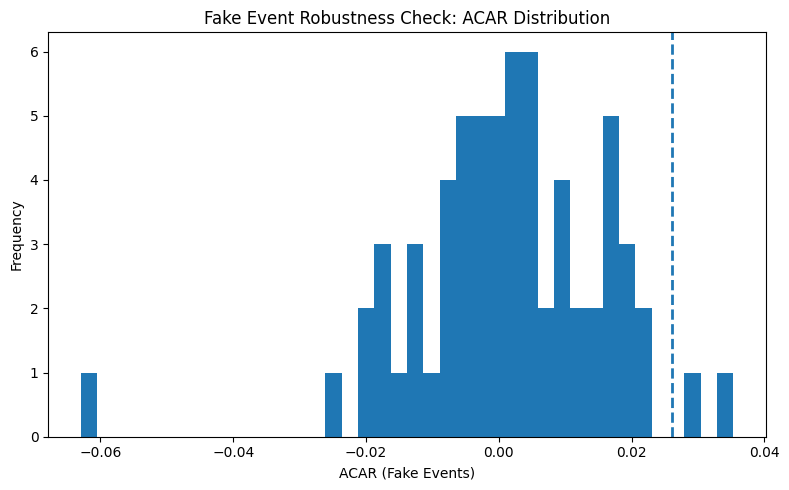

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fake_results["ACAR"], bins=40)
plt.axvline(0.026097, linestyle="--", linewidth=2)

plt.xlabel("ACAR (Fake Events)")
plt.ylabel("Frequency")
plt.title("Fake Event Robustness Check: ACAR Distribution")

plt.tight_layout()
plt.show()
